# Projet Analyse de Données

---

Ce projet a pour but de s'initier à l'analyse de données et de mettre en application les méthodes vues en cours et en TP. Il a été réalisé par Callen Balthazar, Chalet Ines, Duchesne Pierre et Misselis Emiri, élèves ingénieur.e.s en quatrième année du département de Génie Mathématique et Modélisation de l'INSA Toulouse.

Deux notebooks seront complétés afin de présenter les résultats de ce projet : l'un en *Python* et l'autre en *R*. Chacun des deux notebooks présentera l'analyse et le traitement des données ainsi que leur interprétation. Cependant, le notebook en **R** sera plus complet et pris comme référence. Le notebook **Python** présentera les résultats majeurs mais tout ne sera pas entièrement développé dans les deux langages.

## Introduction

---

Les données étudiées sont relatives aux stations Velib de Paris. Elles ont été collectées toutes les heures entre le Lundi 2 septembre et le Dimanche 7 septembre 2014. On observe **1189** stations (ce sont les individus de notre étude) et on s'intéresse plus particulièrement à leurs taux de chargement (défini comme le ratio entre le nombre de vélo disponible à un instant $t$ sur le nombre de vélo que peut accueilir la station). Un chargement de 1 signifie que la station est pleine (tous les vélos sont disponibles), alors qu'un chargement de 0 signifie que la station est vide. Les taux de chargement, pris toutes les heures lors de la durée de l'étude, constituent les variables étudiées (au nombre de **168**).

## I - Travail préliminaire

---

Cette première partie a pour but la mise en place des outils de travail nécessaires à l'étude du jeu de données. Les différentes librairies nécessaires lors de ce projet seront téléchargées, les données seront chargées et analysées afin de vérifier leur qualité (notamment la présence de valeurs manquantes et/ou de valeurs dupliquées).

### Chargement des librairies nécessaires

In [2]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggmap)
library(FactoMineR)
library(factoextra)
library(cluster)
library(mclust)

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Package 'mclust' version 6.1
Type 'citation("mclust")' for citing this R package in publications.



### Chargement des données

In [3]:
load('velib.RData')
summary(velib)
str(velib$names)
str(velib$position) # latitude et longitude de chaque station d'où 1189x2

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

 chr [1:1189] " EURYALE DEHAYNIN" " LEMERCIER" " MEZIERES RENNES" " FARMAN" ...
'data.frame':	1189 obs. of  2 variables:
 $ longitude: num  2.38 2.32 2.33 2.27 2.37 ...
 $ latitude : num  48.9 48.9 48.9 48.8 48.8 ...


### Préparation des données

Nous commençons par indicer nos stations par leurs noms afin de facilier la compréhension.

In [4]:
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

In [5]:
stations = 1:nrow(loading) 
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]

Nous enlevons les 13 premières colonnes car nous voulons commencer notre étude le lundi 2 à exactement minuit. Les 13 premières colonnes concernent des données du dimanche 1er, elles ne rentrent donc pas dans le cadre de notre étude.

In [6]:
dates = 14:181 
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

In [7]:
head(loading)

1          2          3          4          5         
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.07692308 0.03846154 0.03846154
 LEMERCIER           0.47826087 0.47826087 0.47826087 0.43478261 0.43478261
 MEZIERES RENNES     0.21818182 0.14545455 0.12727273 0.10909091 0.10909091
 FARMAN              0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 QUAI DE LA RAPEE    0.92753623 0.81159420 0.73913043 0.72463768 0.72463768
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
                     6          7          8          9          10         ⋯
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.03846154 0.10714286 0.00000000 ⋯
 LEMERCIER           0.43478261 0.43478261 0.43478261 0.26086957 0.04347826 ⋯
 MEZIERES RENNES     0.10909091 0.09090909 0.09090909 0.05454545 0.10909091 ⋯
 FARMAN              0.95238095 0.95238095 1.00000000 1.00000000 1.00000000 ⋯
 QUAI DE LA RAPEE    0.72463768 0.72463768 0.72463768 0.75362319 0.97101449 ⋯
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.08333333 0.00000000 ⋯
                     159        160        161       162        163       
 EURYALE DEHAYNIN    0.29629630 0.11111111 0.1111111 0.14814815 0.30769231
 LEMERCIER           0.04347826 0.00000000 0.2173913 0.13043478 0.04545455
 MEZIERES RENNES     0.25925926 0.25925926 0.2037037 0.12962963 0.14814815
 FARMAN              1.00000000 1.00000000 0.9047619 0.85714286 0.85714286
 QUAI DE LA RAPEE    0.22727273 0.45454545 0.5909091 0.83333333 1.00000000
 CHOISY POINT D'IVRY 0.34782609 0.08695652 0.1153846 0.08695652 0.13043478
                     164        165        166        167       168      
 EURYALE DEHAYNIN    0.07692308 0.11538462 0.07692308 0.1538462 0.1538462
 LEMERCIER           0.17391304 0.17391304 0.17391304 0.2608696 0.3913043
 MEZIERES RENNES     0.29629630 0.31481481 0.37037037 0.3703704 0.4074074
 FARMAN              0.85714286 0.76190476 0.76190476 0.7619048 0.7619048
 QUAI DE LA RAPEE    0.81818182 0.63636364 0.71212121 0.6212121 0.5757576
 CHOISY POINT D'IVRY 0.08695652 0.08695652 0.43478261 0.3913043 0.5217391

In [8]:
paste("Nombre de stations :", nrow(loading))
paste("Observations par station :", ncol(loading))

[1] "Nombre de stations : 1189"

[1] "Observations par station : 168"

In [9]:
head(coord)

longitude latitude bonus
19117 2.377389  48.88630 0    
17111 2.317591  48.89002 0    
6103  2.330447  48.85030 0    
15042 2.271396  48.83373 0    
12003 2.366897  48.84589 0    
13038 2.363335  48.82191 0

Le jeu de données **coord** représente les coordonnées spatiales de chaque stations (longitude/latitude) ainsi que  leur altitude codée dans la variable *bonus* (1 si la station est sur une colline, 0 sinon).

### Vérification de la qualité du jeu de données

Nous vérifions ici la qualité du jeu de données, en regardant si celui-ci contient des valeurs manquantes ou dupliquées. Un jeu de données contenant un nombre important de valeurs manquantes ou dupliquées n'est pas exploitable sans travail préalable, cette étape est donc importante afin de poursuivre l'analyse.

In [10]:
Missing_L = sum(colSums(is.na(loading)))
Dup_L = sum(colSums(is.na(loading)))

paste("Informations sur le jeu de données Loading :")
paste("Nombre de valeurs manquantes : ", Missing_L)
paste("Nombre de valeurs dupliquées : ", Dup_L)

[1] "Informations sur le jeu de données Loading :"

[1] "Nombre de valeurs manquantes :  0"

[1] "Nombre de valeurs dupliquées :  0"

In [11]:
Missing_C = sum(colSums(is.na(coord)))
Dup_C = sum(colSums(is.na(coord)))

paste("Information sur le jeu de données Coord :")
paste("Nombre de valeurs manquantes : ", Missing_C)
paste("Nombre de valeurs dupliquées : ", Dup_C)

[1] "Information sur le jeu de données Coord :"

[1] "Nombre de valeurs manquantes :  0"

[1] "Nombre de valeurs dupliquées :  0"

---

**Interprétation :**

Le jeu de données est exploitable sans modification : il y a ni valeurs manquantes ni valeurs dupliquées.

## II - Analyse descriptive

---

Nous commençons notre étude par une analyse descriptive du jeu de données. Il s'agit de comprendre le jeu de données, se l'approprier et dégager de premières interprétations et questionnements que nous pourrons développer par la suite.

### Chargement de 9 stations différentes

La nombre de stations étant important, nous ne pouvons analyser chaque station individuellement. Nous choisissons 9 stations aléatoirement dans le jeu de données et nous affichons l'évolution de leur chargement au cours de la semaine. Cela nous permet de voir dans un premier temps comment évolue ce chargement dans la semaine (plutôt constant, très variable). Est-ce qu'une tendance ou périodicité se dégage ? Enfin est-ce que les stations ont des comportements semblables ou non ?

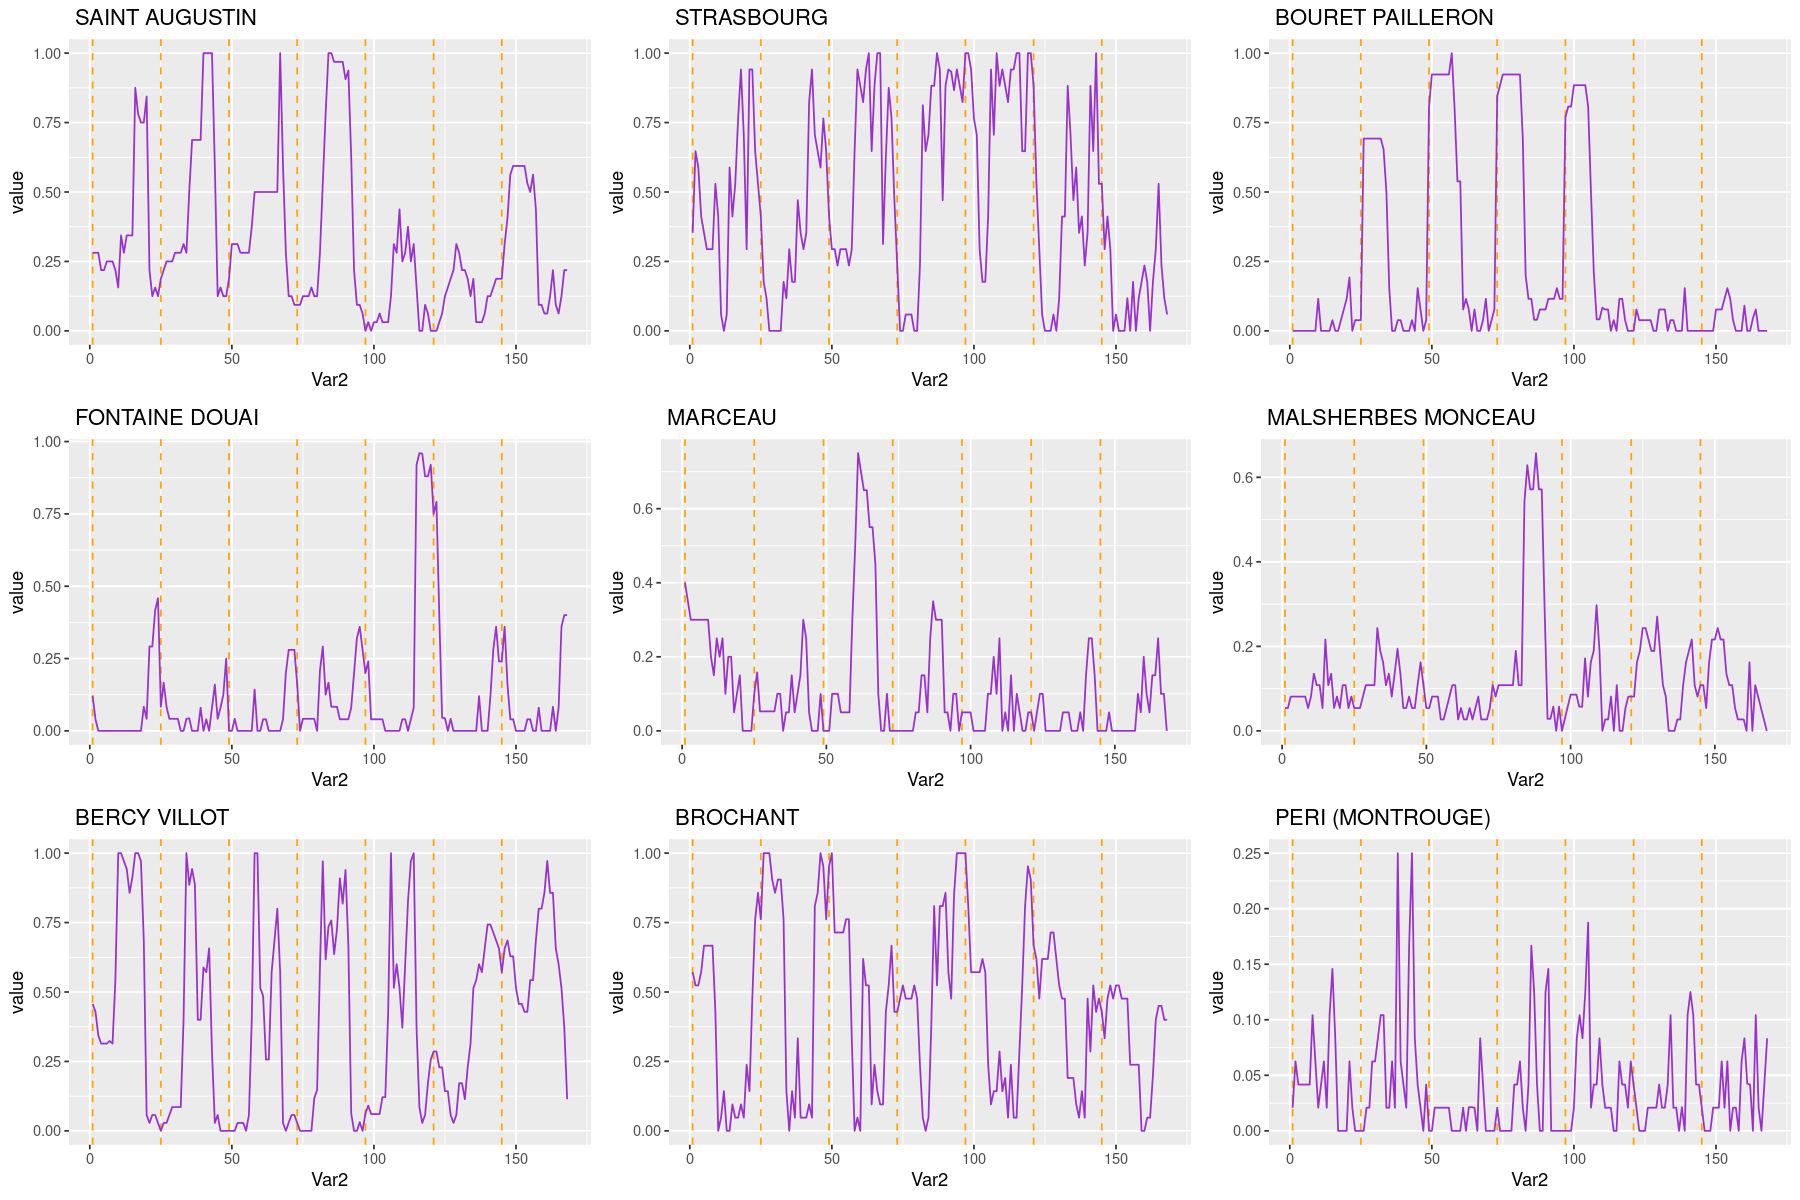

In [12]:
options(repr.plot.width = 15, repr.plot.height = 10)

stations_9 = sample.int(nrow(loading),9)

df=melt(loading[stations_9,])
time_tick = 1 + 24*(0:6)

im=list()
for (i in 1:9) {
    dfi=df[df$Var1==velib$names[stations_9[i]],]
    im[[i]]=ggplot(dfi,aes(x=Var2,y=value)) + geom_vline(xintercept=time_tick, col="orange", linetype="dashed") + geom_line(col="darkorchid")+labs(title=velib$names[stations_9[i]])
    }
do.call(grid.arrange,im)


**Interprétation :**

On observe que les stations ont des chargements par semaines très différents. Certaines sont la majorité du temps dans une position extrême (0 ou 1) avec des pics dans la valeur opposée tandis que d'autres fluctuent plus. Cependant, on remarque qu'elles ont toutes une tendance journalière. Les pointillés verticaux représentent chaque jour de la semaine et on voit nettement que le chargement a une périodicité journalière, quelque soit la station.

On peut donc s'intéresser au chargement moyen sur chaque jour de la semaine. C'est ce que nous verrons par la suite.

---

### Fréquentation Maximale

Nous analysons ici le chargement afin de voir si certaines stations sont dans des situations de sur/sous remplissage récurents. Cela permet d'obtenir des informations sur l'utilisation de celles-ci et permet par exemple de repenser la répartition du nombre de vélib (ajout de vélos dans certaines stations par exemple).

#### En Moyenne

Tout d'abord, nous regardons en moyenne quel est le chargement par station sur une semaine.

In [13]:
Moyenne = as.data.frame(rowMeans(loading))
Moyenne$Names = velib$names
Moyenne = Moyenne[order(Moyenne[,1]),]

head(Moyenne)
tail(Moyenne)

rowMeans(loading) Names                    
997  0.01613284         HORNET (BAGNOLET)       
905  0.01761905         GARDE CHASSE (LES LILAS)
85   0.02335165         DE GAULLE (MONTREUIL)   
1088 0.03057359         LEPIC                   
942  0.03279645         PLACE PIGALLE           
1133 0.03350945         ALEXANDER FLEMMING

rowMeans(loading) Names                         
403  0.8864005          ROBESPIERRE (IVRY)           
100  0.8875383          LOURMEL                      
241  0.8898293          LA MOTTE PIQUET              
441  0.9002538          CARDINAL LAVIGERIE           
978  0.9105362          DOM PÉRIGNON GRAVELLE        
1107 0.9193723          INSURRECTION AOUT 1944 (IVRY)

**Interprétation :**

Contrairement à ce qu'on pourrait s'attendre, les stations ont des taux de chargement très différents. Certaines ont un taux très bas (0.01613284 pour HORNET (BAGNOLET)) tandis que d'autres ont un taux très haut (0.9193723 pour INSURRECTION AOUT 1944 (IVRY)). En moyenne, certaines stations sont donc plutôt vides toute la semaine tandis que d'autres ont tendance à être pleine. Il semble donc il y avoir de fortes disparités dans la disponibilité des vélos et l'accessibilité aux stations, avec des stations où il est impossible d'emprunter un vélo et d'autres où il est impossible d'en déposer.

---

#### Variance 

In [14]:
Var = as.data.frame(apply(loading,1,var))
Var$Names = velib$names
Var = Var[order(Var[,1]),]

Var

apply(loading, 1, var) Names                            
997  0.0003984694            HORNET (BAGNOLET)               
1133 0.0006604331            ALEXANDER FLEMMING              
905  0.0010098660            GARDE CHASSE (LES LILAS)        
761  0.0010299471            ALLENDE (PANTIN)                
85   0.0010990276            DE GAULLE (MONTREUIL)           
107  0.0012752910            FAURE (AUBERVILLIERS)           
723  0.0017254309            PETITS PONTS                    
1046 0.0018531456            PANTIN                          
264  0.0020450935            BOULEVARD LANNES                
688  0.0021134472            PERI (MONTROUGE)                
169  0.0021409013            PARIS 2 (MONTREUIL)             
1068 0.0023358682            FRANCOEUR CAULAINCOURT          
628  0.0025565954            EGLISE SAINT JUSTE (SAINT DENIS)
1028 0.0025814628            GIDE (LE KREMLIN BICETRE)       
469  0.0025878552            ESPACE CHAMPERRET               
91   0.0026724452            BERTON (BAGNOLET)               
551  0.0028541798            PLACE GENERAL KOENIG            
269  0.0034579643            METALLURGIE (SAINT DENIS)       
191  0.0035260522            HOPITAL ROBERT DEBRE            
926  0.0036397488            BOULEVARD FLANDRIN              
390  0.0037605406            PLACE DE LEVIS                  
942  0.0042482791            PLACE PIGALLE                   
224  0.0042946178            PARC DE BELLEVILLE              
1088 0.0044167126            LEPIC                           
1147 0.0044210797            NOISY LE SEC                    
66   0.0045934007            ARGENTINE                       
441  0.0048543450            CARDINAL LAVIGERIE              
522  0.0048778325            KARMAN (AUBERVILLIERS)          
138  0.0049876634            HORTENSIAS (LES LILAS)          
1090 0.0053120036            MALAKOFF PINARD                 
⋮    ⋮                      ⋮                                
139  0.1556247               QUATRE SEPTEMBRE                
220  0.1556584               CHATEAU DE VINCENNES            
869  0.1559406               QUAI MAURIAC  / PONT DE BERCY   
358  0.1560001               PLACE ANDRE MALRAUX             
13   0.1561101               RIVOLI MUSEE DU LOUVRE          
197  0.1566876               PRIMO LEVI                      
401  0.1568632               LEDIT DE NANTES                 
716  0.1576077               JACQUIER                        
309  0.1577322               MONCLAR                         
516  0.1578355               BOETIE PONTHIEU                 
969  0.1582892               GARE DE LYON VAN GOGH           
407  0.1583985               BEL AIR                         
387  0.1587578               CHARLES VALLIN                  
1181 0.1590536               ST OUEN LAMARCK                 
634  0.1595241               JARRY (VINCENNES)               
65   0.1596581               FRANCAISE                       
947  0.1604286               LAFAYETTE (ISSY LES MOULINEAUX) 
238  0.1611012               BIBLIOTHÈQUE FRANÇOIS MITTERAND 
571  0.1613095               SERRES                          
423  0.1614637               OPERA - CAPUCINES               
354  0.1615768               CHARONNE DU BUREAU              
62   0.1623936               OPERA CASANOVA                  
399  0.1637217               CHARONNE PHILIPPE AUGUSTE       
803  0.1640440               AURIOL QUAI DE LA GARE          
475  0.1657865               OPERA PYRAMIDES                 
19   0.1660600               BEAUBOURG PLACE MICHELET        
217  0.1693002               QUAI FRANCOIS MAURIAC TOLBIAC   
283  0.1715673               ANDRE MALRAUX MUSEE DU LOUVRE   
1095 0.1773793               LAUMIERE                        
1128 0.1898778               VAUGIRARD

#### Sous-remplissage

Nous analysons ici le nombre de fois où les stations se retrouvent vides (avec un chargement de 0). Si certaines stations sont un nombre de fois important totalement vide, cela pourrait signifier que le nombre de vélo dont elle dispose n'est pas adapté à la demande.

In [15]:
Vide = data.frame()
for (i in 1:1189) {
    Vide[i, "freq"] <- sum(loading[i,] == 0)
}
Vide$Names = velib$names
Vide = Vide[order(Vide$freq,decreasing = TRUE),]
head(Vide)

summary(Vide$freq)

freq Names                    
440  122   SAINT FARGEAU MORTIER   
905  120   GARDE CHASSE (LES LILAS)
394  118   LEPIC VERON             
204  117   PIXERECOURT             
1091 116   JOURDAIN                
765  115   PLACE DES FETES

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     2.0    12.0    19.9    29.0   122.0 


**Interprétation :**

Avec ces deux data frame nous voyons les stations qui ont le moins de vélos ainsi celles qui sont le plus souvent vide. Cela signifie que les utilisatuers prennent souvent des vélos dans cette station mais n'en déposent pas ( c'est un point de départ ).

On note que GARDE CHASSE (LES LILAS) apparait dans les 2 tableaux, il pourrait donc être pertinent d'augmenter la capacité de cette station. 

---

#### Sur-remplissage

Nous effectuons ici le travail analogue pour les cas de sur-remplissage (chargement = 1).

In [37]:
Plein = data.frame()

for (i in 1:1189) {
    Plein[i, "freq"] <- sum(loading[i,] == 1)
}

Plein$Names = velib$names
Plein = Plein[order(Plein$freq,decreasing = TRUE),]
head(Plein)
summary(Plein$freq)

freq Names                    
521  90    DESAIX                  
868  72    CASANOVA (IVRY)         
458  64    CHAMP DE MARS COTE 16EME
804  61    PARIS 2 (CHARENTON)     
1026 61    MONTGALLET CHARENTON    
363  58    ST MANDE NETTER

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    5.00   10.65   17.00   90.00 

**Interprétation :**

A l'inverse ici, ces stations sont celles qui sont le plus souvent remplies. Cela signifie que les utilisatuers posent souvent des vélos dans cette station mais n'en prennent pas ( c'est un point d'arrivée ).

Par exemple la station DESAIX est plus de la moitié du temps pleine. Il serait donc interessant d'augmenter sa capacité. 

---

#### Qualitatif 

In [38]:
seuil_vide = as.numeric(Vide[,"freq"]>29)
seuil_plein = as.numeric(Vide[,"freq"]<17)

In [41]:
df_infos = data.frame(Names = velib$names, Vide = seuil_vide, Plein = seuil_plein, Moyenne = Var[,1], Var = Moyenne[,1] )

df_infos

Names                            Vide Plein Moyenne      Var       
1     EURYALE DEHAYNIN                1    0     0.0003984694 0.01613284
2     LEMERCIER                       1    0     0.0006604331 0.01761905
3     MEZIERES RENNES                 1    0     0.0010098660 0.02335165
4     FARMAN                          1    0     0.0010299471 0.03057359
5     QUAI DE LA RAPEE                1    0     0.0010990276 0.03279645
6     CHOISY POINT D'IVRY             1    0     0.0012752910 0.03350945
7     PORTE DE VILLIERS               1    0     0.0017254309 0.03543084
8     STALINGRAD (FONTENAY SOUS BOIS) 1    0     0.0018531456 0.03741497
9     GARE RER (JOINVILLE)            1    0     0.0020450935 0.03760441
10    MOUFFETARD EPEE DE BOIS         1    0     0.0021134472 0.03760613
11    PELLEPORT                       1    0     0.0021409013 0.03857966
12    TREMBLAY - INSEP                1    0     0.0023358682 0.03893398
13    RIVOLI MUSEE DU LOUVRE          1    0     0.0025565954 0.03928571
14    EVANGILE                        1    0     0.0025814628 0.03975340
15    HÔPITAL BICHAT                  1    0     0.0025878552 0.04617759
16    PLACE DES TERNES - 5            1    0     0.0026724452 0.04704399
17    BEAUBOURG                       1    0     0.0028541798 0.04746241
18    PYRÉNÉES-DAGORNO                1    0     0.0034579643 0.04870130
19    BEAUBOURG PLACE MICHELET        1    0     0.0035260522 0.05067050
20    MALON (GENTILLY)                1    0     0.0036397488 0.05083100
21    CHEMIN VERT BEAUMARCHAIS        1    0     0.0037605406 0.05209360
22    MARCHE AUX FLEURS               1    0     0.0042482791 0.05403509
23    SAINT PHILIPPE DU ROULE         1    0     0.0042946178 0.05404276
24    AVENUE DE LA PORTE D'ASNIÈRES   1    0     0.0044167126 0.05431061
25    WAGRAM COURCELLES               1    0     0.0044210797 0.05532213
26    REPOS                           1    0     0.0045934007 0.05642685
27    VAVIN                           1    0     0.0048543450 0.05716428
28    GAITE LYRIQUE                   1    0     0.0048778325 0.05891777
29    CLICHY                          1    0     0.0049876634 0.05897167
30    PLACE ST AUGUSTIN               1    0     0.0053120036 0.06012112
⋮    ⋮                                ⋮    ⋮     ⋮            ⋮         
1160  SARETTE GENERAL LECLERC         0    1     0.1556247    0.8278792 
1161  REPUBLIQUE 2 (MONTREUIL)        0    1     0.1556584    0.8298512 
1162  DECAEN                          0    1     0.1559406    0.8307823 
1163  RASPAIL SCHOELCHER              0    1     0.1560001    0.8349332 
1164  IVRY POINTE D'IVRY              0    1     0.1561101    0.8379744 
1165  PORTE DE LA VILLETTE            0    1     0.1566876    0.8389917 
1166  DHALENNE (SAINT OUEN)           0    1     0.1568632    0.8423116 
1167  BEAUBOURG RAMBUTEAU             0    1     0.1576077    0.8434327 
1168  RAYMOND LOSSERAND               0    1     0.1577322    0.8435256 
1169  PYRENEES                        0    1     0.1578355    0.8450000 
1170  GARE ROUTIERE ( SAINT CLOUD)    0    1     0.1582892    0.8456095 
1171  SEINE FLANDRE                   0    1     0.1583985    0.8500766 
1172  LEDRU ROLLIN (SURESNES)         0    1     0.1587578    0.8504157 
1173  RIVOLI MAIRIE DU 1ER            0    1     0.1590536    0.8506612 
1174  BOUSSINGAULT - TOLBIAC          0    1     0.1595241    0.8518630 
1175  CHARONNE                        0    1     0.1596581    0.8522183 
1176  MADELEINE                       0    1     0.1604286    0.8531162 
1177  OKABE (LE KREMLIN-BICETRE)      0    1     0.1611012    0.8567489 
1178  PORTE DE VINCENNES BIS          0    1     0.1613095    0.8597604 
1179  GAMBETTA MARTIN NADAUD          0    1     0.1614637    0.8620472 
1180  SAINT MARCEL                    0    1     0.1615768    0.8684163 
1181  ST OUEN LAMARCK                 0    1     0.1623936    0.8714598 
1182  SAINT HONORE                    0    1     0.1637217    0

### Evolution du chargement moyen pour chaque jour de la semaine

Nous avons vu précédemment qu'une tendance journalière semblait se dessiner dans le chargement des stations. Nous affichons ici la moyenne du chargement par heure sur tous les jours de la semaine afin de voir si une réelle tendance journalière se dégage.

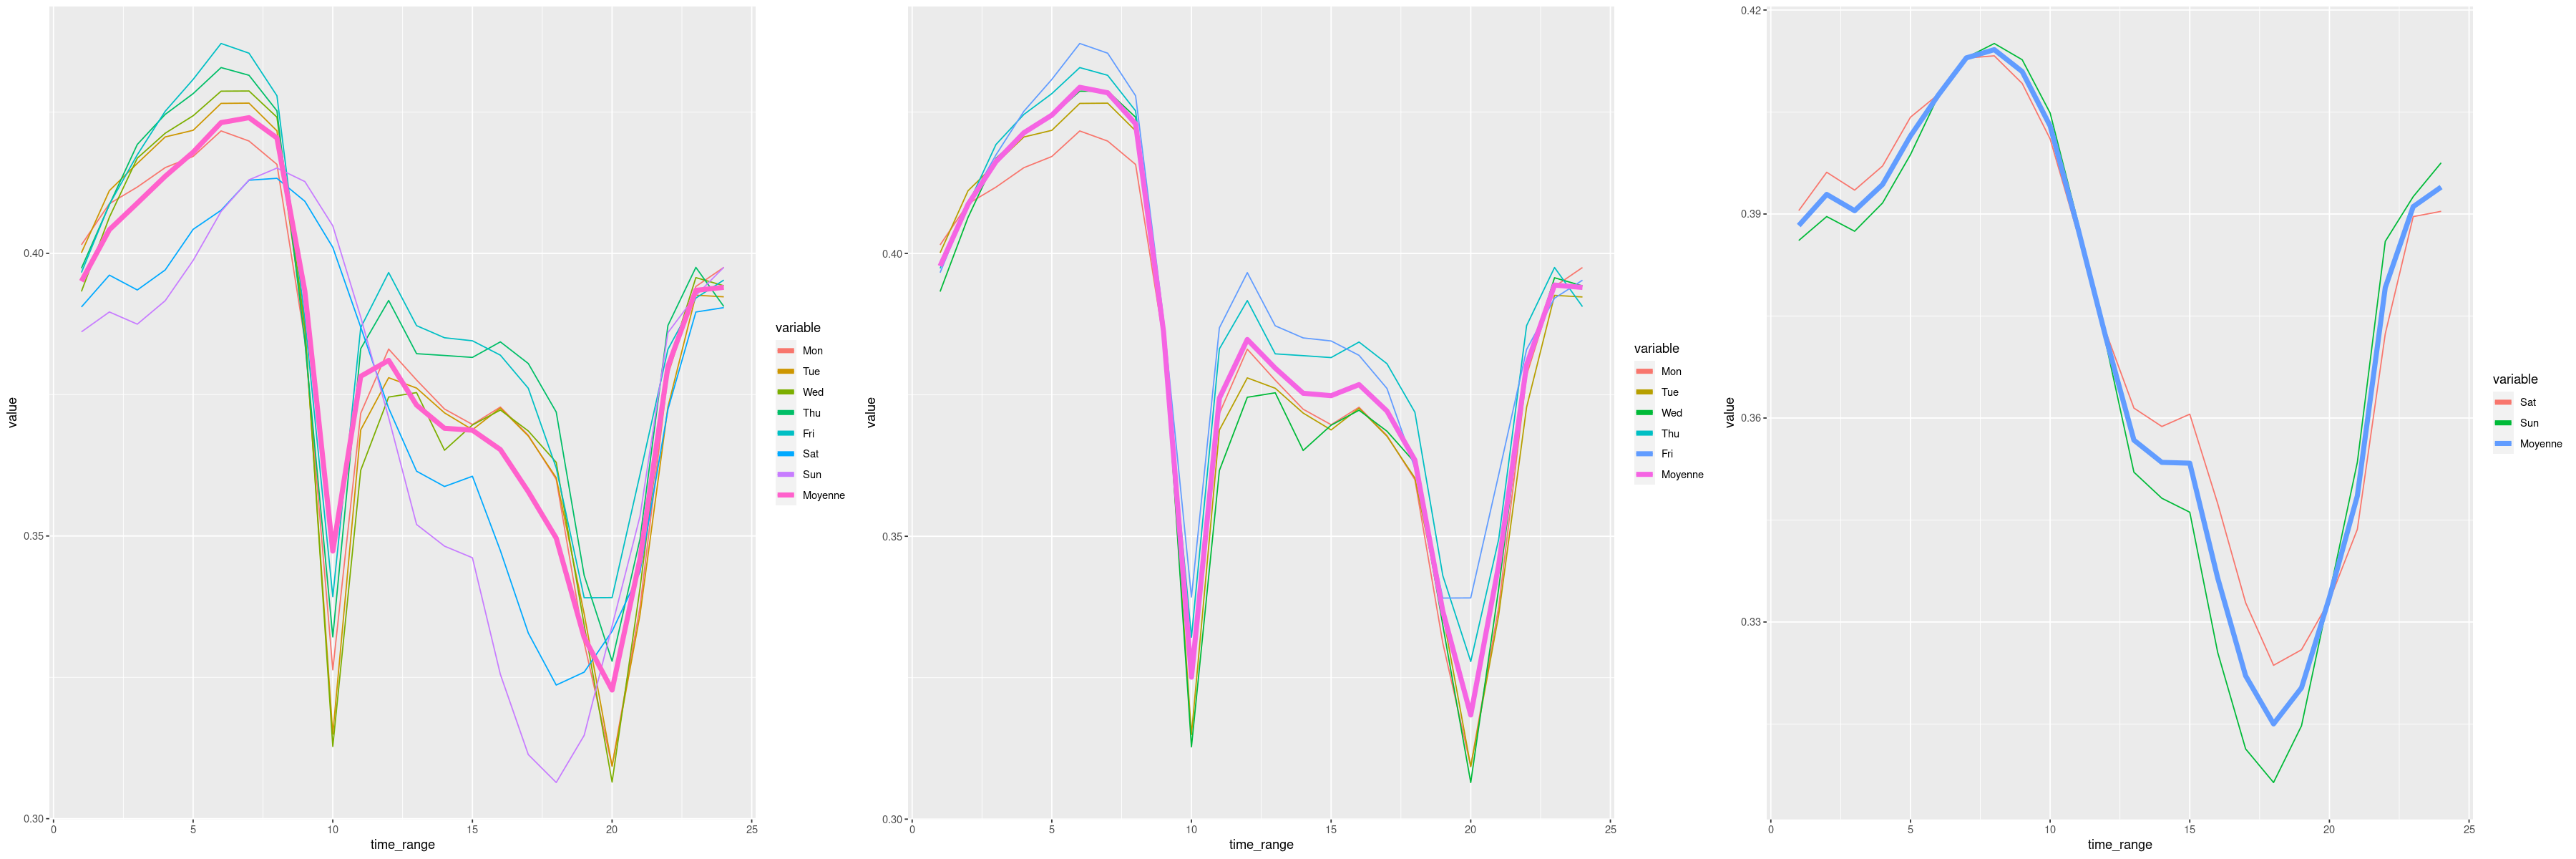

In [15]:
options(repr.plot.width = 30, repr.plot.height = 10)

# ----------------------------------------------------------------------------------------------
# Moyenne des heures par jour de la semaine
loading_meanhour_perday=colMeans(loading)
loading_meanhour_perday=matrix(loading_meanhour_perday,nrow=24) # 1 colonne = 1 jour
loading_meanhour=rowMeans(loading_meanhour_perday)

loading_meanhour_perday=as.data.frame(loading_meanhour_perday)
colnames(loading_meanhour_perday) = c("Mon","Tue","Wed","Thu","Fri","Sat","Sun")
loading_meanhour_perday$time_range = c(1:24)
data=melt(loading_meanhour_perday,id='time_range')

loading_meanhour = as.data.frame(loading_meanhour)
colnames(loading_meanhour) = c("Moyenne")
loading_meanhour$time_range=c(1:24)
data2=melt(loading_meanhour,id='time_range')

p_g = ggplot()+geom_line(data=data,aes(x=time_range,y=value,color=variable))+geom_line(data=data2,aes(x=time_range,y=value,color=variable),linewidth=2.0)

# ----------------------------------------------------------------------------------------------
# Moyenne des heures par jour de la semaine ( du lundi au vendredi )
loading_meanhour_perday_sem=colMeans(loading[,1:120])
loading_meanhour_perday_sem=matrix(loading_meanhour_perday_sem,nrow=24)
loading_meanhour_sem=rowMeans(loading_meanhour_perday_sem) # Pour afficher la moyenne sur les cinq jours en gras

loading_meanhour_perday_sem=as.data.frame(loading_meanhour_perday_sem)
colnames(loading_meanhour_perday_sem) = c("Mon","Tue","Wed","Thu","Fri")
loading_meanhour_perday_sem$time_range = c(1:24)
data=melt(loading_meanhour_perday_sem,id='time_range')

loading_meanhour_sem = as.data.frame(loading_meanhour_sem)
colnames(loading_meanhour_sem) = c("Moyenne")
loading_meanhour_sem$time_range=c(1:24)
data3=melt(loading_meanhour_sem,id='time_range')

p_sem = ggplot()+geom_line(data=data,aes(x=time_range,y=value,color=variable))+geom_line(data=data3,aes(x=time_range,y=value,color=variable),linewidth=2.0)

# ----------------------------------------------------------------------------------------------
# Moyenne des heures par jour du weekend
loading_meanhour_perday_we=colMeans(loading[,121:168])
loading_meanhour_perday_we=matrix(loading_meanhour_perday_we,nrow=24)

loading_meanhour_we=rowMeans(loading_meanhour_perday_we)

loading_meanhour_perday_we=as.data.frame(loading_meanhour_perday_we)

colnames(loading_meanhour_perday_we) = c("Sat","Sun")
loading_meanhour_perday_we$time_range = c(1:24)
data=melt(loading_meanhour_perday_we,id='time_range')

loading_meanhour_we = as.data.frame(loading_meanhour_we)
colnames(loading_meanhour_we) = c("Moyenne")
loading_meanhour_we$time_range=c(1:24)
data4=melt(loading_meanhour_we,id='time_range')

p_we= ggplot()+geom_line(data=data,aes(x=time_range,y=value,color=variable))+geom_line(data=data4,aes(x=time_range,y=value,color=variable),linewidth=2.0)

# ----------------------------------------------------------------------------------------------
grid.arrange(p_g,p_sem,p_we,ncol=3)

**Interprétation :**

Nous voyons bien ici qu'il se dégage deux moyennes distinctes, la discrimination semaine/week-end est donc pertinente, et semble logique : les comportements d'utilisation du vélo ne sont pas les mêmes. 
- Lors de la semaine, les vélos sont principalement utilisés pour se rendre sur le lieu de travail, on observe deux pics de forte utilisations aux heures d'embauche et de débauche. D'ou le comportement similaire pour les différents jours de la semaine.
lisse- Tandis que le week-end l'utilisation du vélo se fait plus dans le cadre de loisir, la courbe du chargement moyen est plus lisse lors de la journée et le phénomène d'embauche/débauche ne s'observe pas.

---


### Analyse géographique

Le jeu de données fournit également des données géographiques sur les stations : leurs coordonnées exactes (longitude/latitude) ainsi que l'altitude de la station (variable binaire : station en altitude ou non). Nous pouvons ainsi mener une étude géographique, en regardant notamment les stations dans l'espace colorées selon leur chargement moyen, mais aussi voir si l'altitude est un facteur pouvant expliquer (ou non) le chargement.

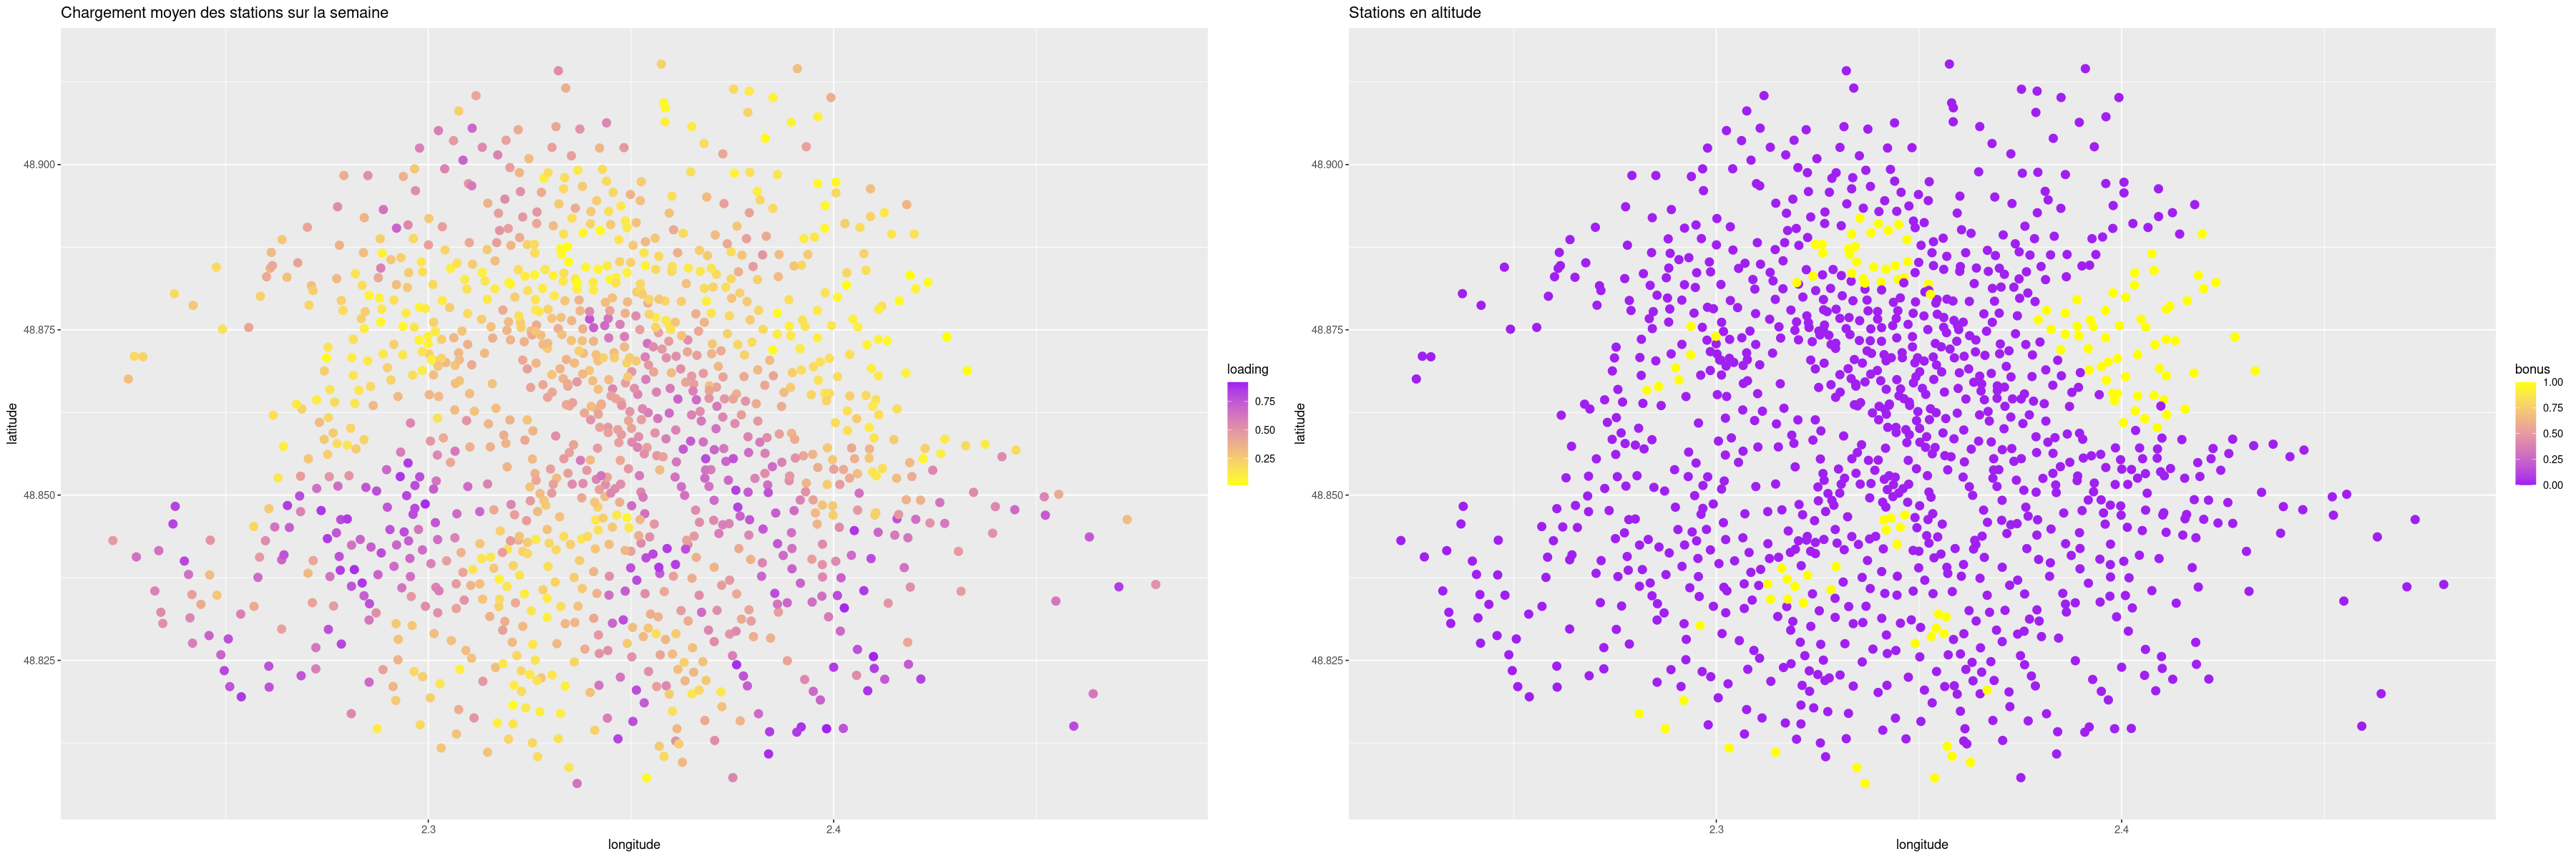

In [16]:
options(repr.plot.width = 30, repr.plot.height = 10)


loading_meanhour_coord=rowMeans(loading)
loading_meanhour_coord=as.matrix(loading_meanhour_coord)



coord$loading = loading_meanhour_coord
plot_meanhour = ggplot(coord, aes(x=longitude, y=latitude, color=loading)) + 
    geom_point(size=3) + 
    labs(title = "Chargement moyen des stations sur la semaine") + scale_color_gradient(low="yellow", high="purple")


plot_bonus = ggplot(coord, aes(x=longitude, y=latitude, color=bonus)) + 
    geom_point(size=3) +
    labs(title = "Stations en altitude") + scale_color_gradient(low="purple", high="yellow")

grid.arrange(plot_meanhour,plot_bonus,ncol=2)

**Interprétation :**

Il semblerait qu'il y ait des zones de fortes et de faibles utilisation des stations.

De plus, on remarque que les stations en altitude ont tendance à être moins chargées. Soit elles sont très fréquentées et donc le chargement est faible soit elles sont peu remplies : les gens y prennent les vélos mais personne ne les ramène.
Nous faisons l'hypothèse que ces stations ne sont pas 

Affichons la fréquentation moyenne des stations en altitude pour vérifier notre hypothèse. 

---


In [17]:
station_altitude <- vector("character", 0)

for (i in 1:nrow(coord)) {
    if (coord[i, "bonus"] == 1) {
        station_altitude <- c(station_altitude, velib$names[i])
    }
}

loading_altitude <- loading[station_altitude,]

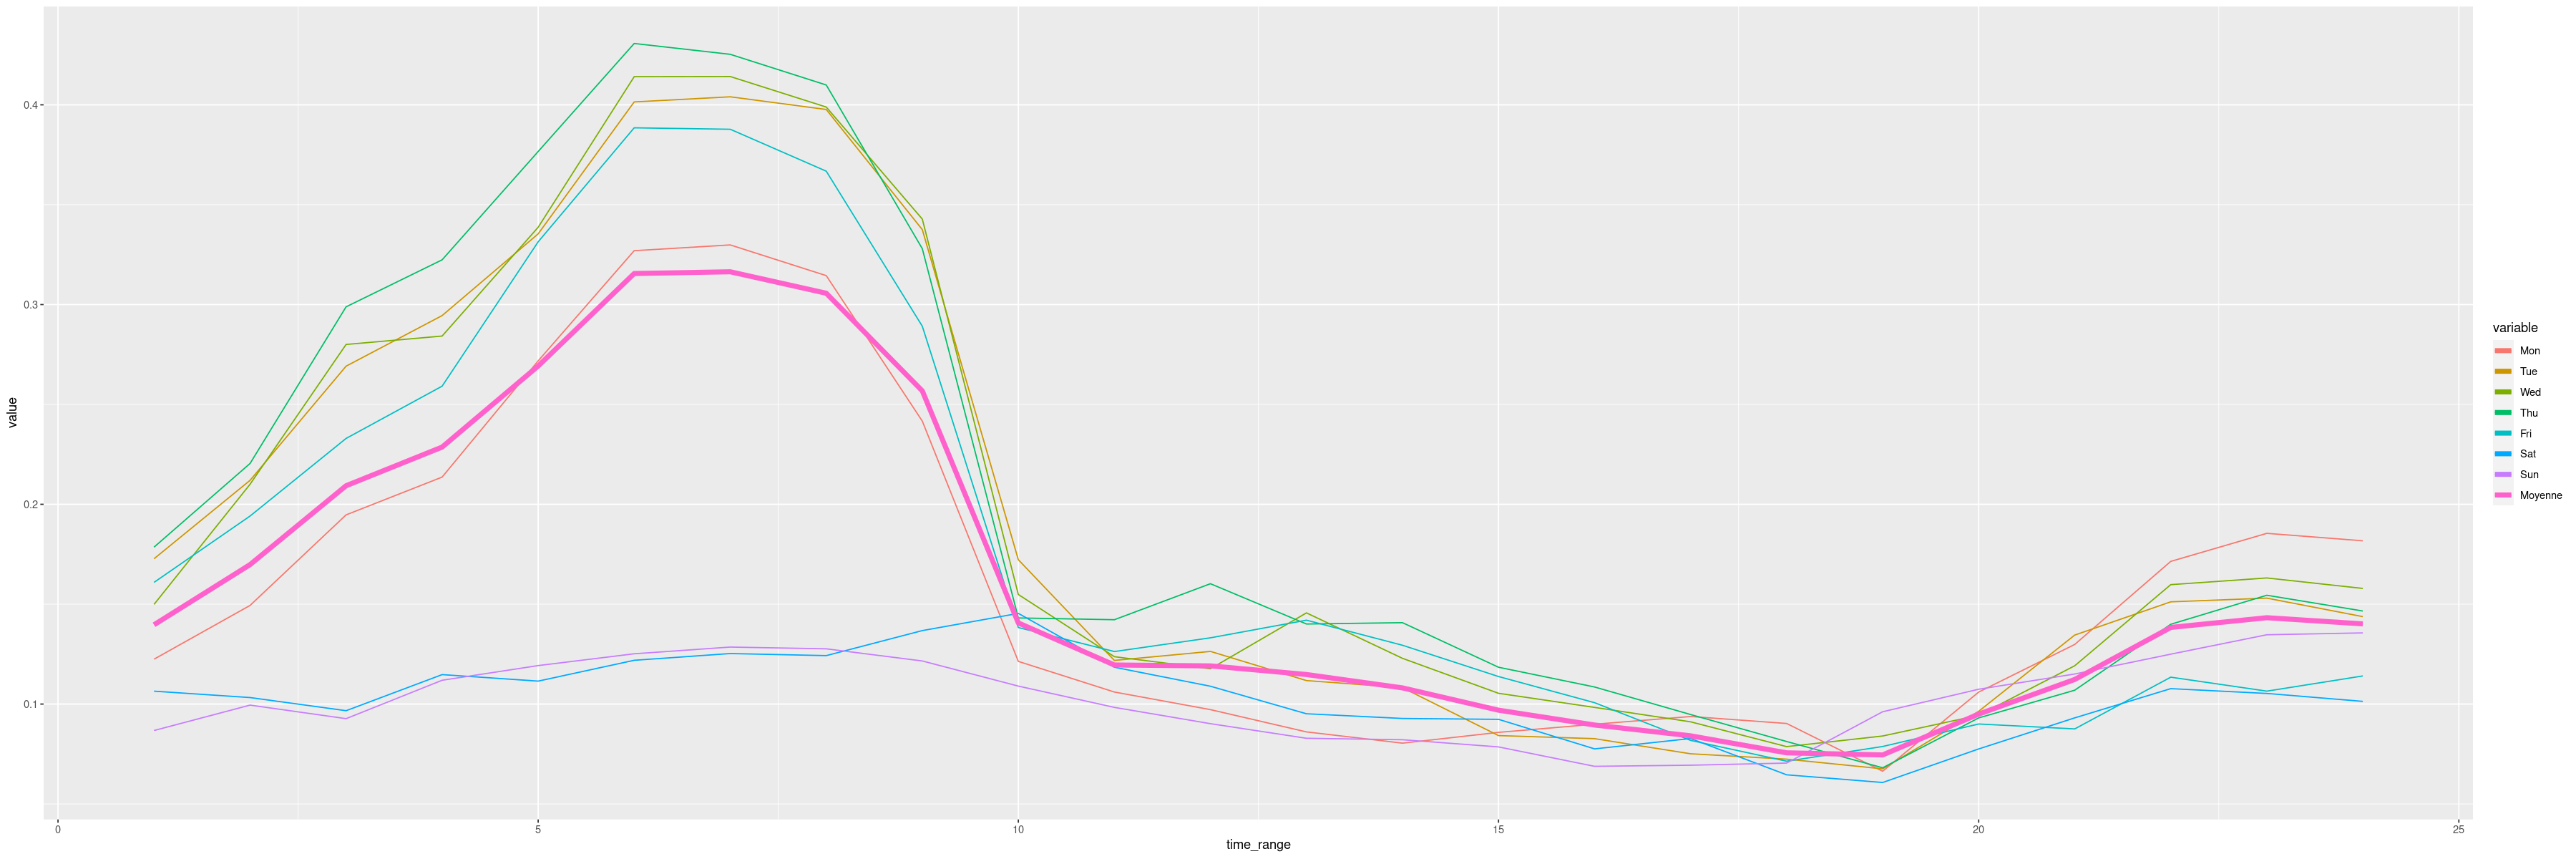

In [18]:
altitude_meanhour_perday=colMeans(loading_altitude)
altitude_meanhour_perday=matrix(altitude_meanhour_perday,nrow=24) # 1 colonne = 1 jour
altitude_meanhour=rowMeans(altitude_meanhour_perday)

altitude_meanhour_perday=as.data.frame(altitude_meanhour_perday)
colnames(altitude_meanhour_perday) = c("Mon","Tue","Wed","Thu","Fri","Sat","Sun")
altitude_meanhour_perday$time_range = c(1:24)
data=melt(altitude_meanhour_perday,id='time_range')

altitude_meanhour = as.data.frame(altitude_meanhour)
colnames(altitude_meanhour) = c("Moyenne")
altitude_meanhour$time_range=c(1:24)
data2=melt(altitude_meanhour,id='time_range')

ggplot()+geom_line(data=data,aes(x=time_range,y=value,color=variable))+geom_line(data=data2,aes(x=time_range,y=value,color=variable),linewidth=2.0)


**Interprétation :**
On observe que durant les jours semaine, les stations se remplissent légèrement (jamais plus de 45% de la capacité) en début de journée puis se vide et ne se re-remplissent que très peu sur la fin de la journée. Le weekend celles-ci restent vides toutes la journée. Il semblerait donc que durant la semaine certains travailleurs utilisent les vélo pour aller dans ces stations en altitude mais qu'une fois que les sations ont été vidées elles ne se remplissent plus durant la journée. Il serait donc nécessaire de parvenir à motiver la population parisienne à ramener les vélos dans ces stations. 

On vient donc de montrer qu'il y a deux types de remplissage : les stations dynamiques qui se remplissent et se vident souvent ou les station qui ont un chargement (haut ou bas) constant. Nous allons donc analyser la variance de chargement des stations pour évaluer se phénomène. 

### Analyse de la variance 

D'après les analyses précendente il y a un comportement similaire pour les jours en semaines et un comportement similaire pour ce du weekend. On supposera donc que nous pouvons faire une analyse du lundi et du dimanche et interpoler en disant que le comportement des jours de la semaine seront similaire à lundi et ceux du weekend similaires à dimanche.  

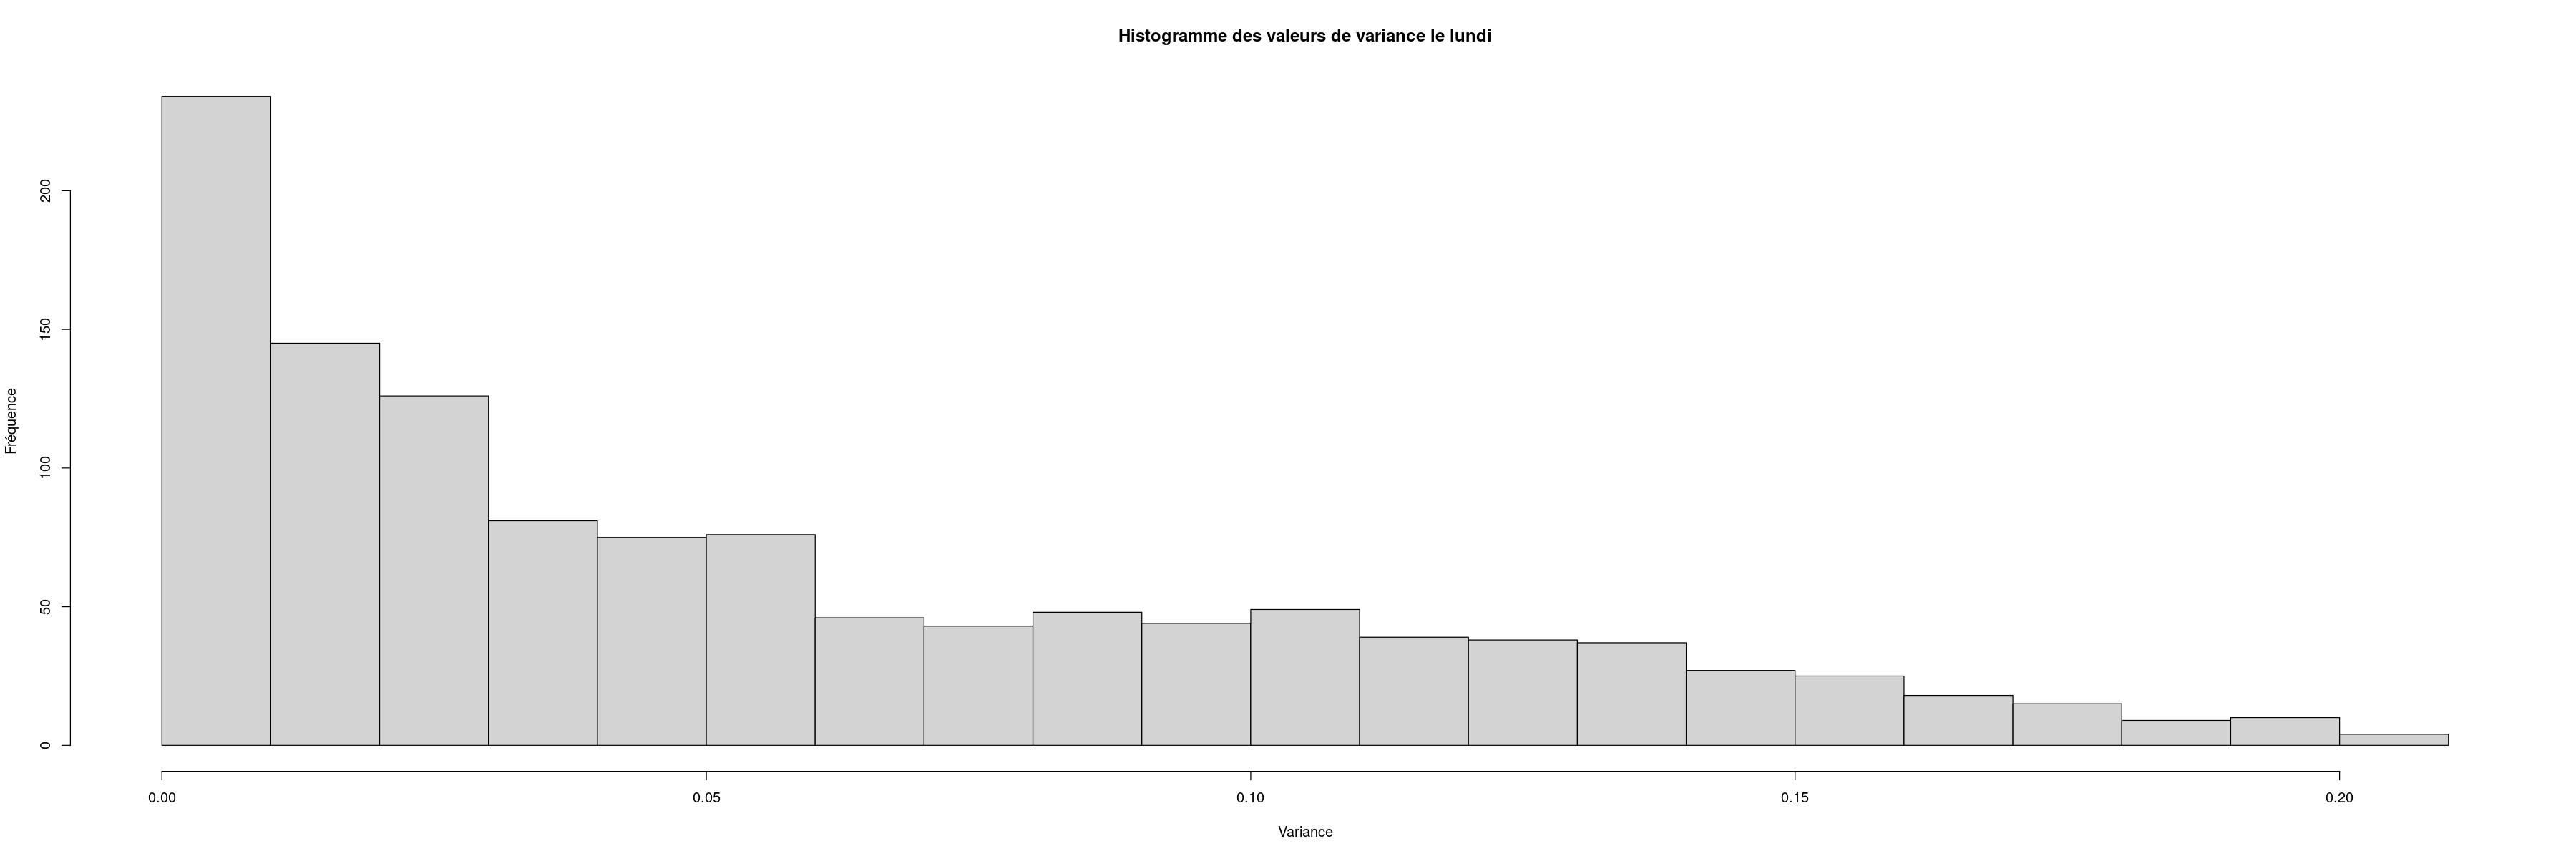

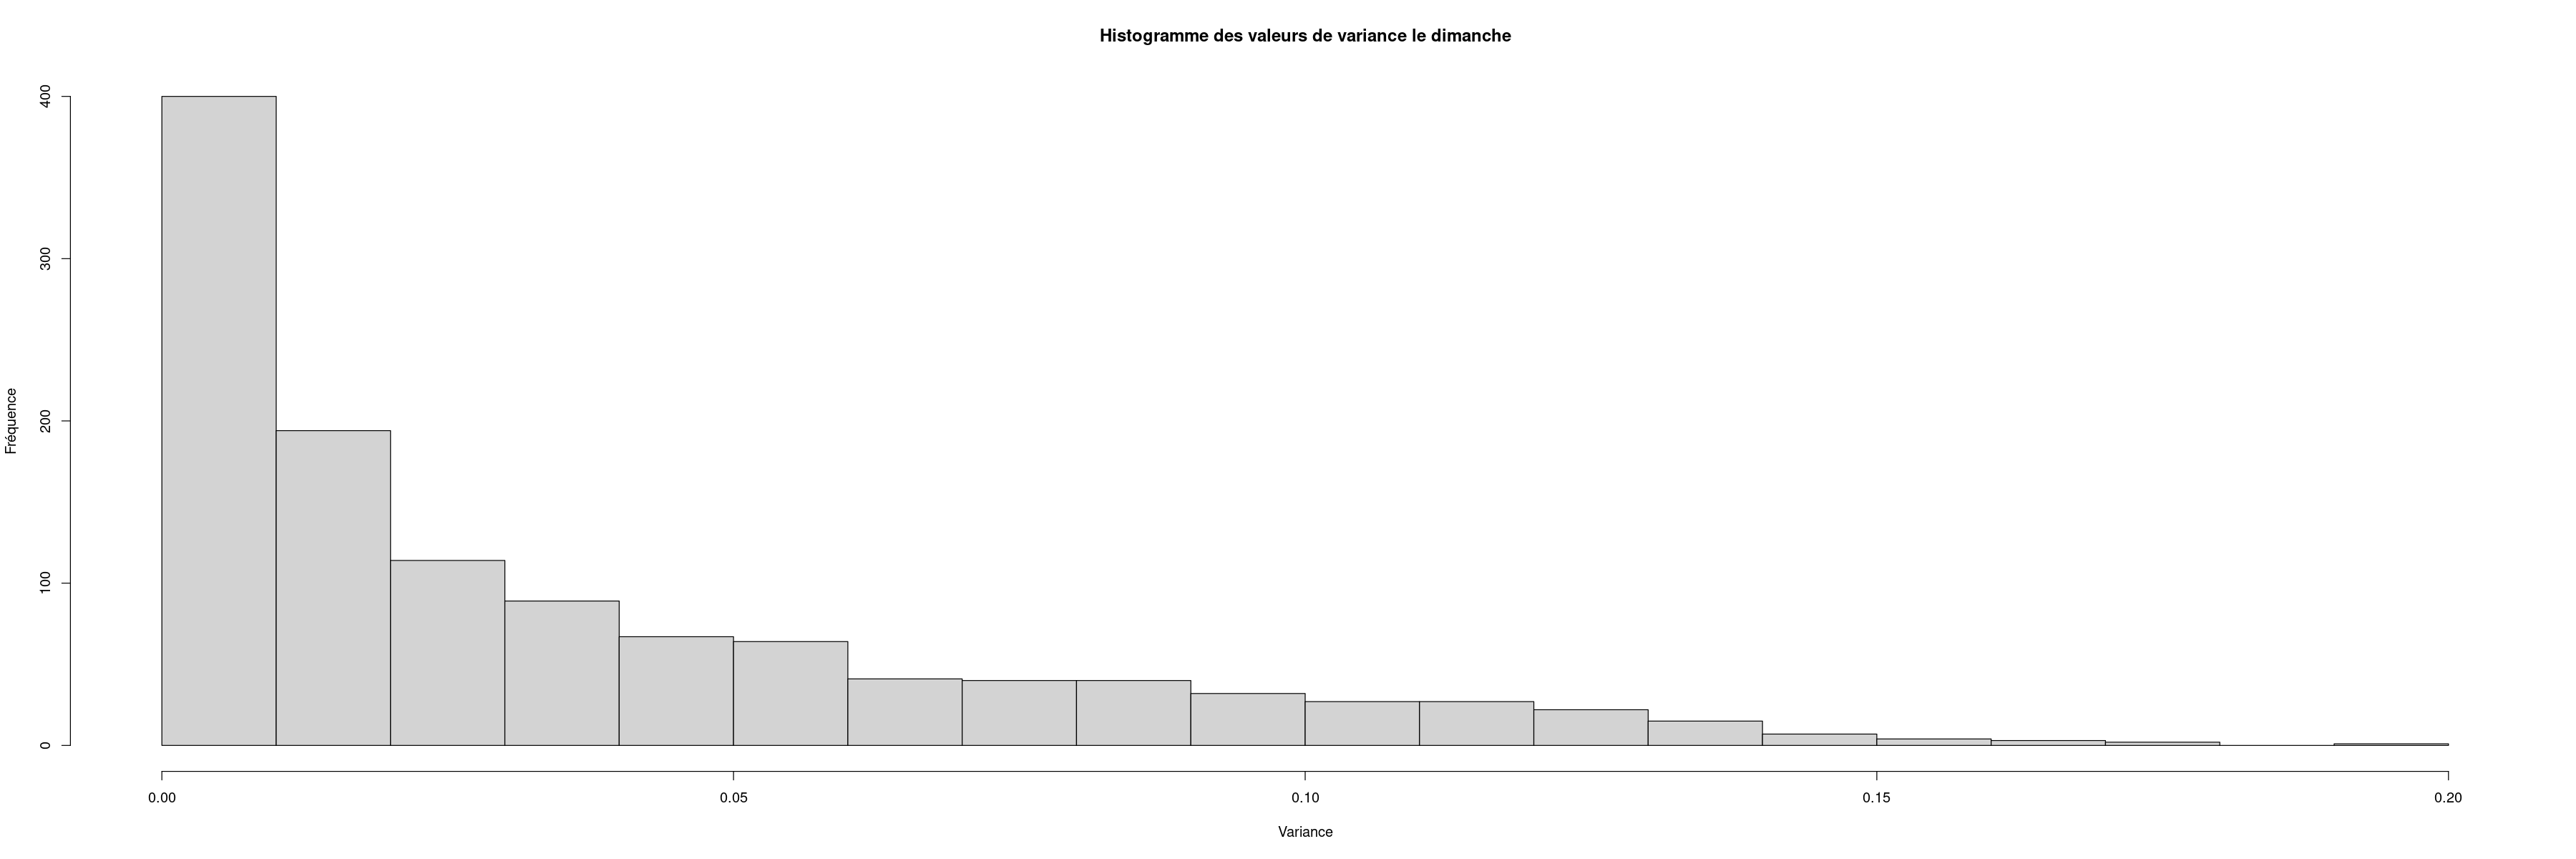

In [19]:
variance <- apply(loading, 1, var)
variance_lund <- apply(loading[,c(1:24)], 1, var)
variance_dim <- apply(loading[,c(144:168)], 1, var)

hist(variance_lund,
     main = "Histogramme des valeurs de variance le lundi", 
     xlab = "Variance",  
     ylab = "Fréquence",  
     breaks = 20
)

hist(variance_dim,
     main = "Histogramme des valeurs de variance le dimanche", 
     xlab = "Variance",  
     ylab = "Fréquence",  
     breaks = 20
)

**Interprétation :**

On observe que les stations on des variances différentes allant de plus de 0.8 à moins de 0.05. 

Nous allons afficher la variance des sations sur la carte de Paris en début de semaine lundi et le dimanche en fin de semaine afin de visualiser si il y des zones qui se dégagent à ces différents moments. 

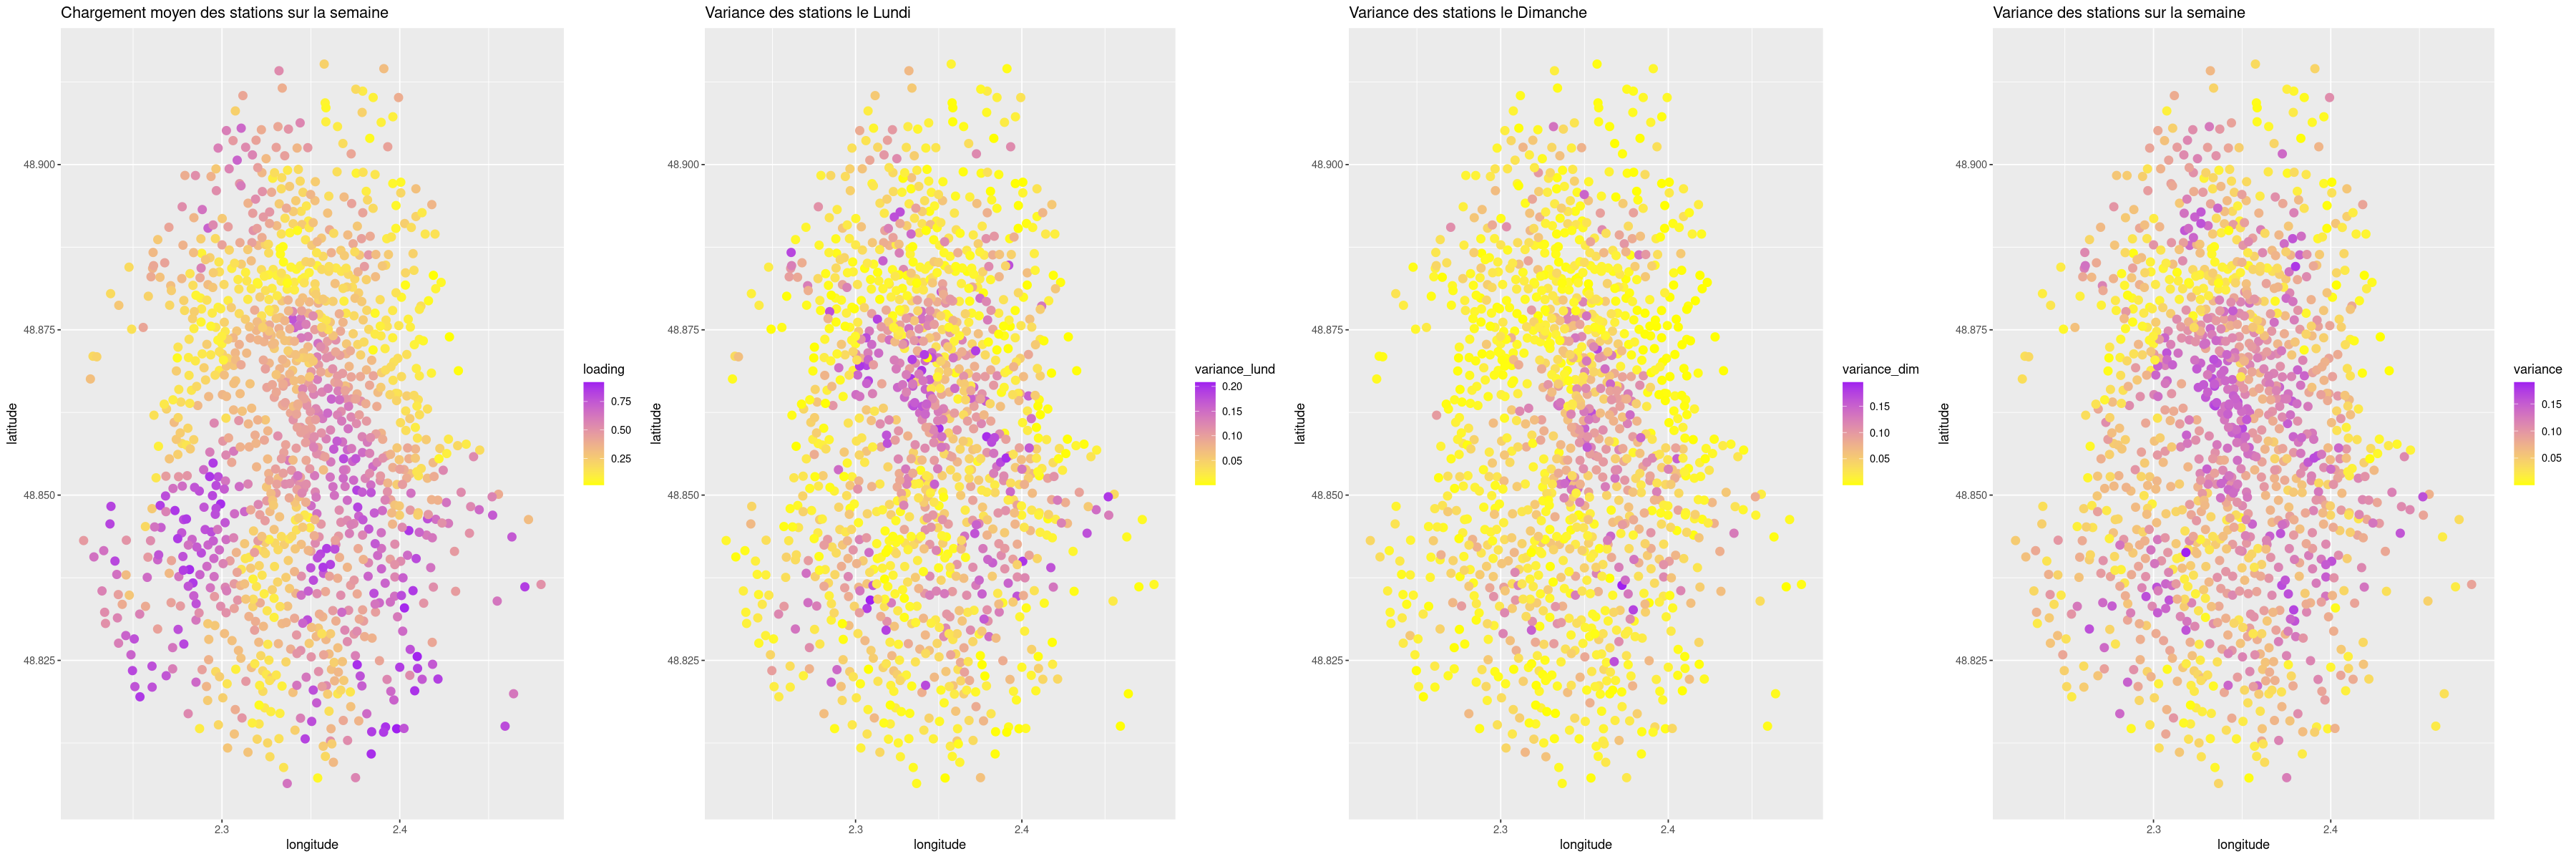

In [20]:
glund= ggplot(coord, aes(x=longitude, y=latitude, color=variance_lund)) + 
    geom_point(size=3) + 
    labs(title = "Variance des stations le Lundi") + scale_color_gradient(low="yellow", high="purple")

gdim= ggplot(coord, aes(x=longitude, y=latitude, color=variance_dim)) + 
    geom_point(size=3) + 
    labs(title = "Variance des stations le Dimanche") + scale_color_gradient(low="yellow", high="purple")

gsemaine= ggplot(coord, aes(x=longitude, y=latitude, color=variance)) + 
    geom_point(size=3) + 
    labs(title = "Variance des stations sur la semaine") + scale_color_gradient(low="yellow", high="purple")

grid.arrange(plot_meanhour,glund,gdim,gsemaine,ncol=4)

**Interprétation:**
- La variance est plus faible le dimanche que le lundi. 
- Il semblerait que la variance soit plus importante pour les stations en centre ville. 
- Les stations au faible ( jaune sur la carte des chargement moyen) chargement semble pour beaucoup avoir une faible variance : elles sont vidée et reste vide pour un temps, ce n'est pas une fréquentation contiue de remplissage donc probablement une prise le matin et un retour le soir. 
- Les stations au chargement important ( violet sur la carte des chargement moyen) qui on des variances hautes (au centre de Paris principalement) sont donc souvent vidée et remplis donc n'on pas nécéssairement un chargement qui baisse. 
- Les sations au haut chargement qui ont une faible variance sont quant à elles très peut fréquentées. on voit qu'elles sont sur l'extérieur de la ville.  

### Bilan sur l'analyse de la variance : 
- Il a globalement plus de fluctuation dans les stations la semaine que le weekend (en supposant le comportement semaine similaire au lundi et celui du weekend similaire au dimanche) 
- Les sations au faible chargement restent vide (faible variance) il faudrait donc améager un système de remplissage sur la journée ou/et augmenter leur capacité. 
- Les staions du centre (haut chargment et variance) semble avoir un bon fonctionnement 
- Les stations en périphérie sont peu fréquentées il serait donc interessant de baisser leur capacité pour augmenter les staions trop souvent vides. 

## III - Analyse en composante principale

Nous effectuons ici une Analyse en Composantes Principales (ACP) dans un double but :
- But exploratoire afin d'étudier le jeu de données et de voir si nous ne pouvons pas extraire des informations pertinentes.
- But de réduction de dimension afin de réduire la dimension du jeu de données et de simplifier, si cela est possible, certaines interprétations.

### Variance, valeurs propres et dimensions

Nous analysons les pourcentages de variance expliqués par chaque dimension.

eigenvalue variance.percent cumulative.variance.percent
Dim.1 66.888963  39.814859        39.81486                   
Dim.2 39.486446  23.503837        63.31870                   
Dim.3  8.867649   5.278363        68.59706                   
Dim.4  7.305326   4.348408        72.94547                   
Dim.5  5.503113   3.275662        76.22113                   
Dim.6  3.245742   1.931989        78.15312

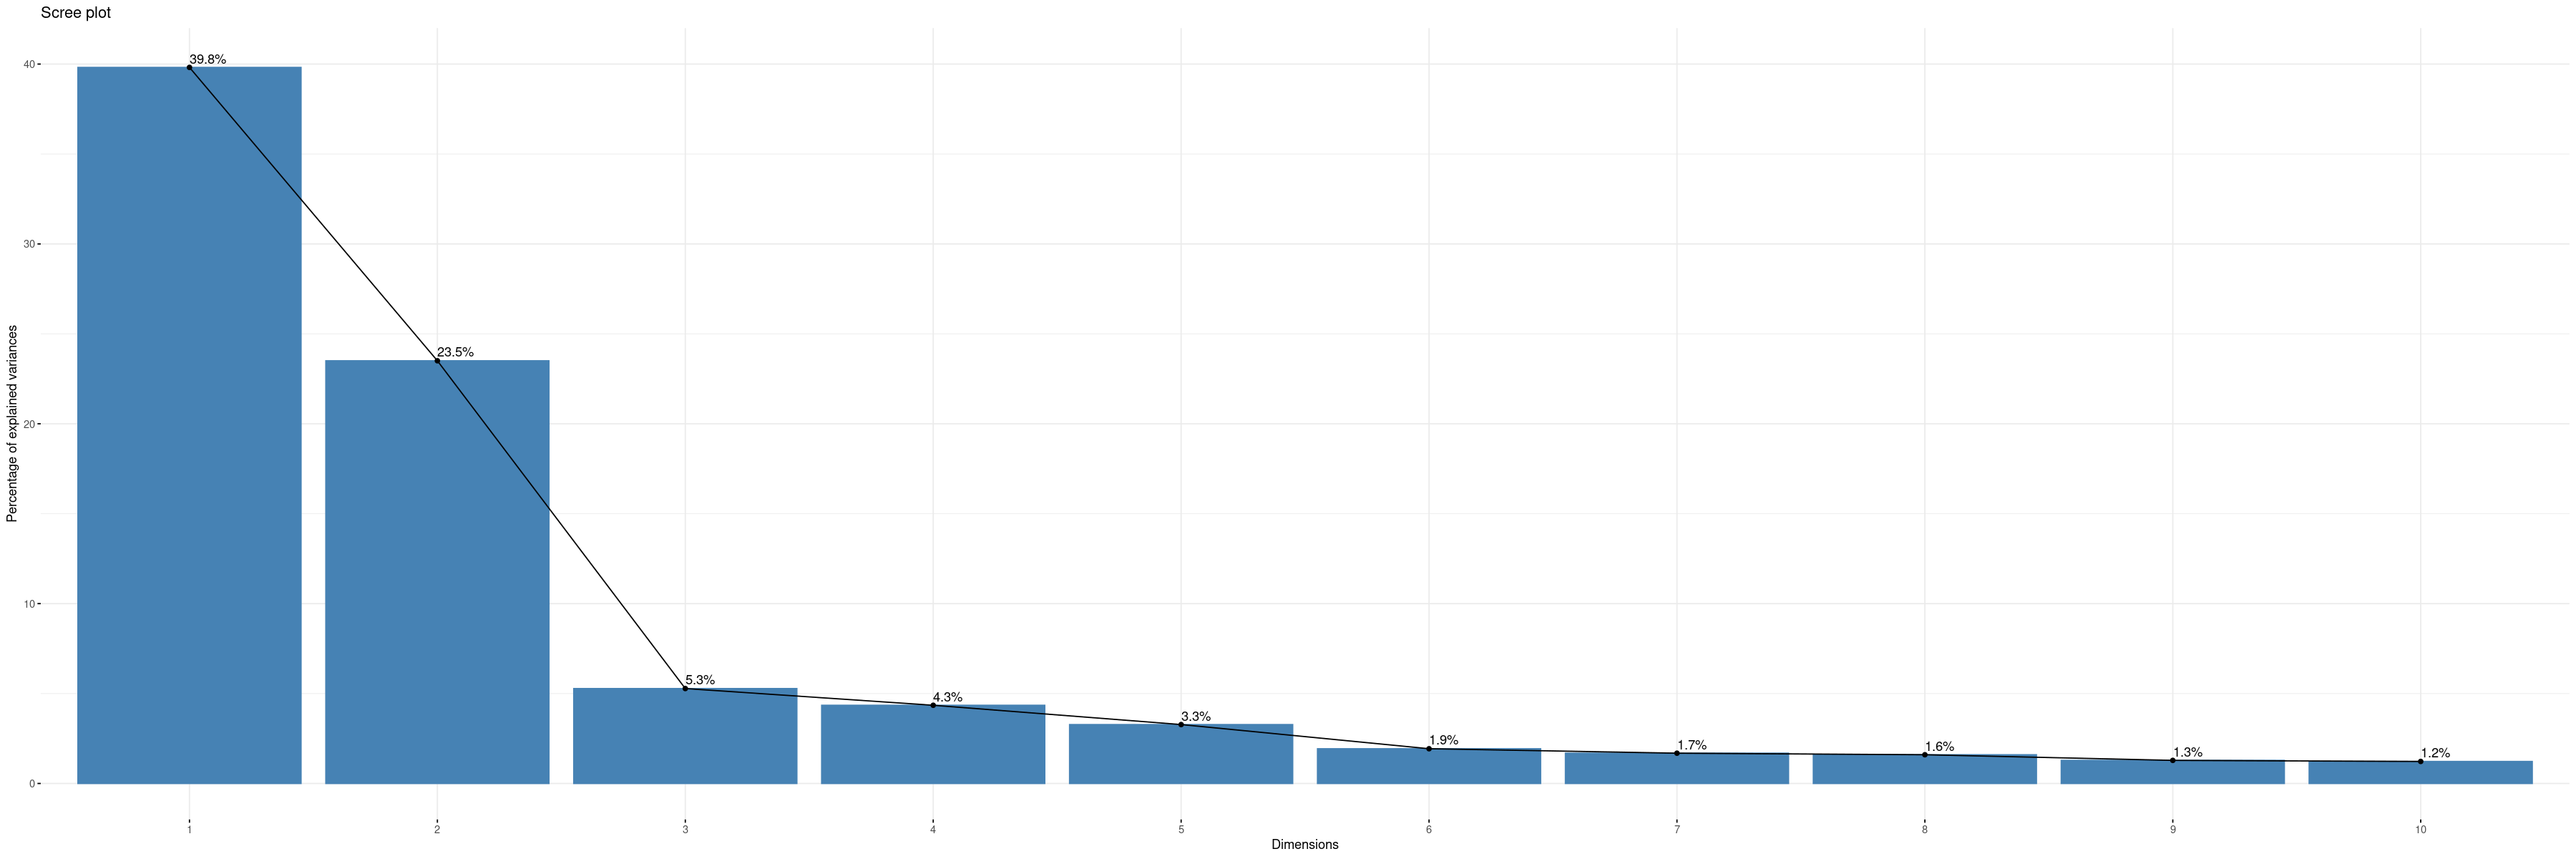

In [21]:
acp = PCA(loading, scale.unit = TRUE,graph = FALSE)
fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
head(get_eig(acp))

**Interprétation :**

Concernant le choix des dimensions, il est préférable de se restreindre à 5 dimensions ce qui explique plus de 75% de la variance du jeu de données. Les dimensions suivantes ne portent que très peu d'informations sur la variabilité du jeu de données et il faudrait considérer 7 dimensions supplémentaires pour gagner 10% de variance expliquée.

---

### Interprétation des dimensions

Nous interpreterons ici, les trois premières dimensions qui traduisent un phénomène dans notre étude de remplissage.

#### Dimension 1

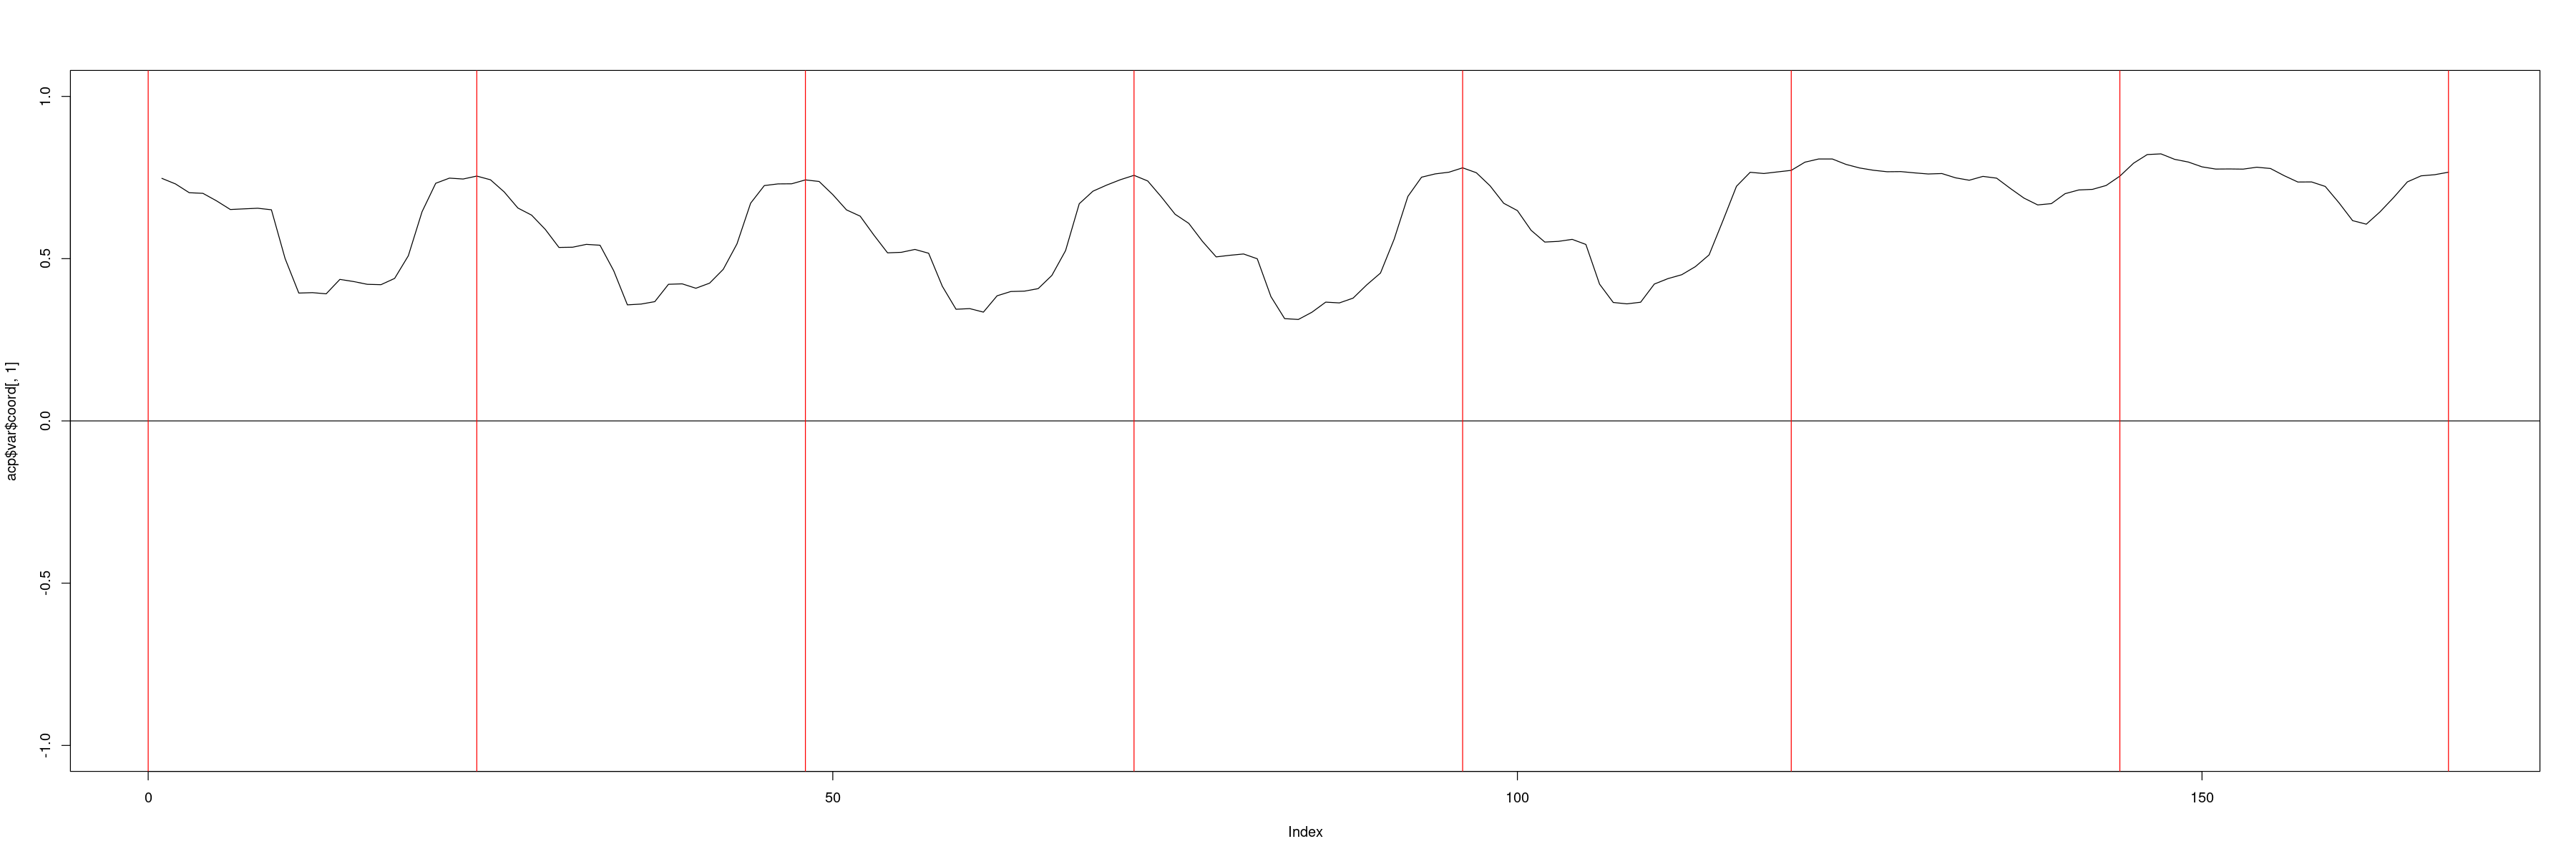

In [22]:
plot(acp$var$coord[,1],type='l',ylim=c(-1,1))
abline(h=0)
abline(v=c(0,24,48,72,96,120,144,168),col="red")

**Interprétation :**

Le graphique permet de visualiser les coordonnées de nos variables projetés sur la dimension 1 de notre ACP. On observe que nos variables sont représentées toutes positivement sur la dimension 1 avec un poids compris entre 0.3 et 0.8 environ. On retrouve une périodicité journalière et ce graphe ressemble très fortement aux graphes de chargement moyen observés auparavant. On en déduit que la dimension 1 permet d'avoir une première appréciation du remplissage moyen.

---

#### Dimension 2

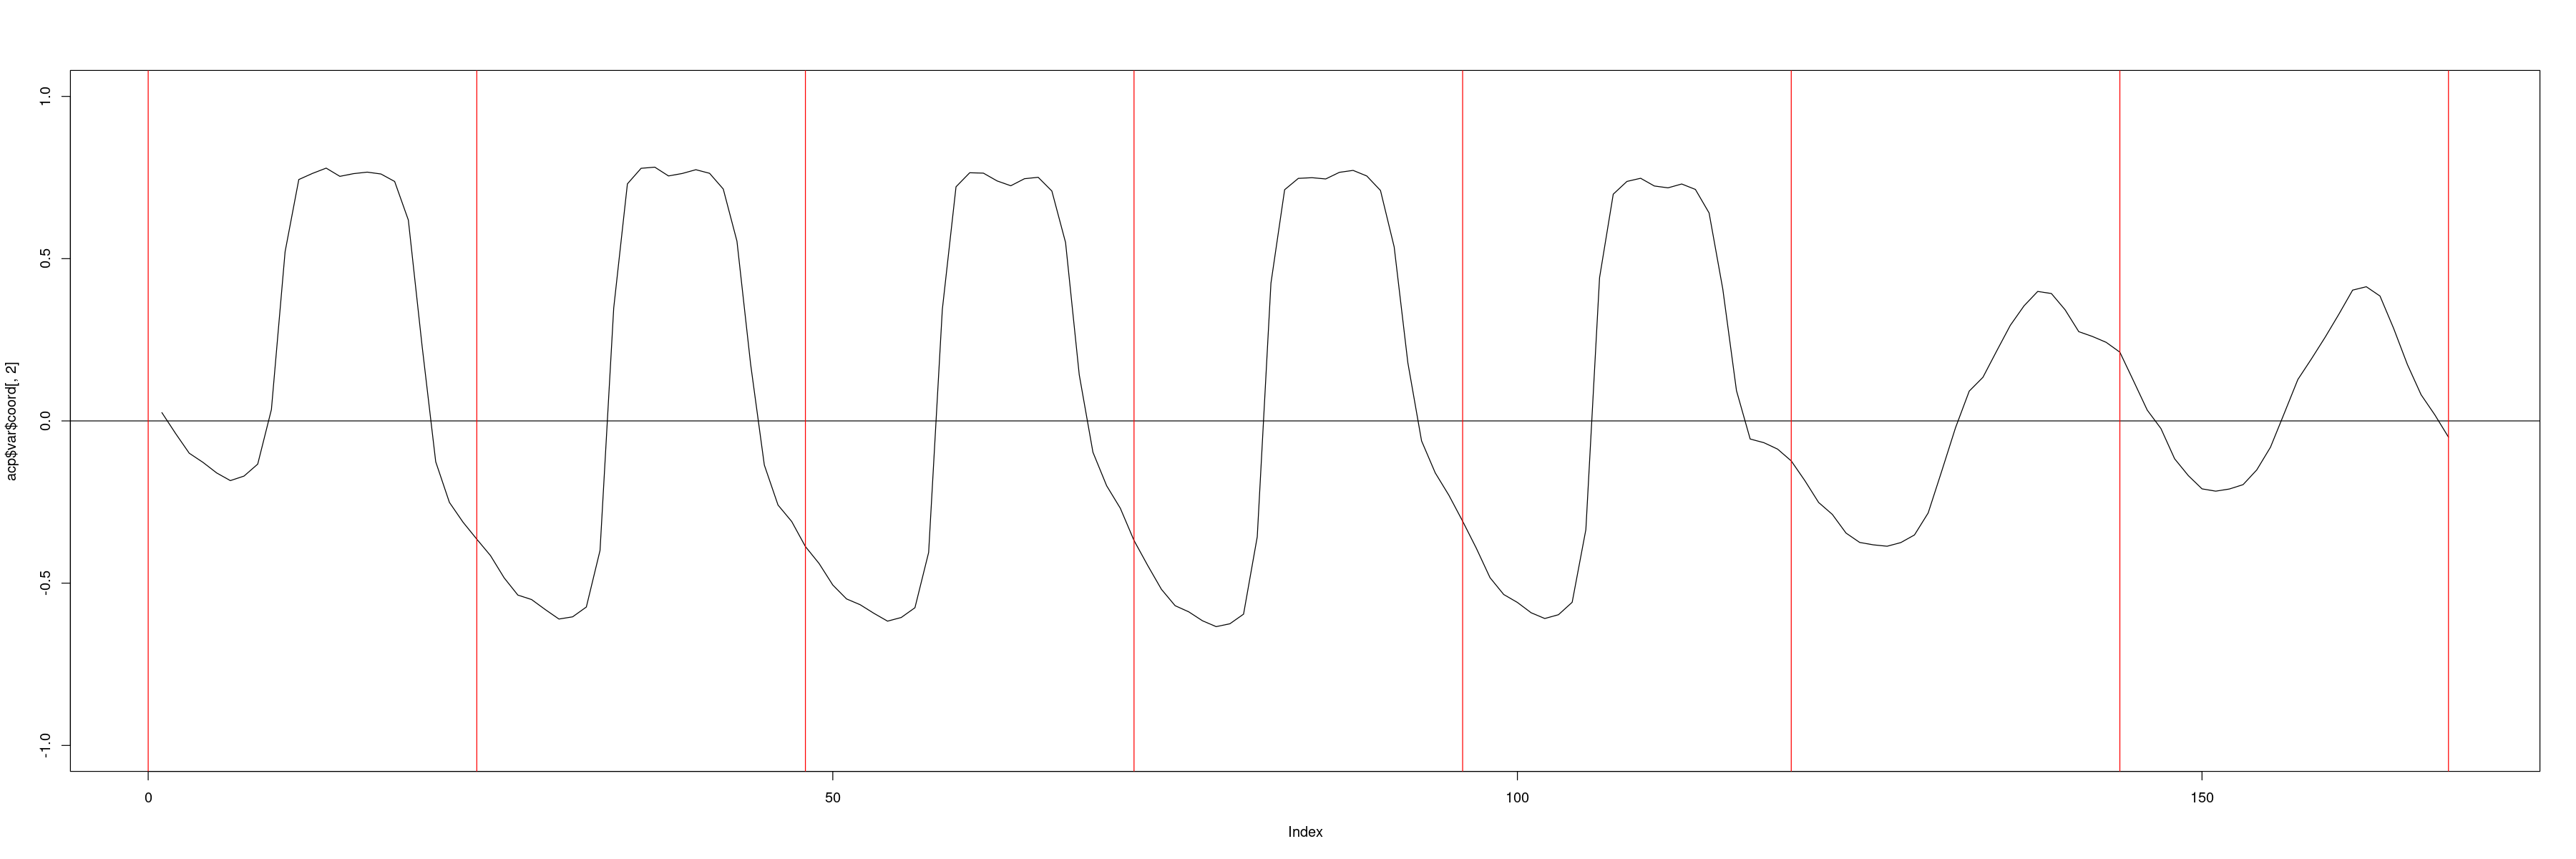

In [23]:
plot(acp$var$coord[,2],type='l',ylim=c(-1,1))
abline(h=0)
abline(v=c(0,24,48,72,96,120,144,168),col="red")

**Interprétation :**

On observe que les variables sont représentées dans la dimension 2 de manière positive et négative, pour des poids oscillant dans l'intervalle [-0.6 , 0.8]. On retrouve également une périodicité journalière et on remarque que les valeurs négatives sont autour des heures de nuit. On en déduit que la dimension 2 permet d'expliquer la distinction entre les heures de la journée et celles de la nuit dans l'utilisation des vélos. Par ailleurs, on observe que pour les deux journées du week-end, les poids sont moins marqués. Ceci fait sens avec nos interprétations précédentes. En effet, nous avions vu que le week-end les taux de chargements étaient plus lisses ; et les personnes ont tendance à sortir plus tard le soir ce qui réduit la différence d'utilisation entre la journée et la nuit.

---

#### Dimension 3

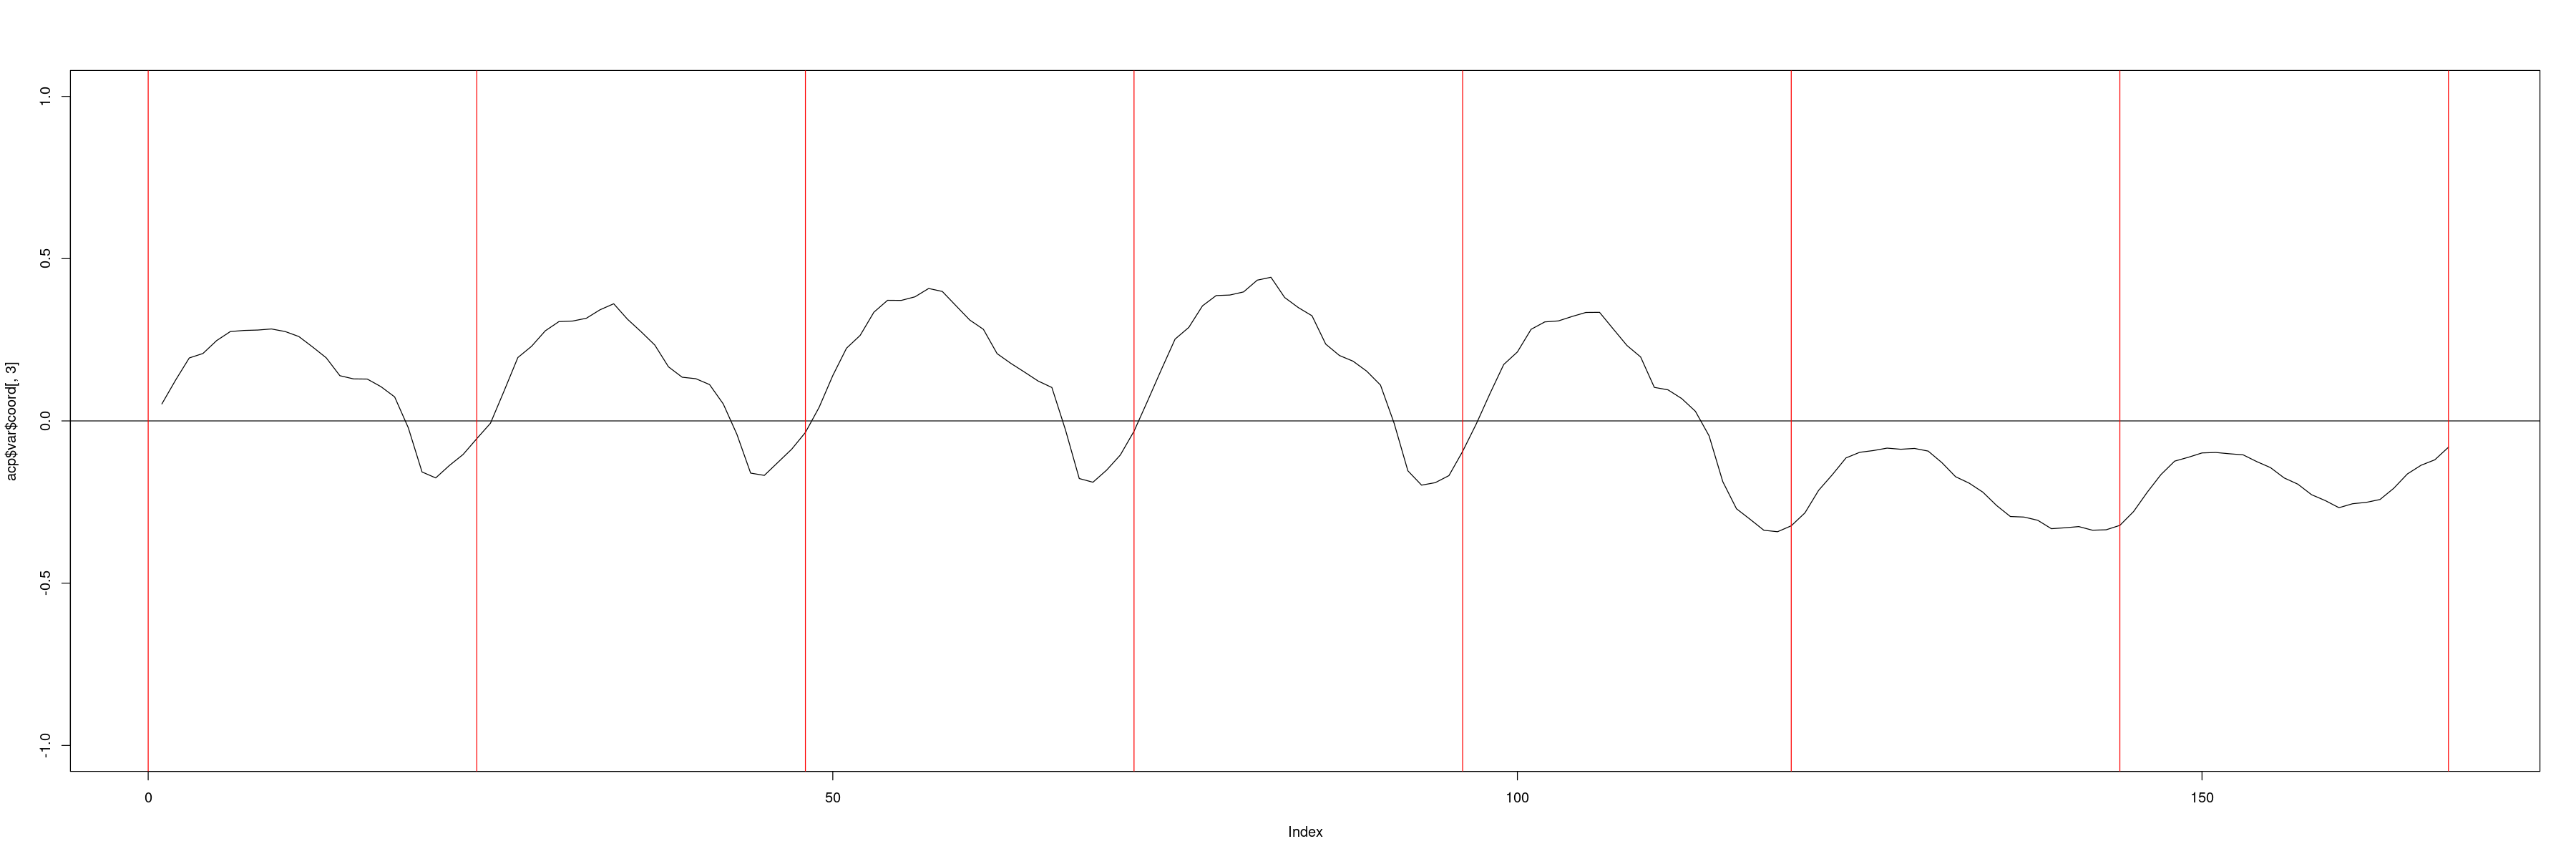

In [24]:
plot(acp$var$coord[,3],type='l',ylim=c(-1,1))
abline(h=0)
abline(v=c(0,24,48,72,96,120,144,168),col="red")

**Interprétation :**

Nous observons sur ce graphique la représentation de nos variables sur la dimension 3 de l'ACP. Nos variables sont représentées dans la dimension 3 avec des poids variant entre -0.4 et 0.5. On distingue nettement deux zones différentes qui correspondent aux jours de la semaine (périodicité avec des valeurs majoritairement positives) et à ceux du week-end (autre motif périodique entièrement négatif). La dimension 3 met donc en lumière une différence déjà observée précedemment lors de la première partie, celle entre les jours de la semaine et le week-end.

Les dimensions 4 et 5 étant plus difficile à interpréter nous ne les présentons pas ici.

---

### Affichage des individus dans le plan ACP

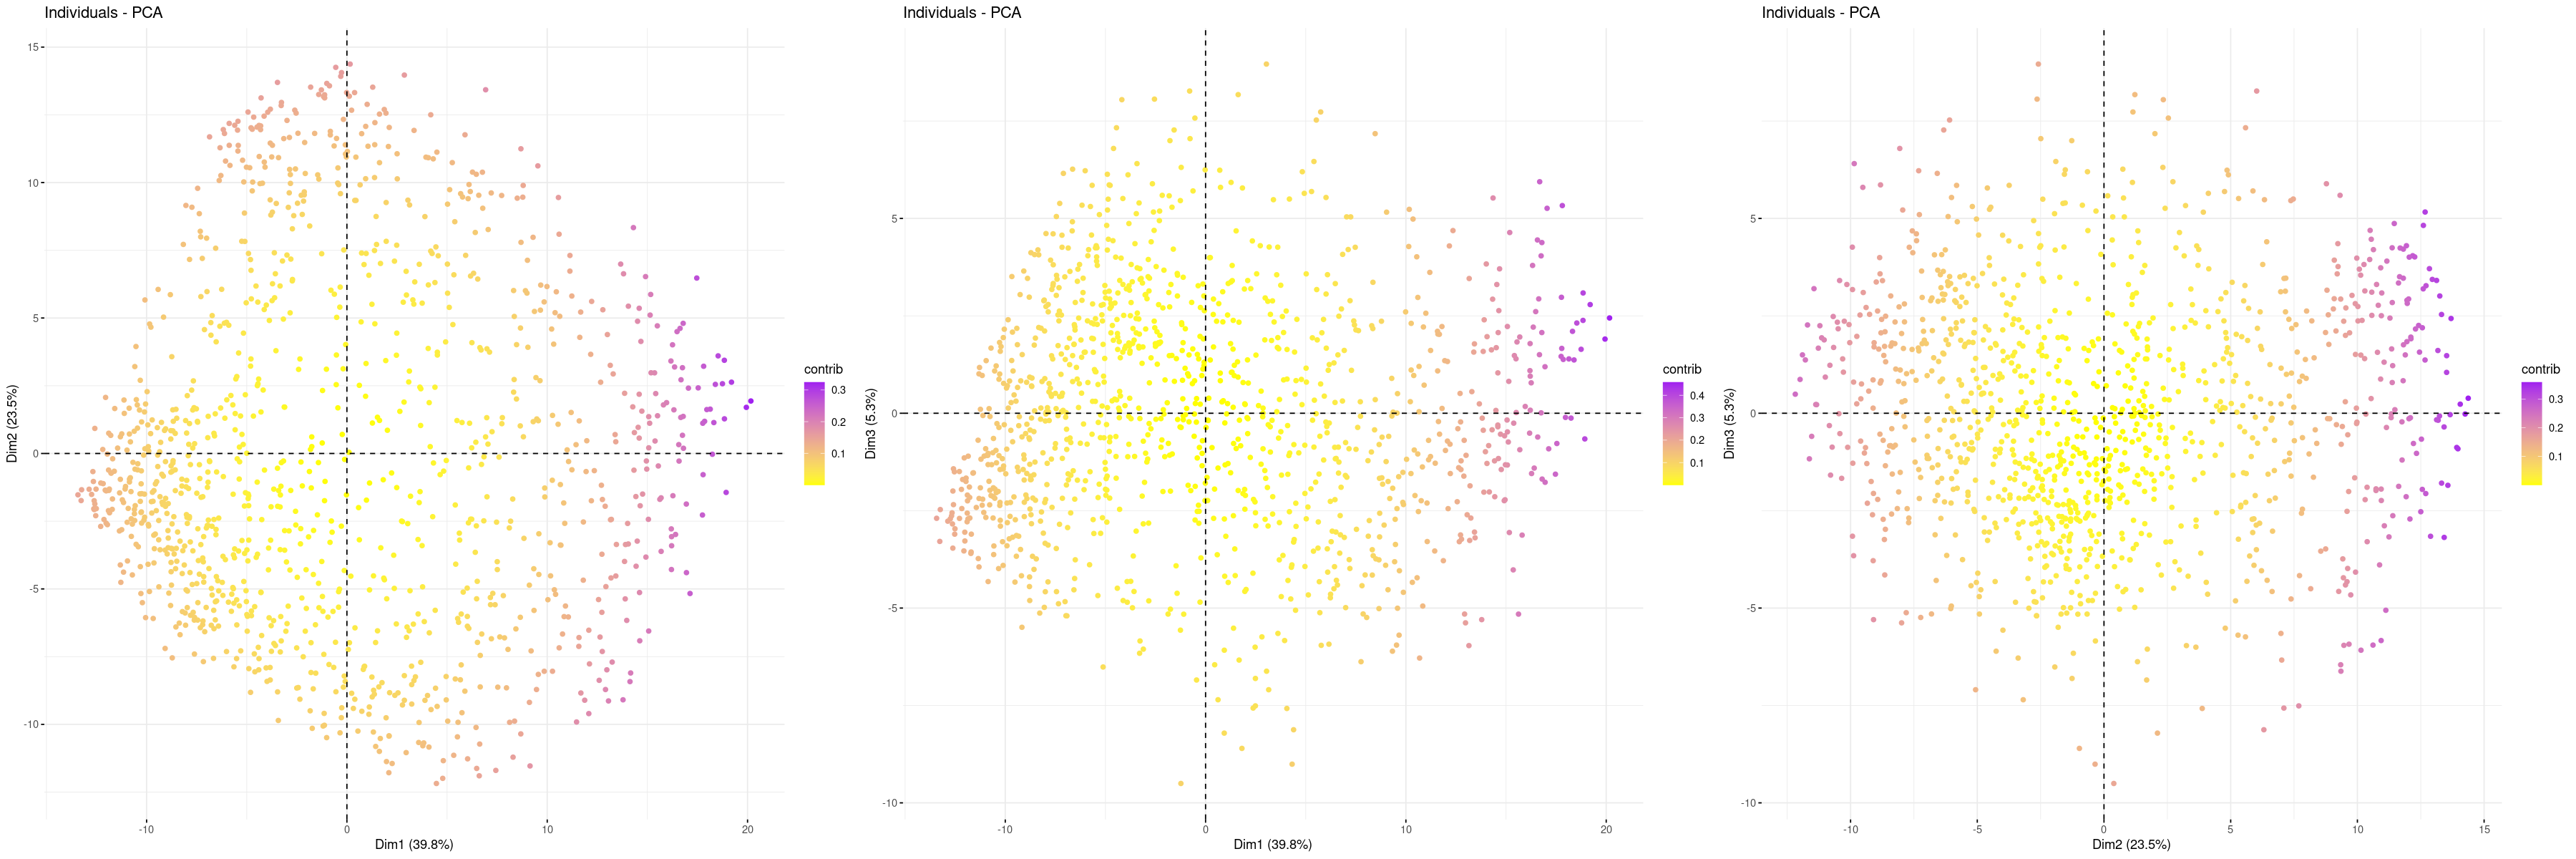

In [25]:
p_12 = fviz_pca_ind(acp, label= "none", col.ind="contrib", gradient.cols=c("yellow", "purple"))
p_13 = fviz_pca_ind(acp,axes = c(1, 3) , label= "none", col.ind="contrib", gradient.cols=c("yellow", "purple"))
p_23 = fviz_pca_ind(acp,axes = c(2, 3) , label= "none", col.ind="contrib", gradient.cols=c("yellow", "purple"))
grid.arrange(p_12,p_13,p_23,ncol=3)

**Interprétation :**

- On ne distingue pas de clusters en particuliers selon nos dimensions.

---

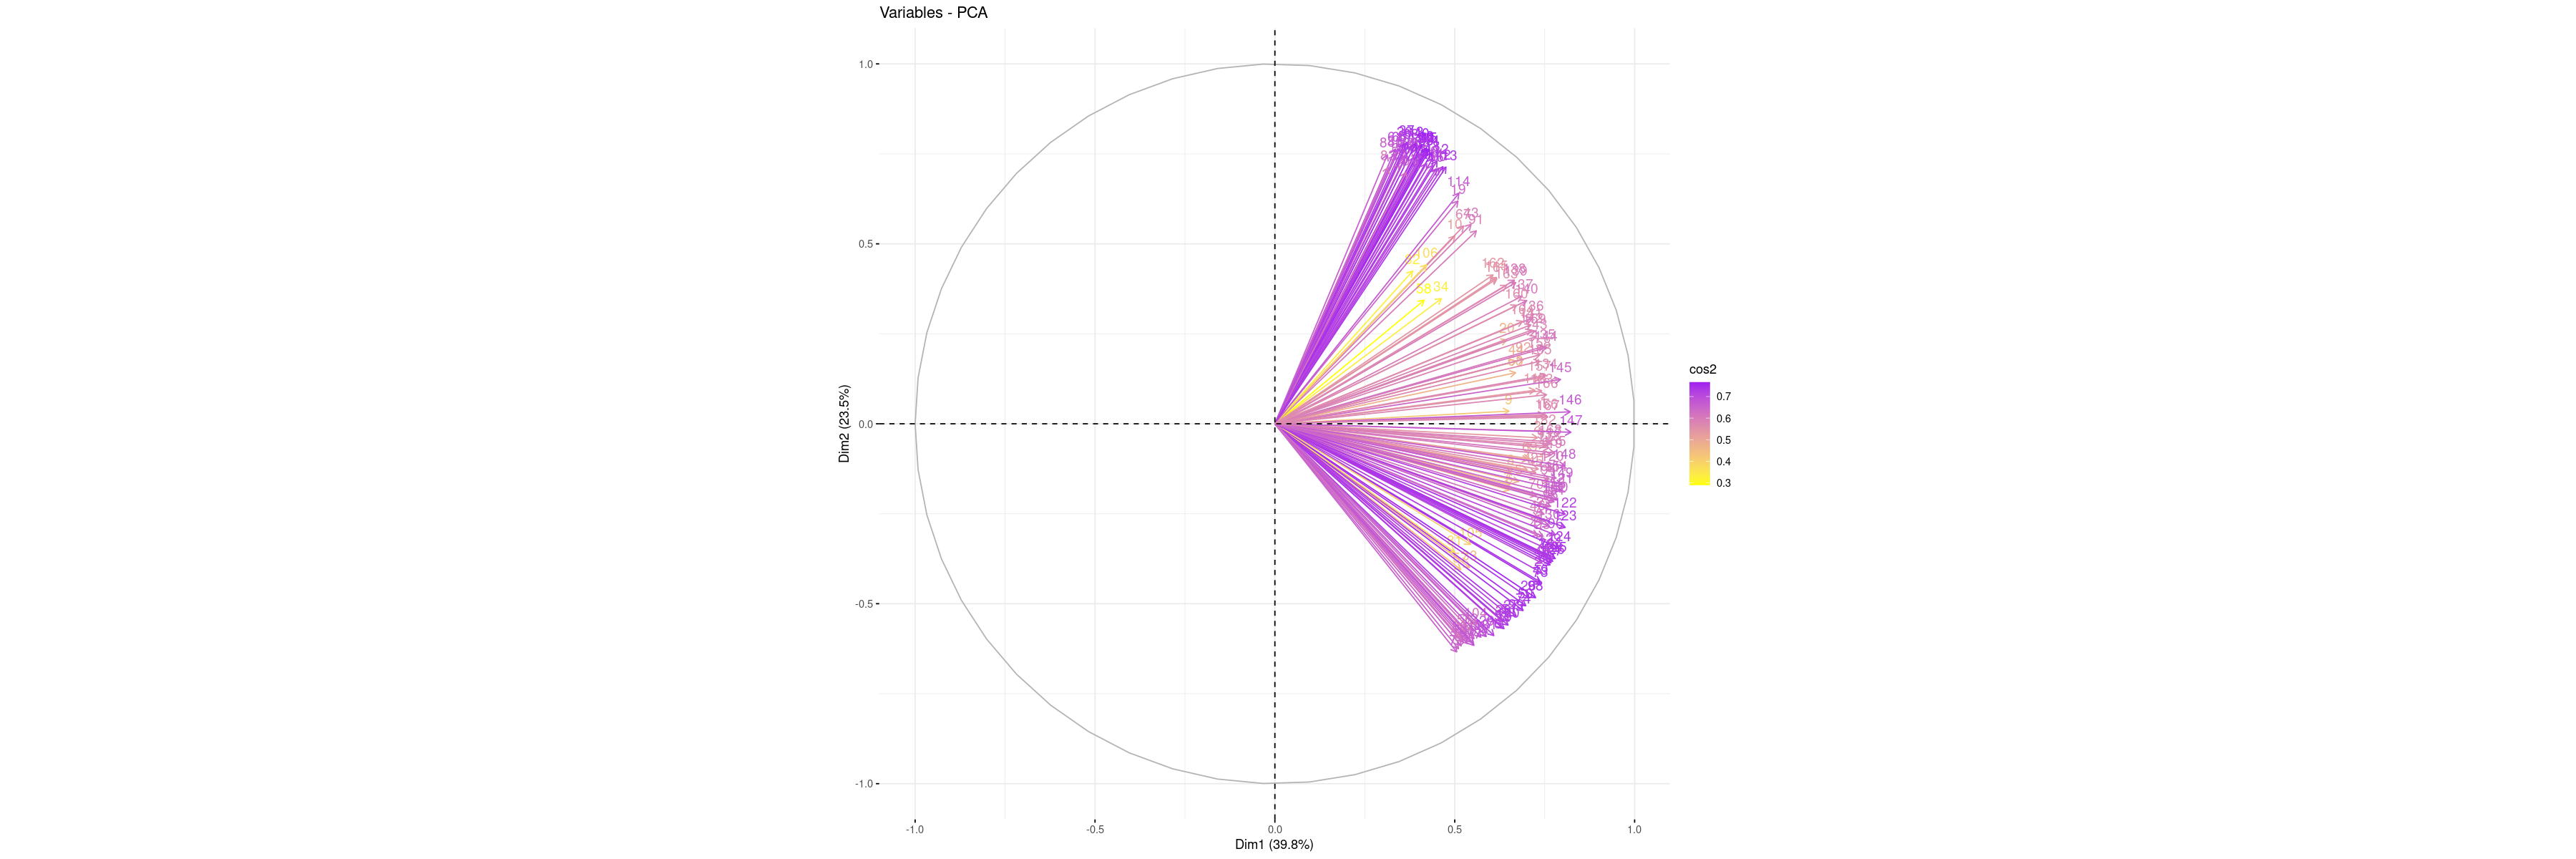

In [26]:
fviz_pca_var(acp,col.var= "cos2",gradient.cols=c("yellow", "purple"))

**Interprétation :**

On observe que toutes nos variables sont corrélées positivement avec la dimension 1. Cela est cohérent avec l'interprétation faite de cette dimension car la moyenne de chargement est entre 0 et 1.

Puis une moitié des variables semble être corrélée positivement avec la dimension 2 et une autre moitié négativement. Cela traduit en effet les varibales sur des horaires de nuit contre celles sur des horaires de jours. 

---

### Variable Bonus

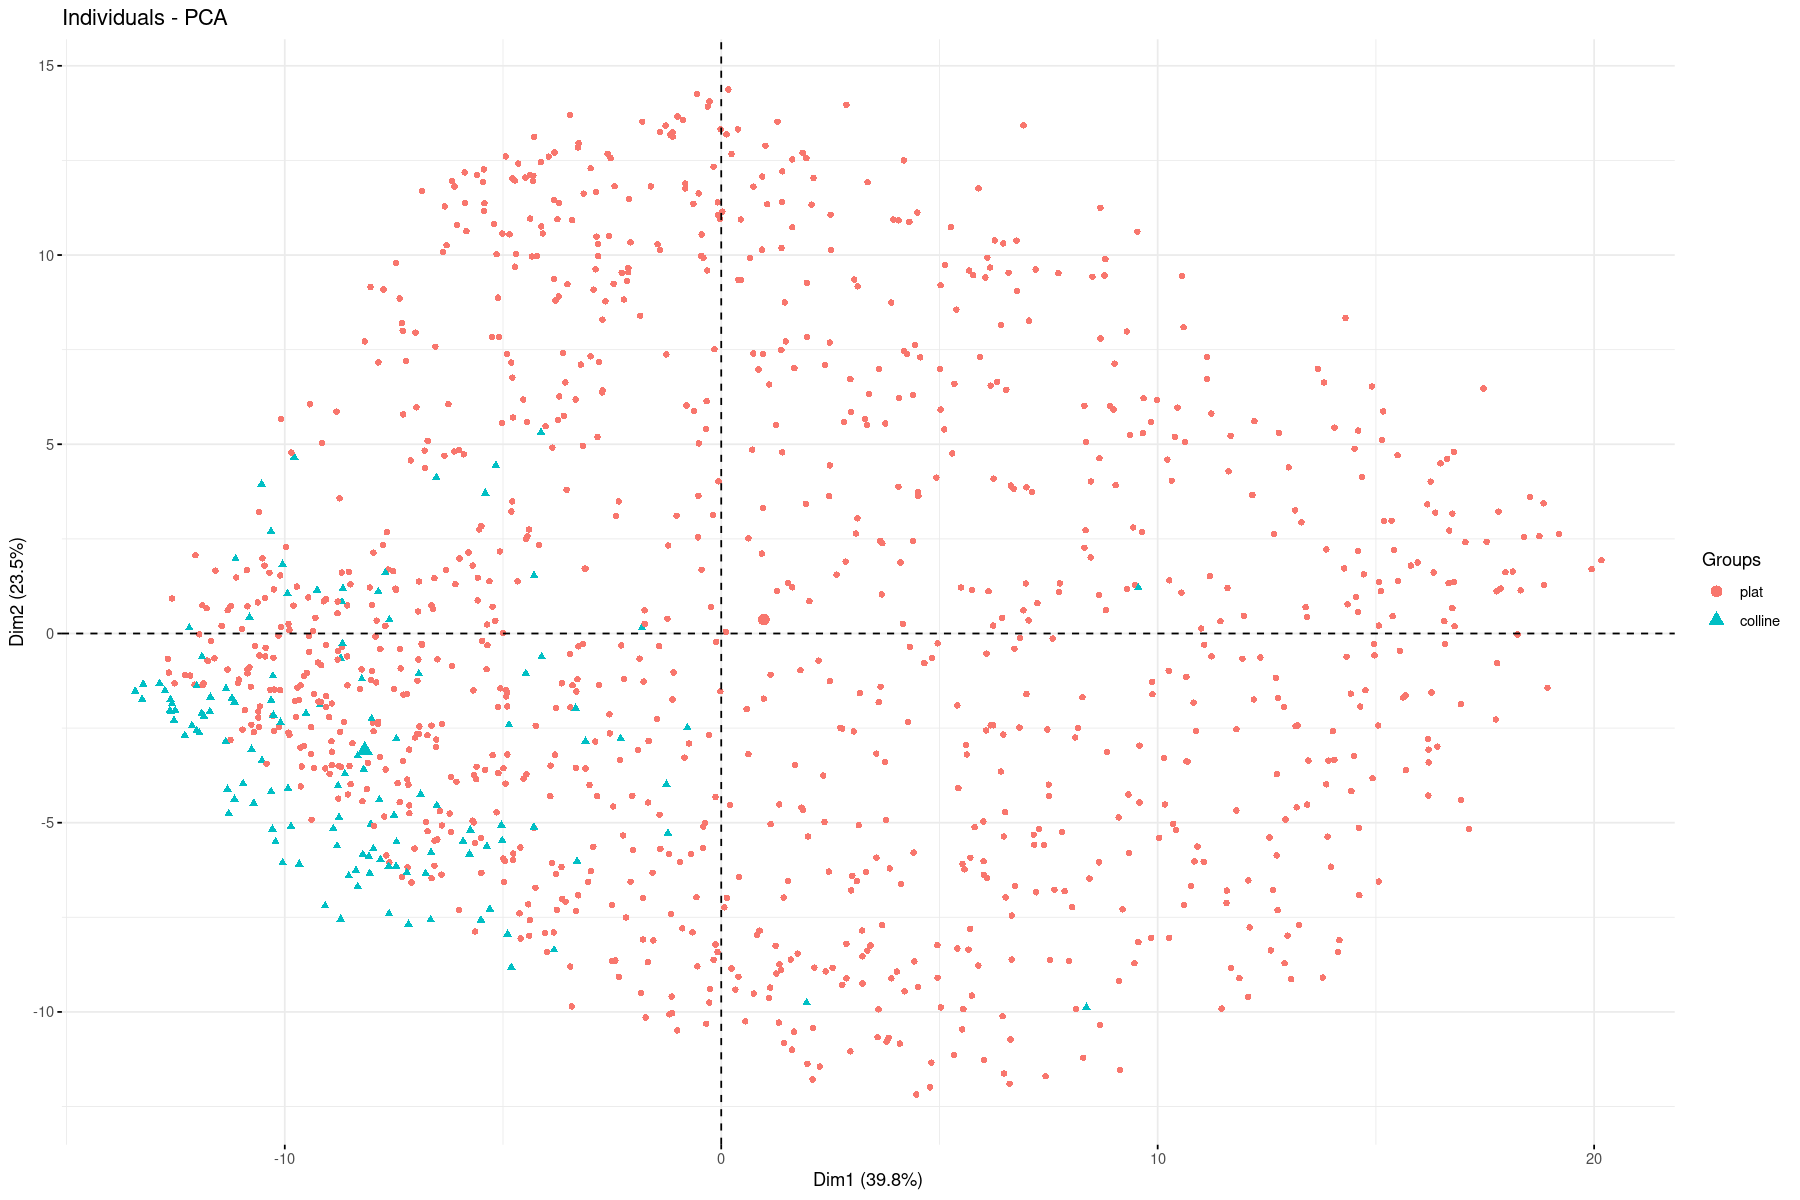

In [27]:
options(repr.plot.width = 15, repr.plot.height = 10)


Bonus = factor(coord$bonus,labels=c("plat","colline"))
fviz_pca_ind(acp,label="none",habillage = Bonus)

**Interprétation :**

Bien qu'il n'y ait pas de cluster apparent, nous pouvons remarquer que les stations en altitude ont tendance à avoir leur coordonnée dans la première dimension négative.
On a bien un remplissage moyen faible dans les stations en altitude.

---

### Réduction du nombre de dimensions

Nous créons ici le jeu de données en ne gardant que les 5 premières dimensions de l'ACP qui permettent d'expliquer 76% de la variabilité totale du jeu de données.

In [28]:
loading_reduced = acp$ind$coord[,1:5]
head(loading_reduced)

Dim.1      Dim.2      Dim.3     Dim.4     Dim.5    
X.EURYALE.DEHAYNIN    -3.0471538  -6.561908 -1.773282  4.000091  2.776679
X.LEMERCIER            6.4790797 -11.625998 -1.169473  3.236846  1.466361
X.MEZIERES.RENNES      3.1200033   3.041737 -2.894558  2.553074  3.030746
X.FARMAN               0.6590946   9.916072  2.813183 -6.276868 -4.656399
X.QUAI.DE.LA.RAPEE     4.4430947   7.624636  1.570474  2.915719 -2.173993
X.CHOISY.POINT.D.IVRY -0.4127882  -5.101806 -2.520046  2.441781  2.559581

### Conclusion de l'ACP

L'ACP a permis de confirmer certaines de nos observations et hypothèse de l'étude exploratoire du jeu de données. Ainsi, il semble évident que :
- Le chargement suit une tendance périodique journalière, avec un comportement différent entre la semaine et le week-end.
- La chargement est également très différent en journée par rapport à la nuit. Toutefois, ce comportement est moins marqué le week-end.
- De manière générale, la chargement des stations au cours du week-end est plus lisse qu'en semaine : il n'y a pas d'effet lié aux heures de pointes, et les vélos sont globalement utilisés sur des plages horaires plus étendues.
- Stations en altitude : A COMPLETER

## IV - Clustering
---

On a pu observer précédemment qu'il n'y avait pas de groupes qui se distinguaient avec l'ACP. Nous allons ici appliquer différents algorithmes de clustering afin de tenter de créer des clusters pertinents permettant de regrouper nos stations en fonction de caractéristiques communes. Nous utiliserons différents algorithmes de clustering que nous interpréterons et comparerons afin de déterminer les clusters expliquant le mieux notre jeu de données.

### K-means

Nous commençons par utiliser l'algorithme de K-means qui est l'un des algorithmes de clustering les plus utilisés. Son exécution est rapide est cet algorithme converge. Cependant, il ne converge pas nécessairement vers le meilleur clustering possible et il est très dépendant du choix des centroïdes initiaux. Il faut donc penser à cela lors de l'interprétation afin d'ajuster au mieux les paramètres de l'algorithme (nombre de cluster et méthode pour choisir les premiers centroïdes notamment). Nous commençons donc par déterminer le nombre de cluster optimal.

#### Choix du nombre de clusters

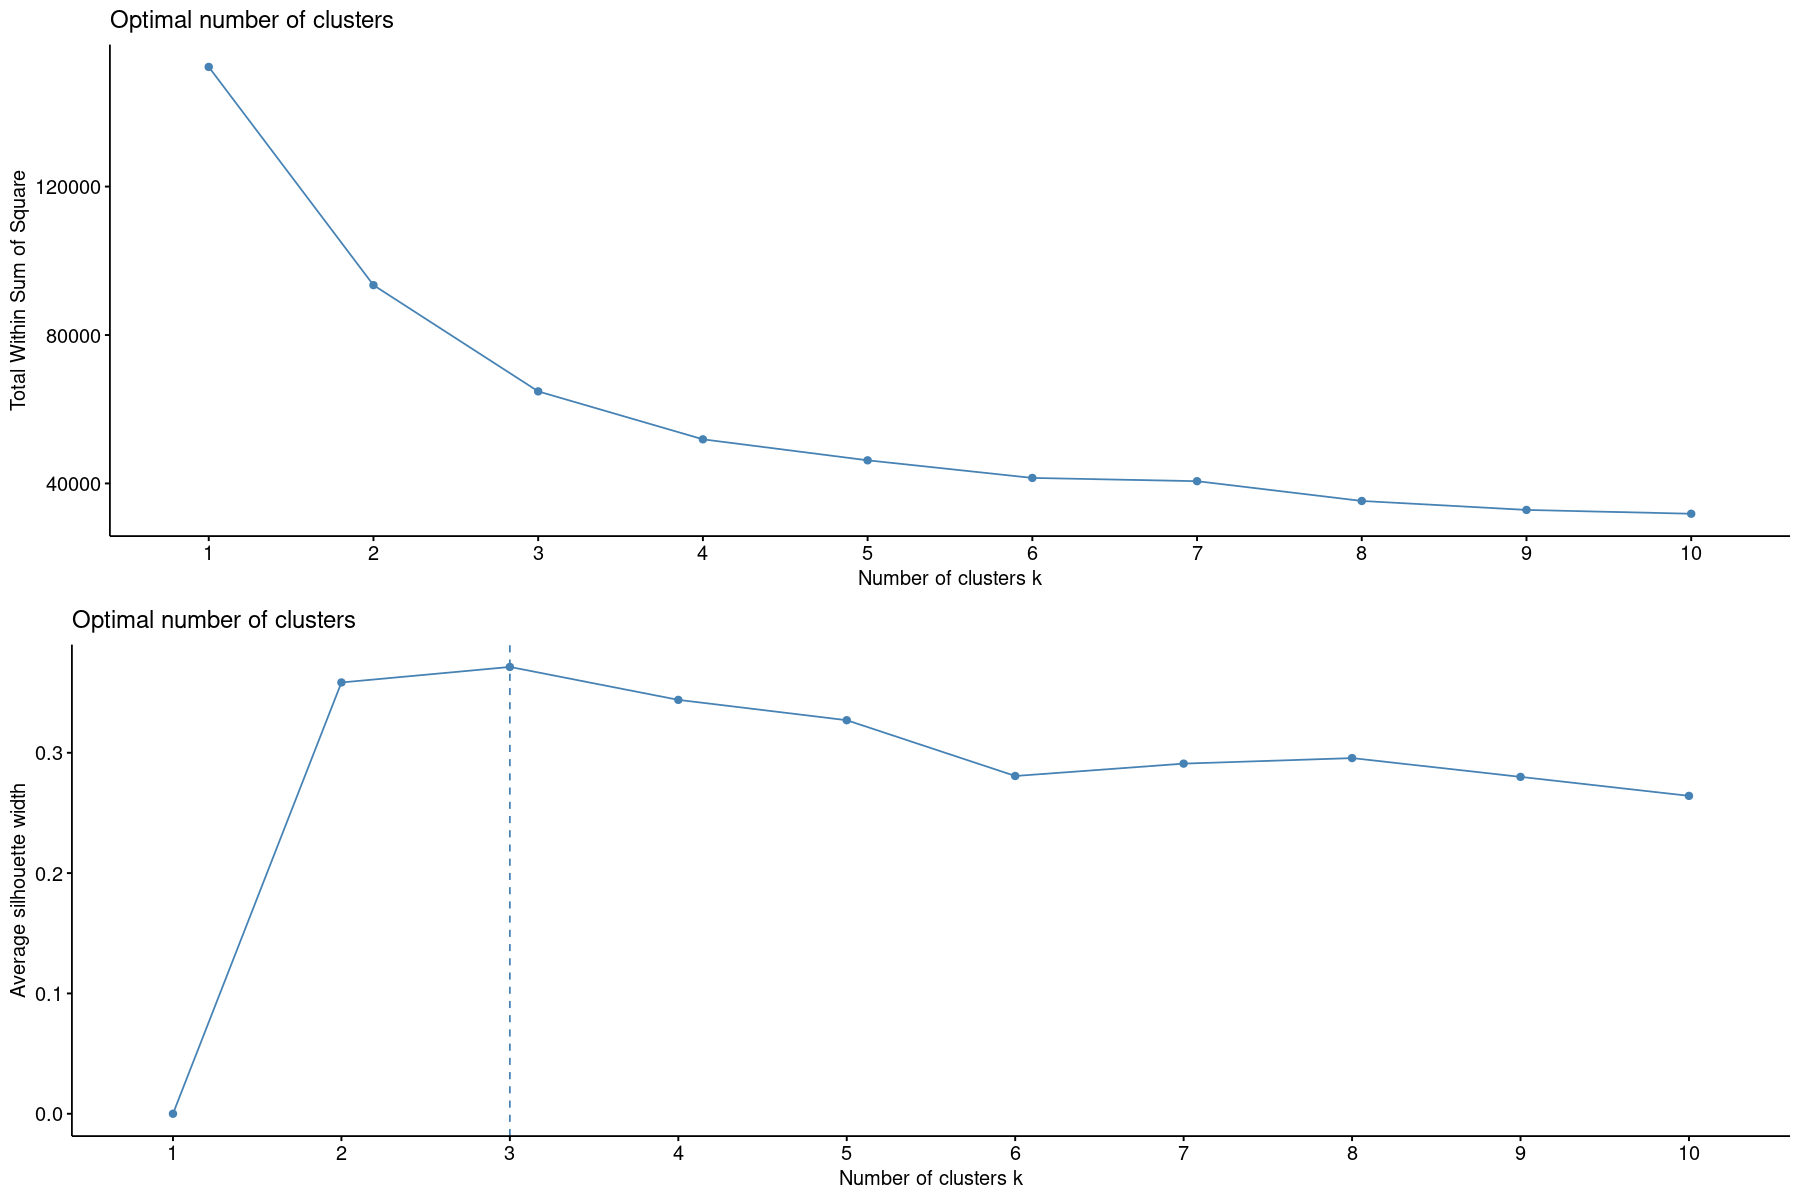

In [29]:
k1=fviz_nbclust(loading_reduced, kmeans, method= "wss")
k2=fviz_nbclust(loading_reduced, kmeans, method= "silhouette")
grid.arrange(k1,k2)

**Interprétation :**

Pour selectionner le bon nombre de clusters, deux méthodes s'offrent à nous. La méthode WSS (méthode du coude), qui dans notre cas nous suggererait de choisir soit 3 sit 4 clusters. La méthode silhouette ici nous permet de dire que diviser en trois cluster serait pertinent. 
Avant de réaliser les clusters, nous nous assurons que nous avons un score silhouette suffisant. 

---

  cluster size ave.sil.width
1       1  370          0.30
2       2  535          0.44
3       3  284          0.32


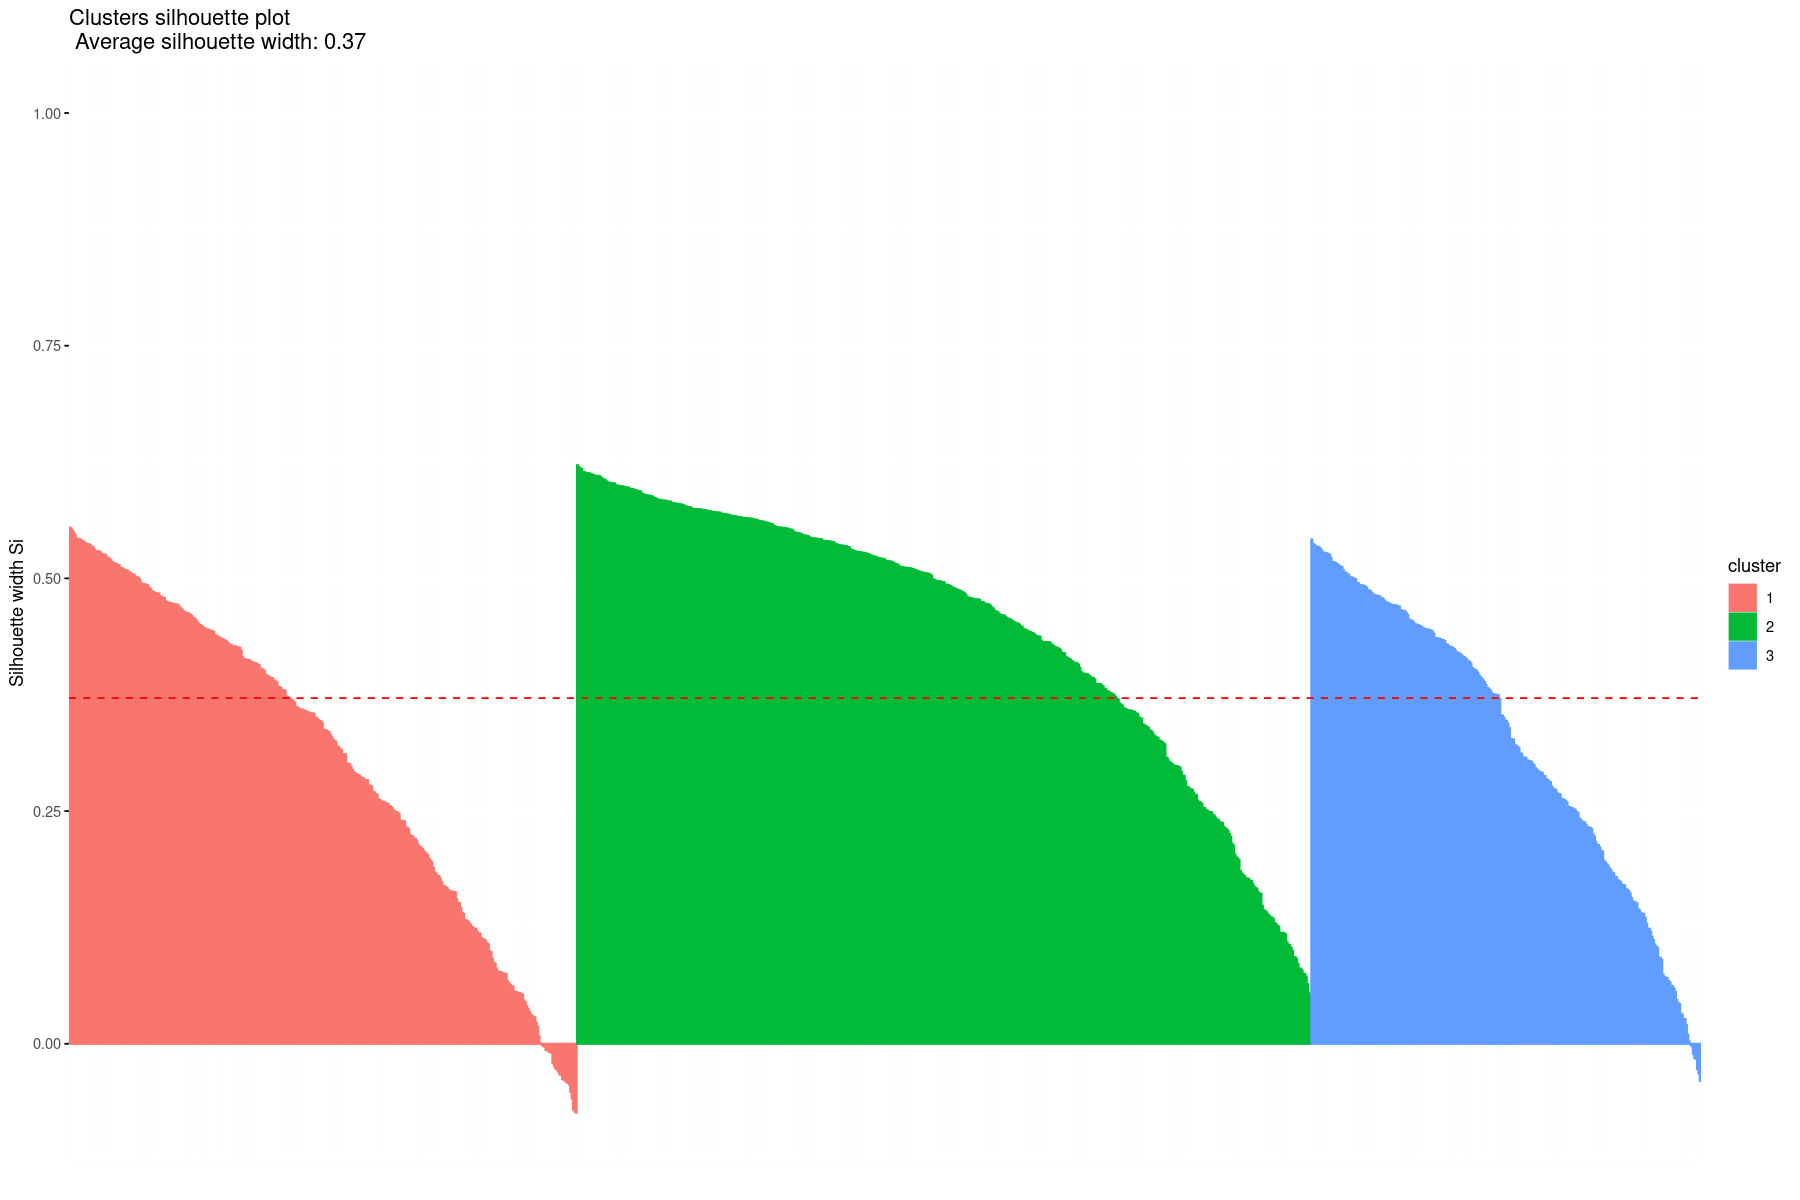

In [30]:
kmean3 = kmeans(loading_reduced, centers=3) 
fviz_silhouette(silhouette(kmean3$cluster,dist(loading_reduced)))

**Interprétation :**

Le silhouette score obtenu est le même pour tous les clusters (environ 0.6). Chaque dent dépasse le score moyen qui est de 0.37.
On remarque qu'une des dents (la verte) est plus large que les autres ( 2 fois plus que la bleue). Cela signifie que nos clusters sont deséquilibrés. 
De plus, il faut faire attention car un petit nombre d'individus des clusters 1 et 2 ont un score silhouette négatif ce qui signifie qu'ils sont plus proches d'une autre cluster.
On se demande donc s'il est préférable de garder 3 clusters ou d'en prendre 4.

---

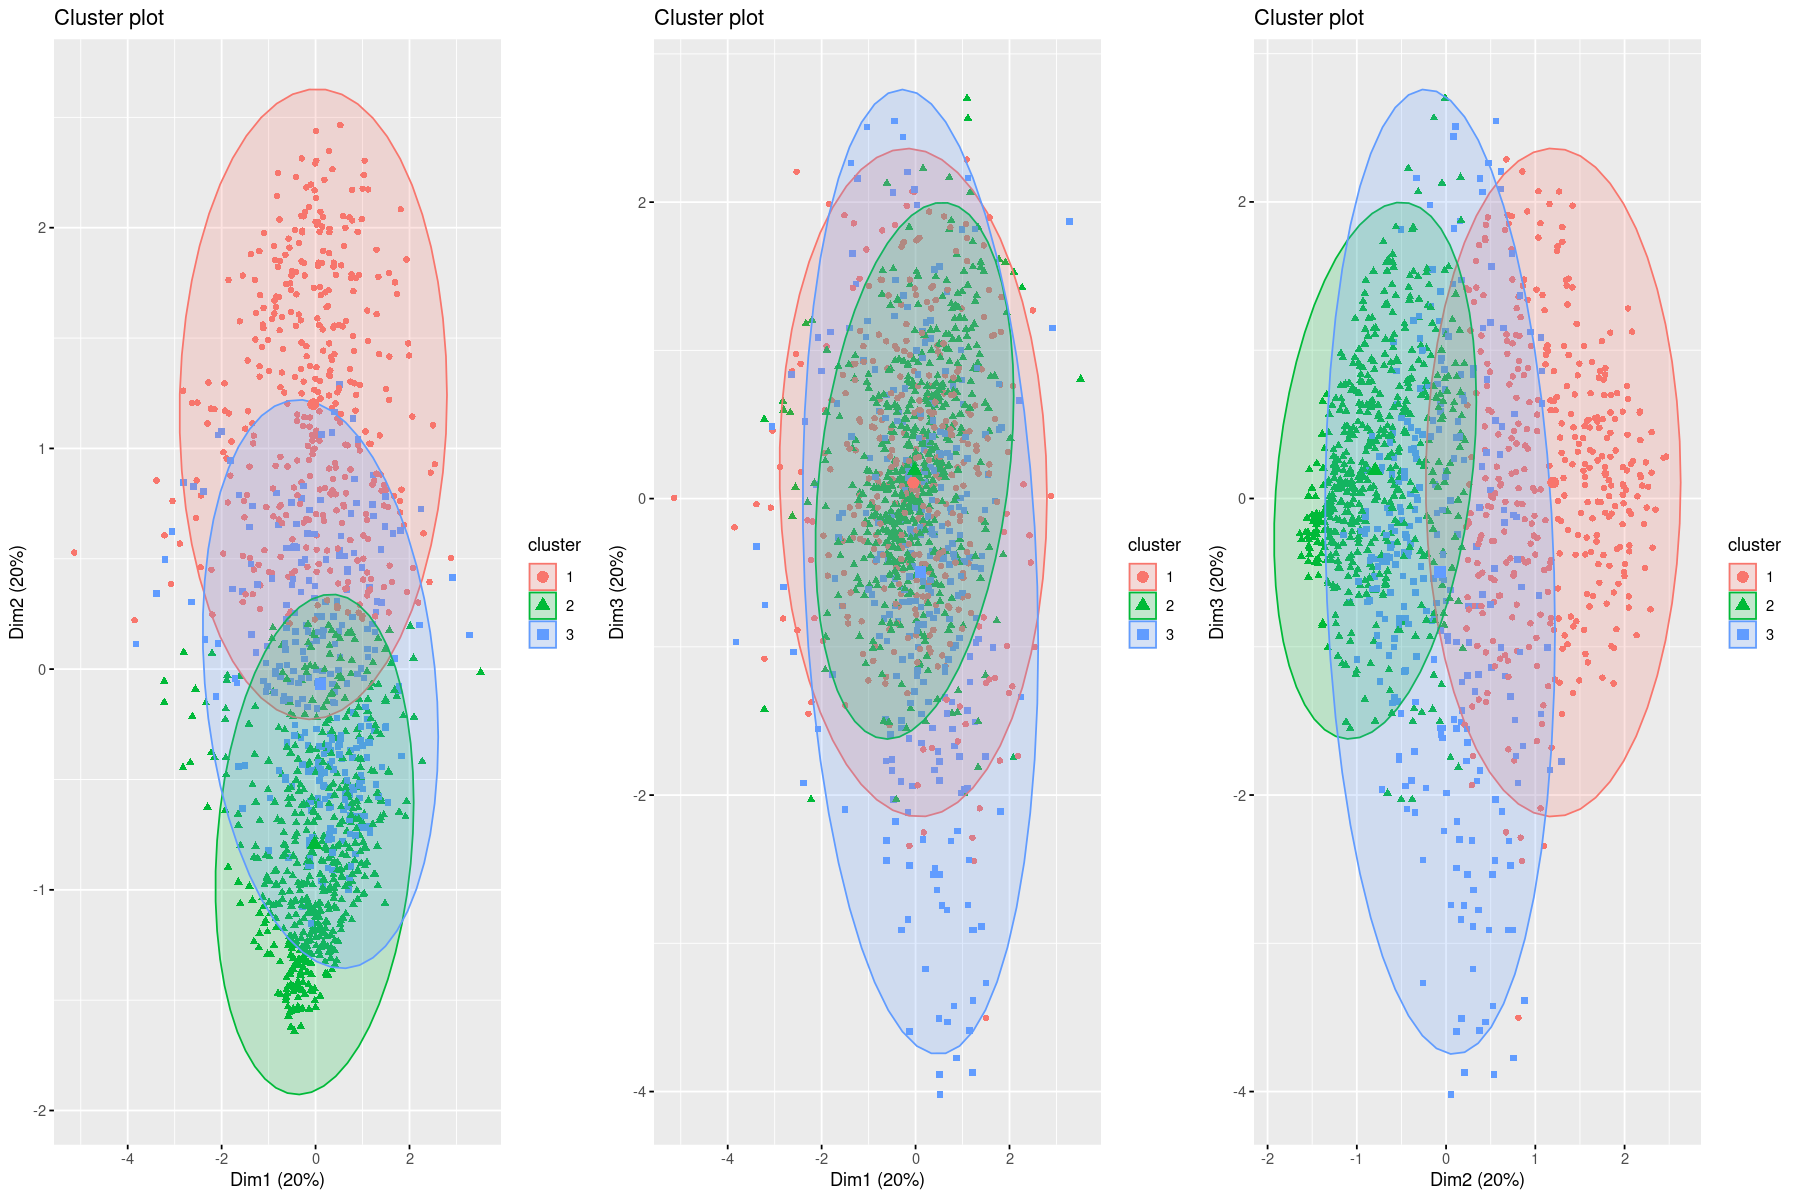

In [31]:
p1 = fviz_cluster(kmean3,axes = c(1, 2),loading_reduced, ellipse.type="norm", labelsize=0)
p2 = fviz_cluster(kmean3,axes = c(1, 3),loading_reduced, ellipse.type="norm", labelsize=0)
p3 = fviz_cluster(kmean3,axes = c(2, 3),loading_reduced, ellipse.type="norm", labelsize=0)

grid.arrange(p1,p2,p3,ncol=3)

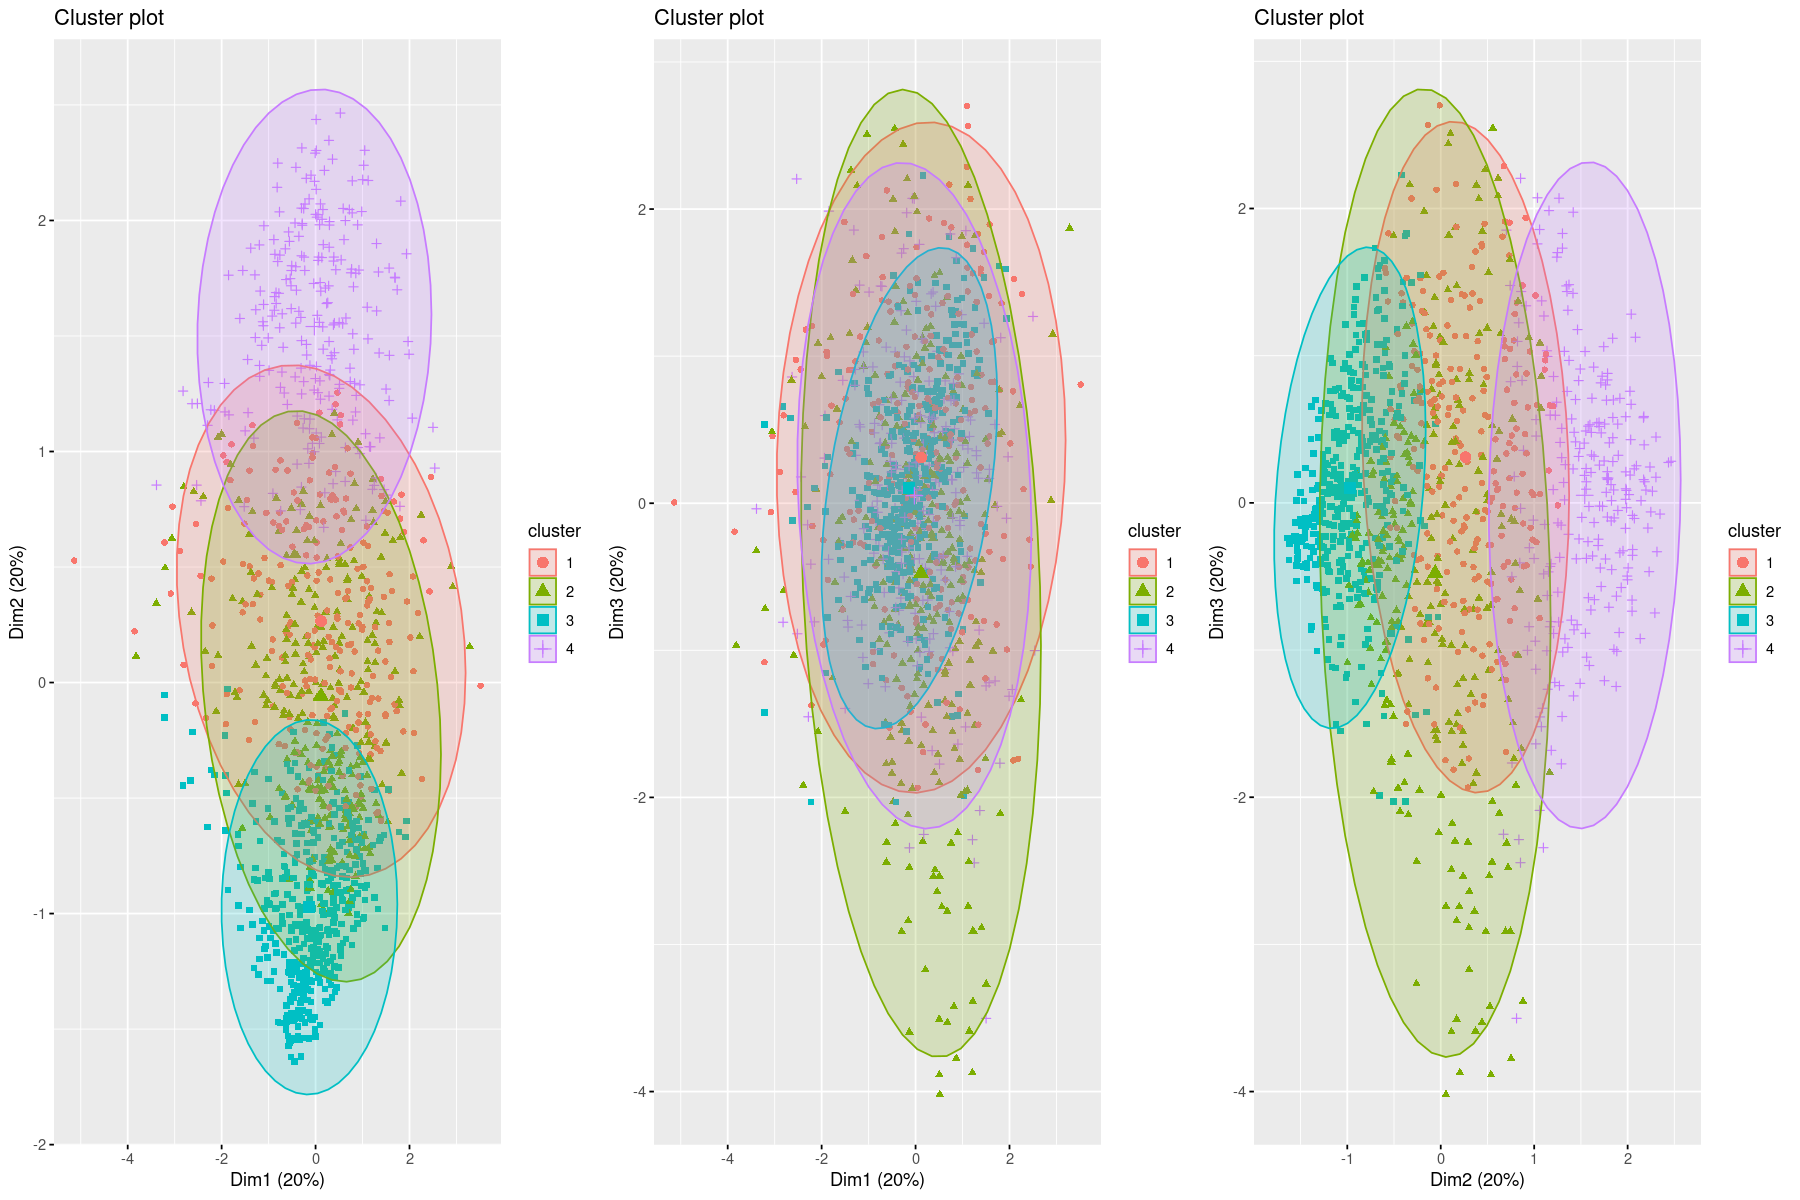

In [32]:
kmean4 = kmeans(loading_reduced, centers=4) 

p1 = fviz_cluster(kmean4,axes = c(1, 2),loading_reduced, ellipse.type="norm", labelsize=0)
p2 = fviz_cluster(kmean4,axes = c(1, 3),loading_reduced, ellipse.type="norm", labelsize=0)
p3 = fviz_cluster(kmean4,axes = c(2, 3),loading_reduced, ellipse.type="norm", labelsize=0)

grid.arrange(p1,p2,p3,ncol=3)

**Interprétation :**

La méthode de clustering par K-means nous donne des clusters bien distincts que dans certaines dimensions (ici 1 et 3). Par ailleurs, on choisira de garder que 3 clusters car 4 clusters ne semble pas plus pertinent. 
On observe sur le plan factoriel d'ACP dim1 et dim 2, la dimension & semble séparer un cluster des deux autres. en effet, le cluster bleu représenterait les stations de basses fréquentations. Les deux autres clusters restent confondus dans ce plan.
Par ailleurs, dans le plan factoriel dim1 et dim3, la dimension 3 distingue le cluster rouge des deux autres. Et la dimension 1 permet de distinguer le cluster vert du cluster bleu. 

---

In [33]:
# Pour changer les classes pour les matrices de confusion ( si ça sert )

cluster_center_1 <- kmean3$centers[1, ]
cluster_center_2 <- kmean3$centers[2, ]
cluster_center_3 <- kmean3$centers[3, ]

cluster_1_points <- which(kmean3$cluster == 1)
cluster_2_points <- which(kmean3$cluster == 2)
cluster_3_points <- which(kmean3$cluster == 3)

kmean3$cluster[cluster_1_points] <- 2
kmean3$cluster[cluster_2_points] <- 1


### Classification Hiérarchique

La Classification Hiérarchique est une méthode de clustering permettant de représenter les données sous forme d'arbres. Nous ferons cette classification avec la méthode descendante : on part d'une situation où le jeu de données est composé d'une seule classe contenant tous les individus et on divise cette classe initiale afin d'obtenir différentes classes plus précises (Agglomerative Hierarchical Classification AHC).

L'enjeu est de savoir le nombre de classes que l'on veut garder.

#### Choix du nombre de cluster

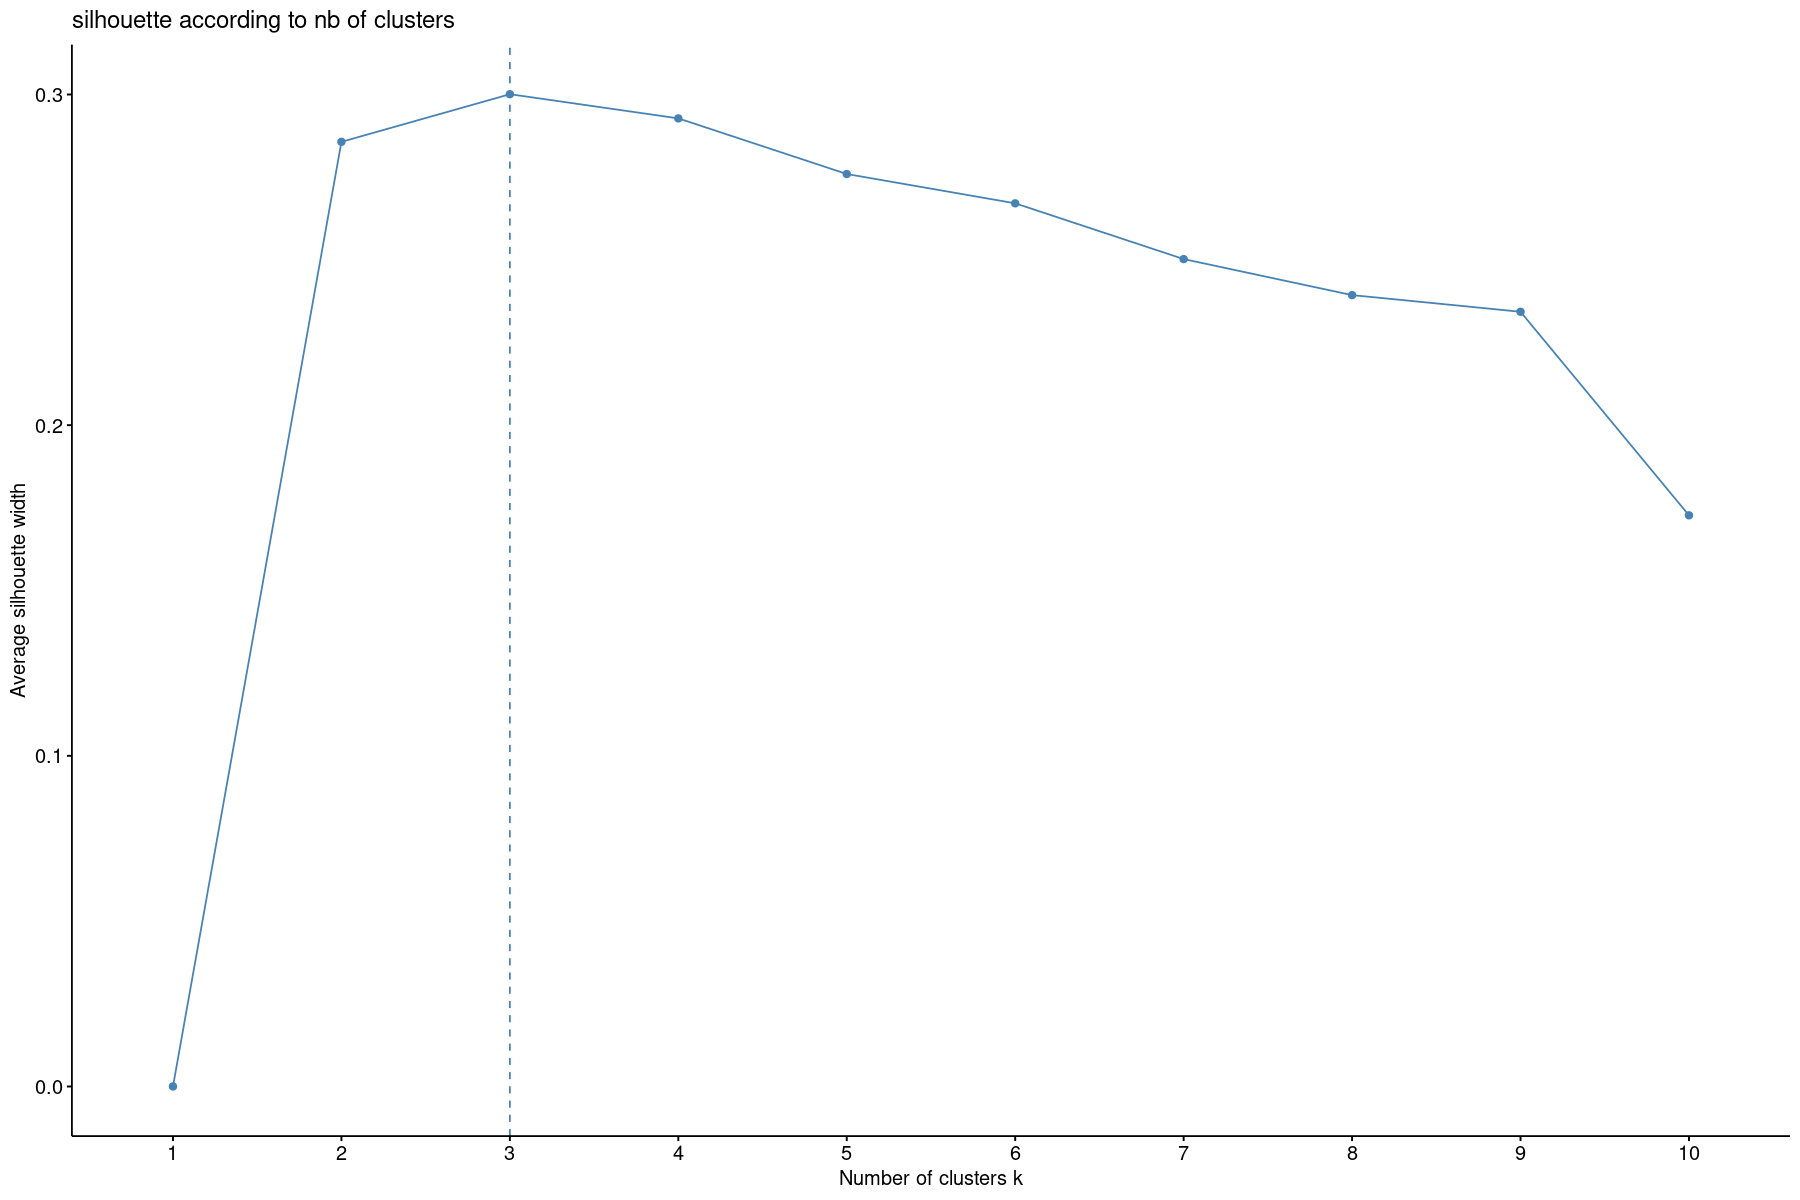

In [34]:
fviz_nbclust(loading_reduced, FUNcluster=hcut, method="silhouette") + ggtitle("silhouette according to nb of clusters")

**Interprétation :**

Comme précedemment, on relève un total de 3 clusters avec cette méthode.

---

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


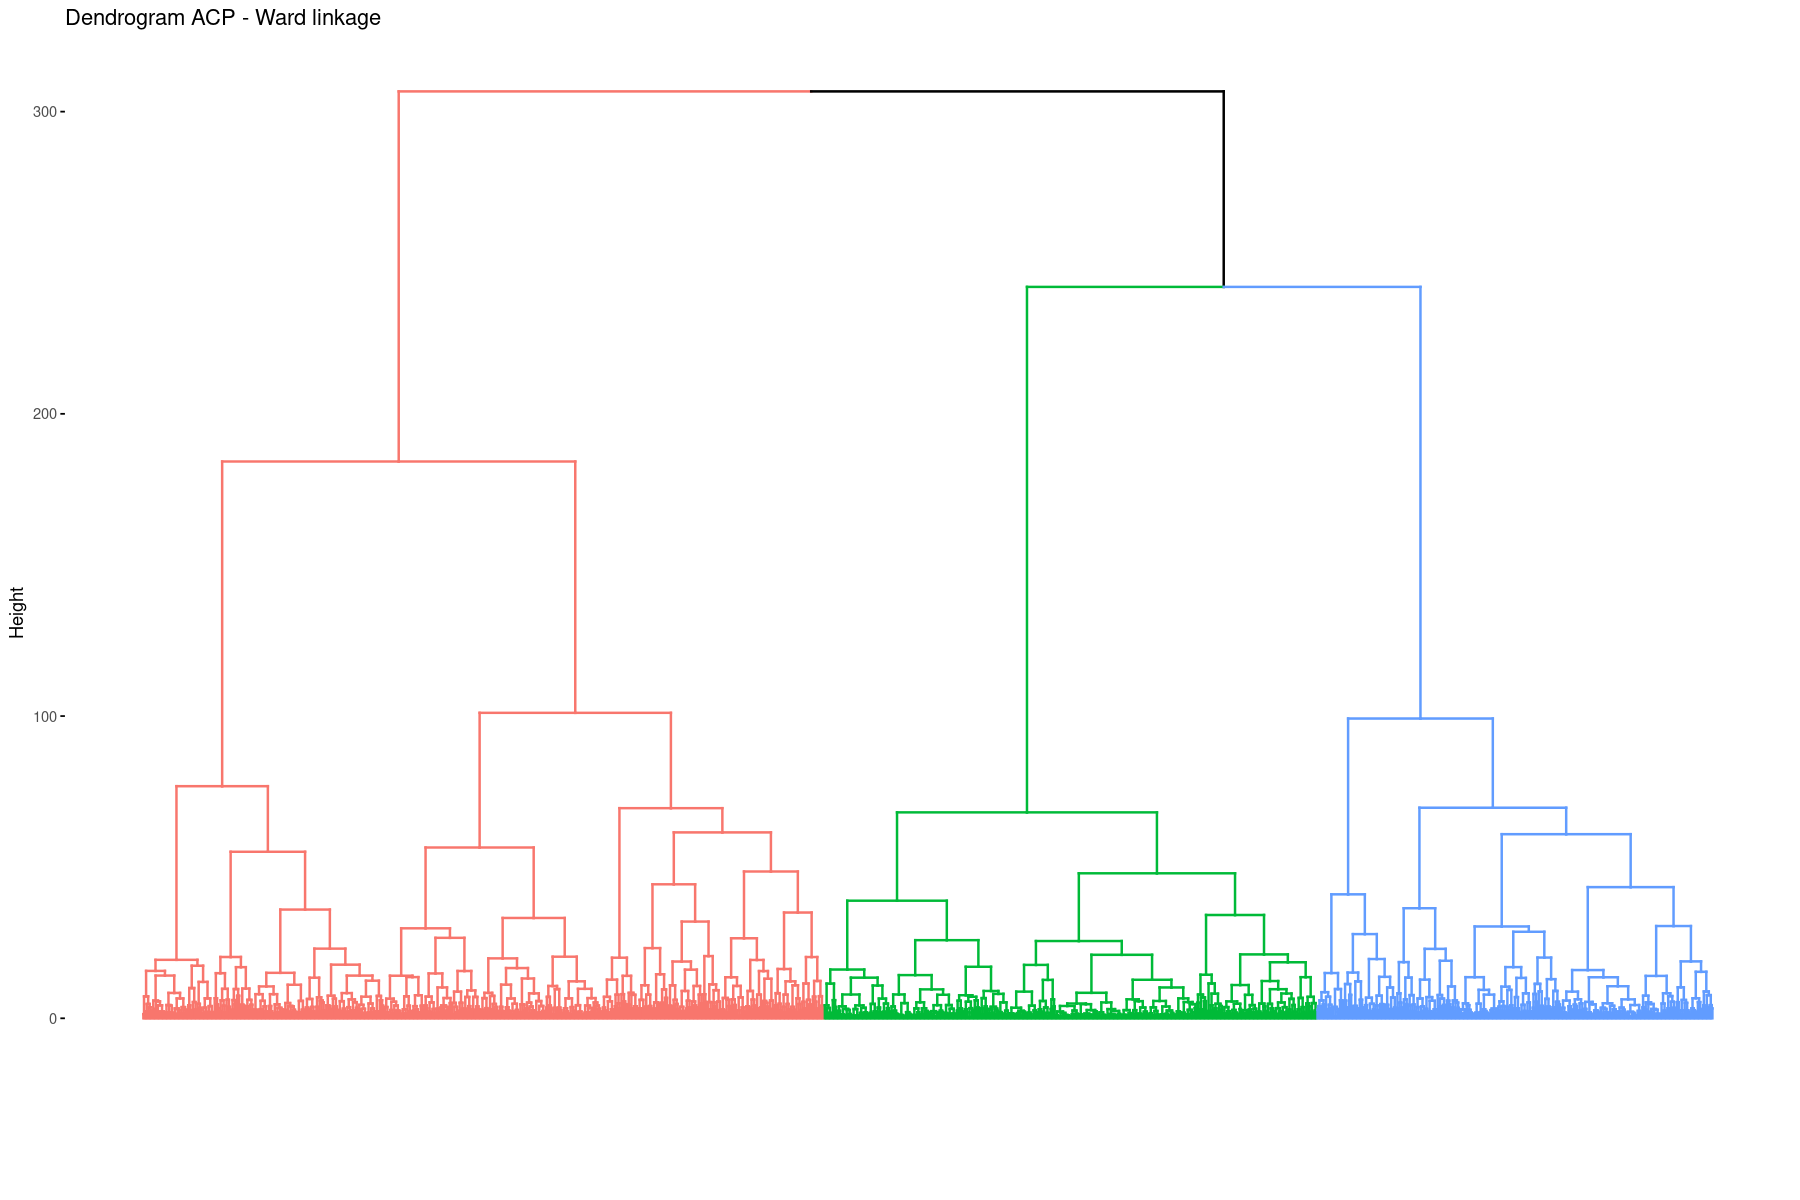

In [35]:
D = dist(loading_reduced,method="euclidian")
hclustward_D = hclust(D,"ward.D2")
fviz_dend(hclustward_D, show_labels=FALSE, main='Dendrogram ACP - Ward linkage',k=3)

**Interprétation :**

On peut remarquer ici que les groupes sont déséquilibrés (le cluster rouge est 2 fois plus grand que le bleu). Au vu du graphique, il pourrait être pertinent de couper notre arbre en quatre groupes plutôt qu'en trois.

---

In [36]:
groups <- cutree(hclustward_D, k = 3)
ind_coord <- as.data.frame(loading_reduced)
ind_coord$group <- as.factor(groups)
colnames(ind_coord) <- c("Dim1", "Dim2","Dim3","Dim4","Dim5", "Group")

groups4 <- cutree(hclustward_D, k = 4)
ind_coord4 <- as.data.frame(loading_reduced)
ind_coord4$group <- as.factor(groups4)
colnames(ind_coord4) <- c("Dim1", "Dim2","Dim3","Dim4","Dim5", "Group")


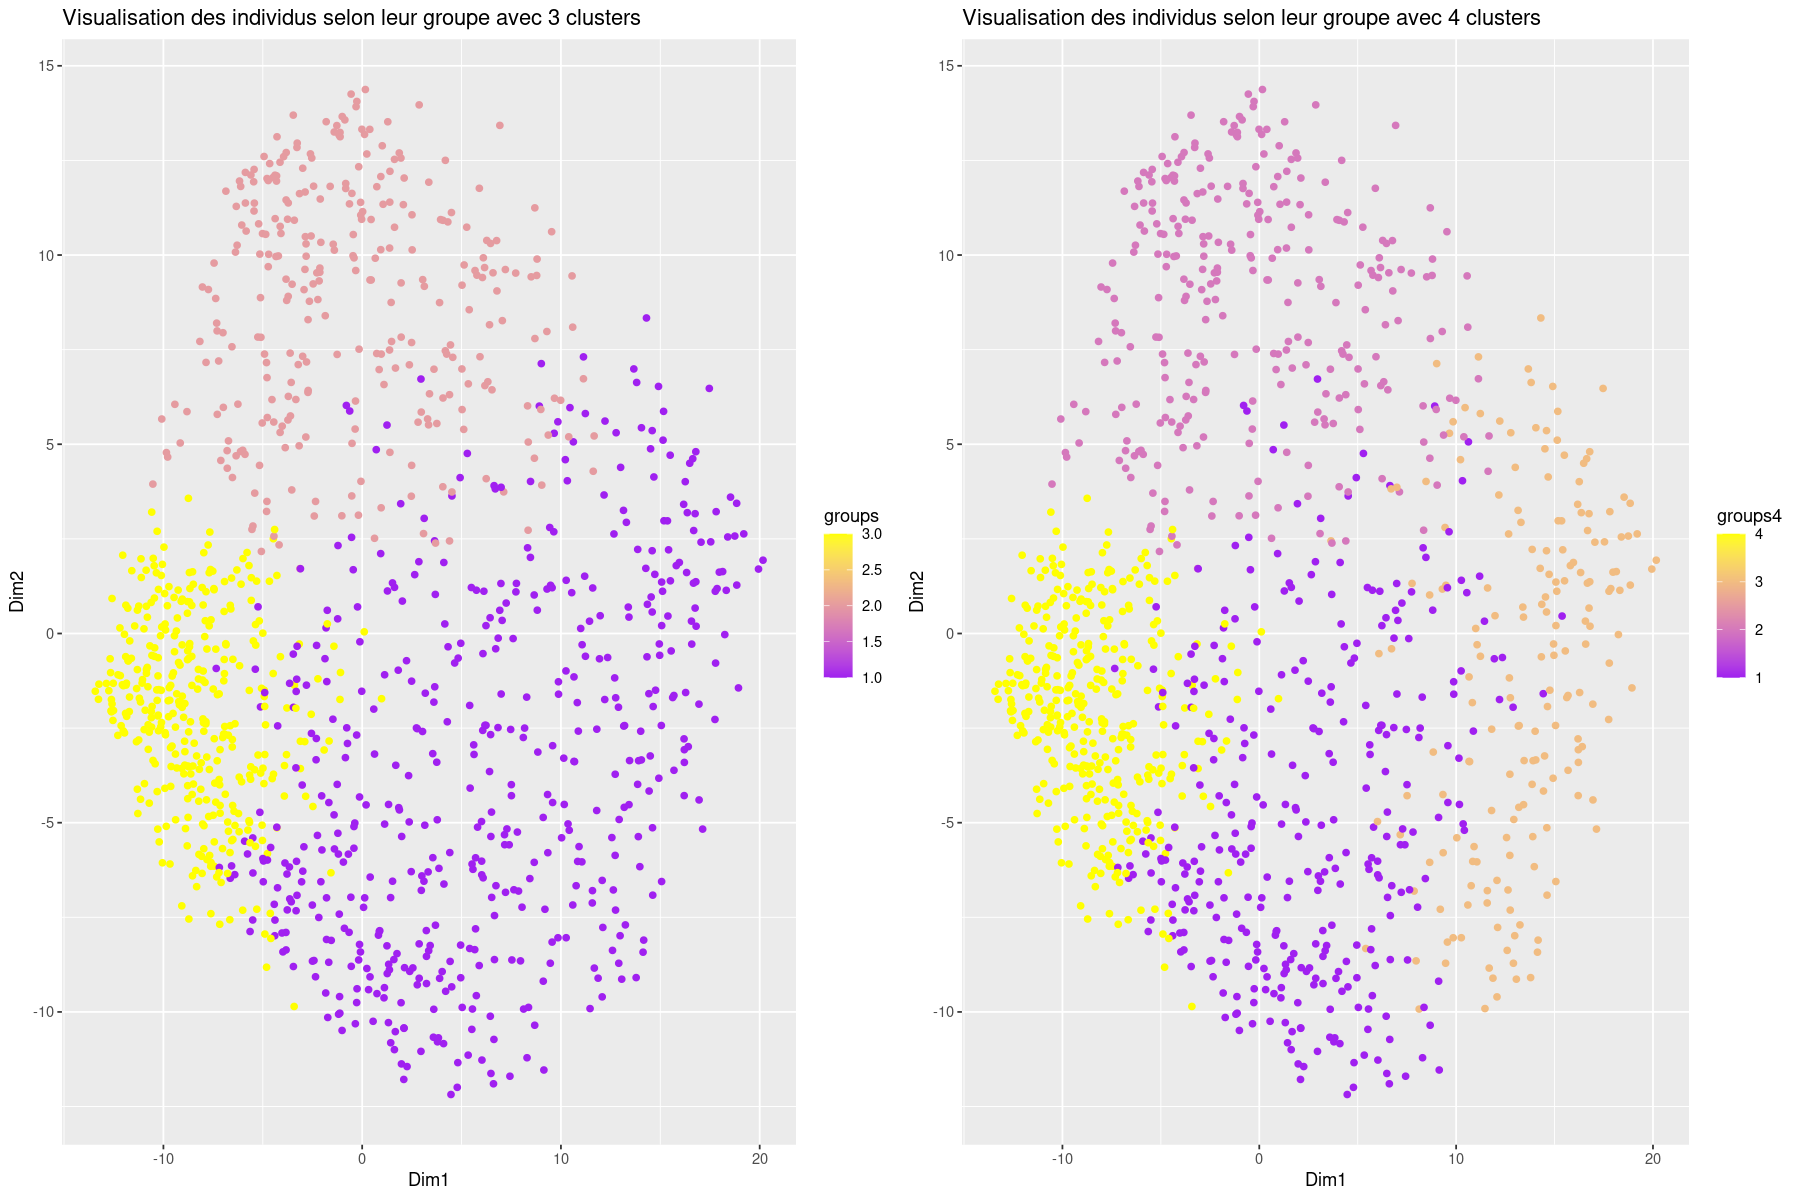

In [37]:
p1 = ggplot(ind_coord, aes(x = Dim1, y = Dim2, color = groups)) +
  geom_point() + scale_color_gradient(low="purple", high="yellow") +
  labs(title = "Visualisation des individus selon leur groupe avec 3 clusters") 

p2 = ggplot(ind_coord4, aes(x = Dim1, y = Dim2, color = groups4)) +
  geom_point() + scale_color_gradient(low="purple", high="yellow") +
  labs(title = "Visualisation des individus selon leur groupe avec 4 clusters") 

grid.arrange(p1,p2,ncol=2)

#### Interprétation : 
- On peut donc observer que les clusters sont distincts ici sur le plan factoriel de l'ACP (dim1 et dim2). Cependant, on préfère garder 4 clusters au lieu de 3 car ils sont plus équilibrés.

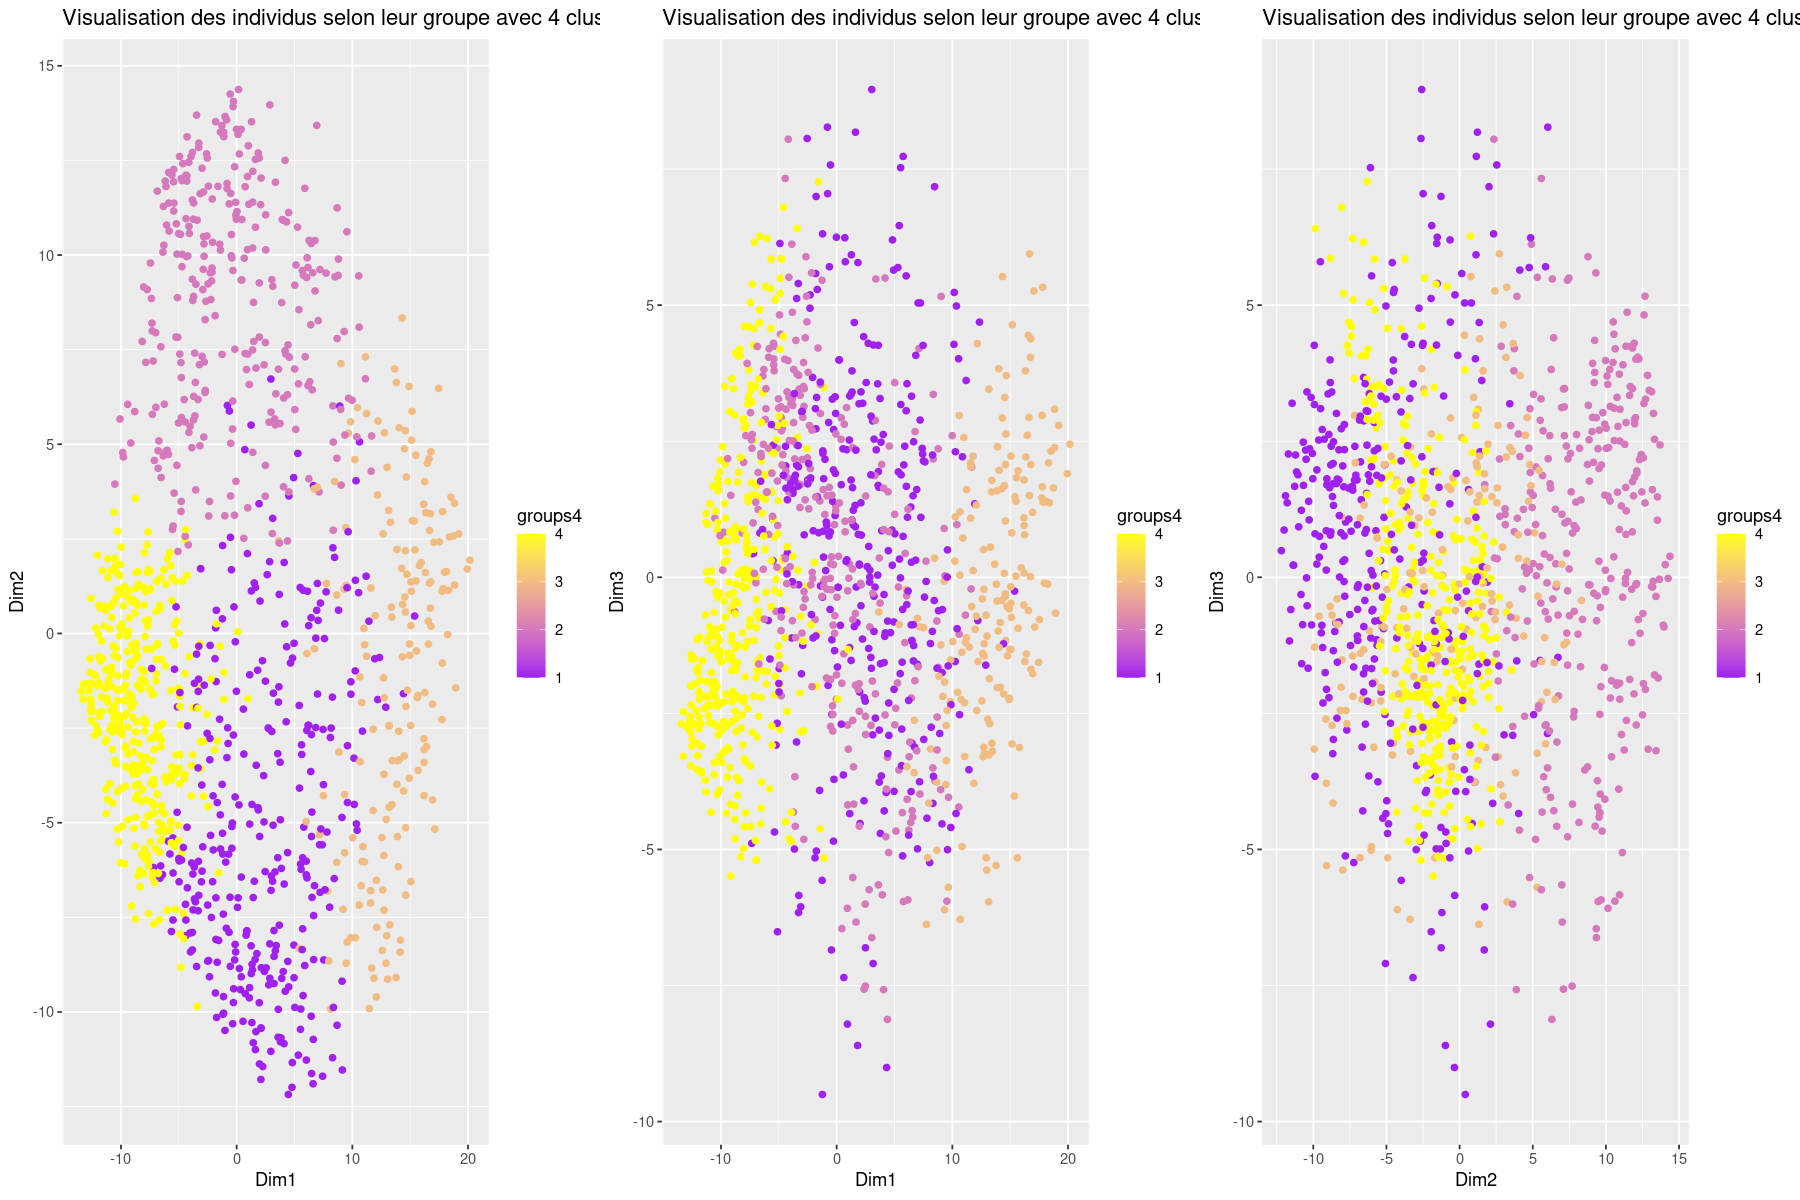

In [38]:
p1 = ggplot(ind_coord4, aes(x = Dim1, y = Dim2, color = groups4)) +
  geom_point() + scale_color_gradient(low="purple", high="yellow") +
  labs(title = "Visualisation des individus selon leur groupe avec 4 clusters") 

p2 = ggplot(ind_coord4, aes(x = Dim1, y = Dim3, color = groups4)) +
  geom_point() + scale_color_gradient(low="purple", high="yellow") +
  labs(title = "Visualisation des individus selon leur groupe avec 4 clusters") 

p3 = ggplot(ind_coord4, aes(x = Dim2, y = Dim3, color = groups4)) +
  geom_point() + scale_color_gradient(low="purple", high="yellow") +
  labs(title = "Visualisation des individus selon leur groupe avec 4 clusters") 

grid.arrange(p1,p2,p3,ncol=3)

**Interprétation :**

On observe sur le plan factoriel d'ACP dim1 et dim 2, la dimension & semble séparer un cluster des deux autres. en effet, le cluster bleu représenterait les stations de basses fréquentations. Les deux autres clusters restent confondus dans ce plan.
Par ailleurs, dans le plan factoriel dim1 et dim3, la dimension 3 distingue le cluster rouge des deux autres. Et la dimension 1 permet de distinguer le cluster vert du cluster bleu. 

In [39]:
# Toujours confusion matrix

groups[groups == 1] <- 3
groups[groups == 3] <- 1

### Gaussiann Mixture Model

#### Sélection du meilleur modèle

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
ℹ Please use `gather()` instead.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


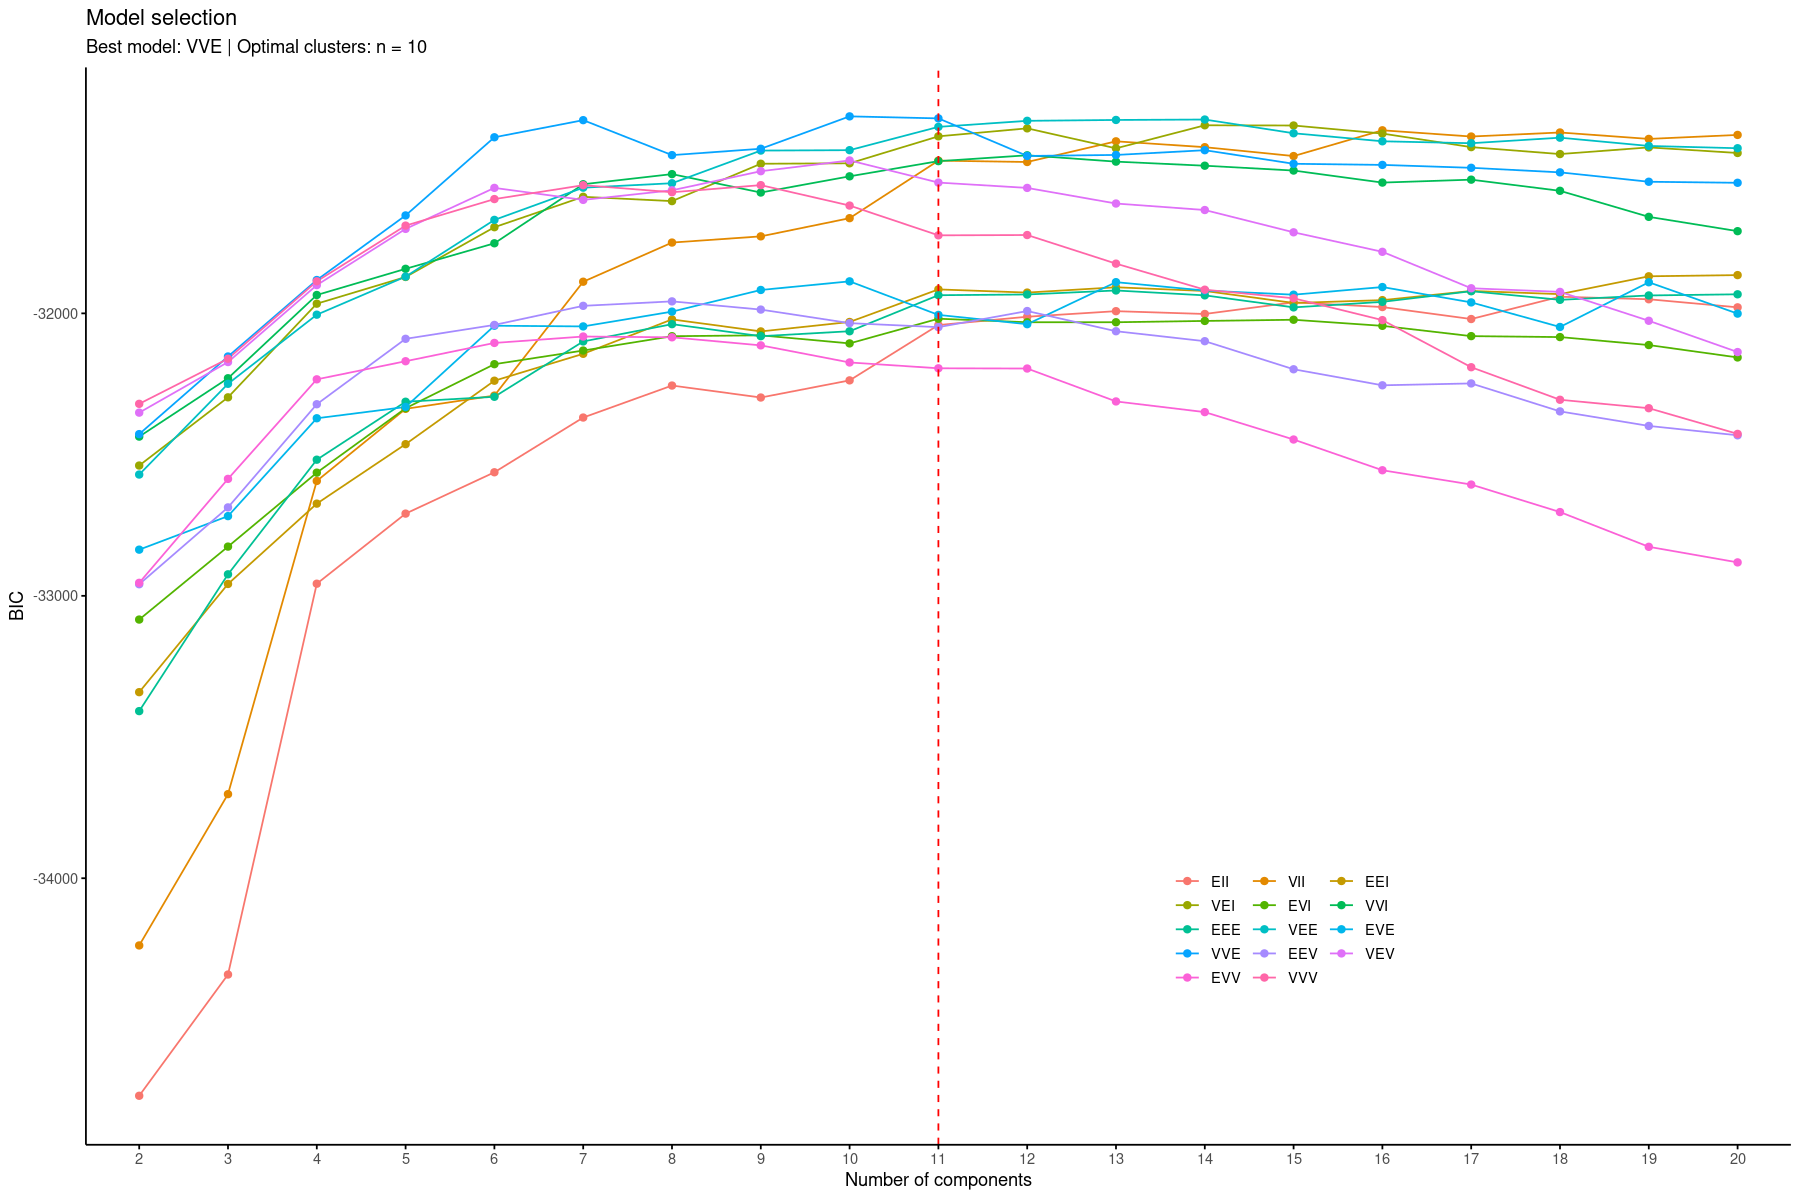

In [40]:
resGMM = Mclust(loading_reduced, G=2:20)
# summary(resGMM)
fviz_mclust(resGMM, what="BIC")

#### Affichage de GMM avec les mailleurs paramètres

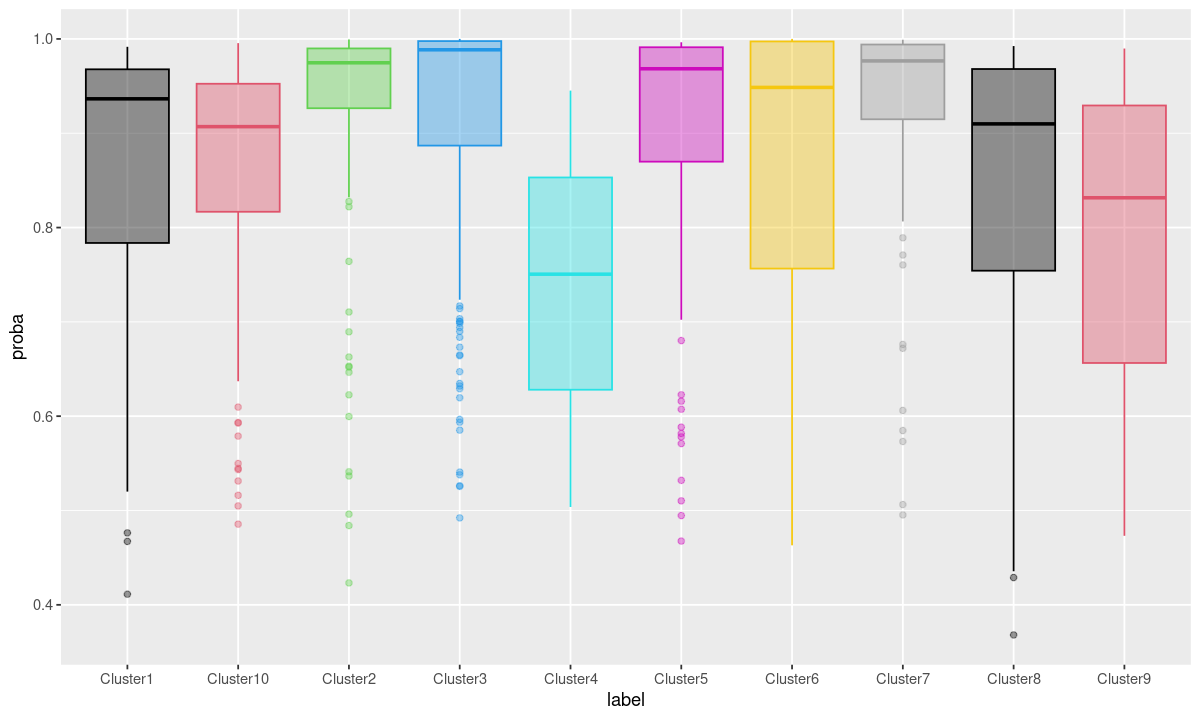

In [41]:
options(repr.plot.width = 10, repr.plot.height = 6)

resGMM = Mclust(loading_reduced, G=10, modelNames = "VVE")

aux = data.frame(
    label = paste("Cluster", resGMM$classification, sep=""), 
    proba = apply(resGMM$z, 1, max))

ggplot(aux, aes(x=label, y=proba)) + 
    geom_boxplot(colour=1:10, fill=1:10, alpha=.4)

**Interprétation :**

Sur ce graphe, on remarque que nos classes sont hétérogènes.

---

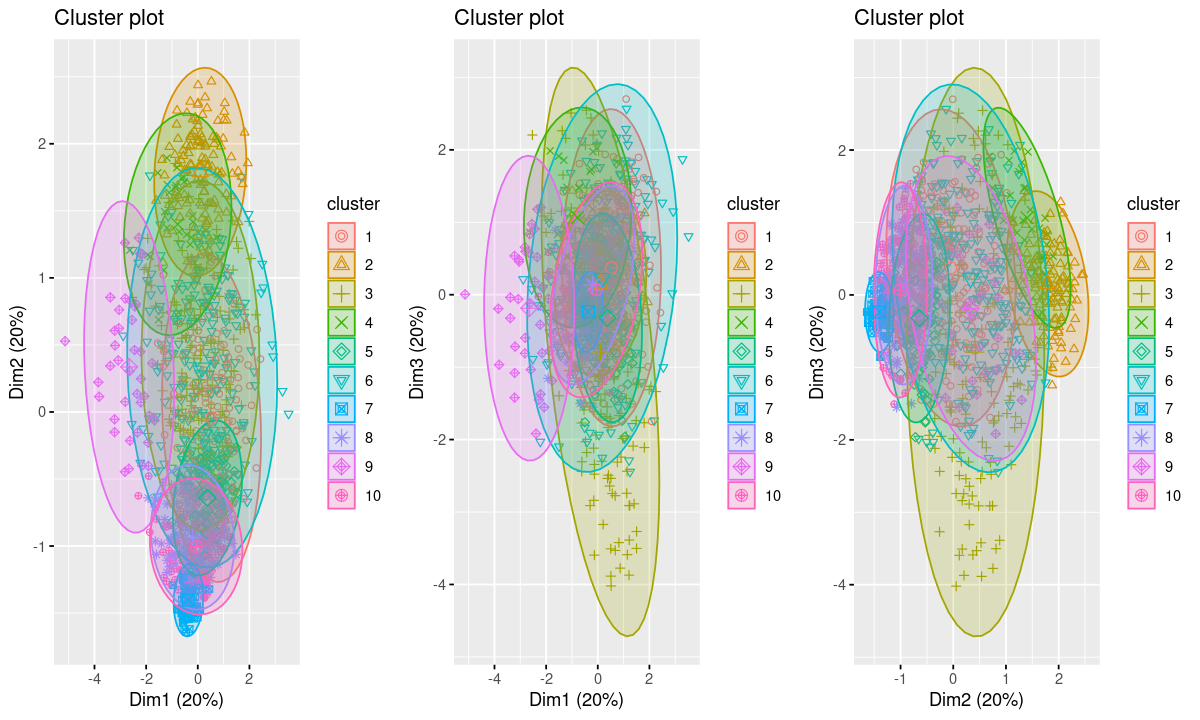

In [42]:
p1 = fviz_cluster(resGMM,axes = c(1, 2), data=loading_reduced, ellipse.type="norm", geom="point")
p2 = fviz_cluster(resGMM,axes = c(1, 3), data=loading_reduced, ellipse.type="norm", geom="point")
p3 = fviz_cluster(resGMM,axes = c(2, 3), data=loading_reduced, ellipse.type="norm", geom="point")

grid.arrange(p1,p2,p3,ncol=3)

**Interprétation :**

Les clusters ne se distinguent pas dans ces plans d'ACP. Ce n'est donc pas interprétable.

---

Afin de pouvoir comparer avec les autres méthodes de clustering, nous allons réaliser cette méthode mais avec seulement 3 clusters.

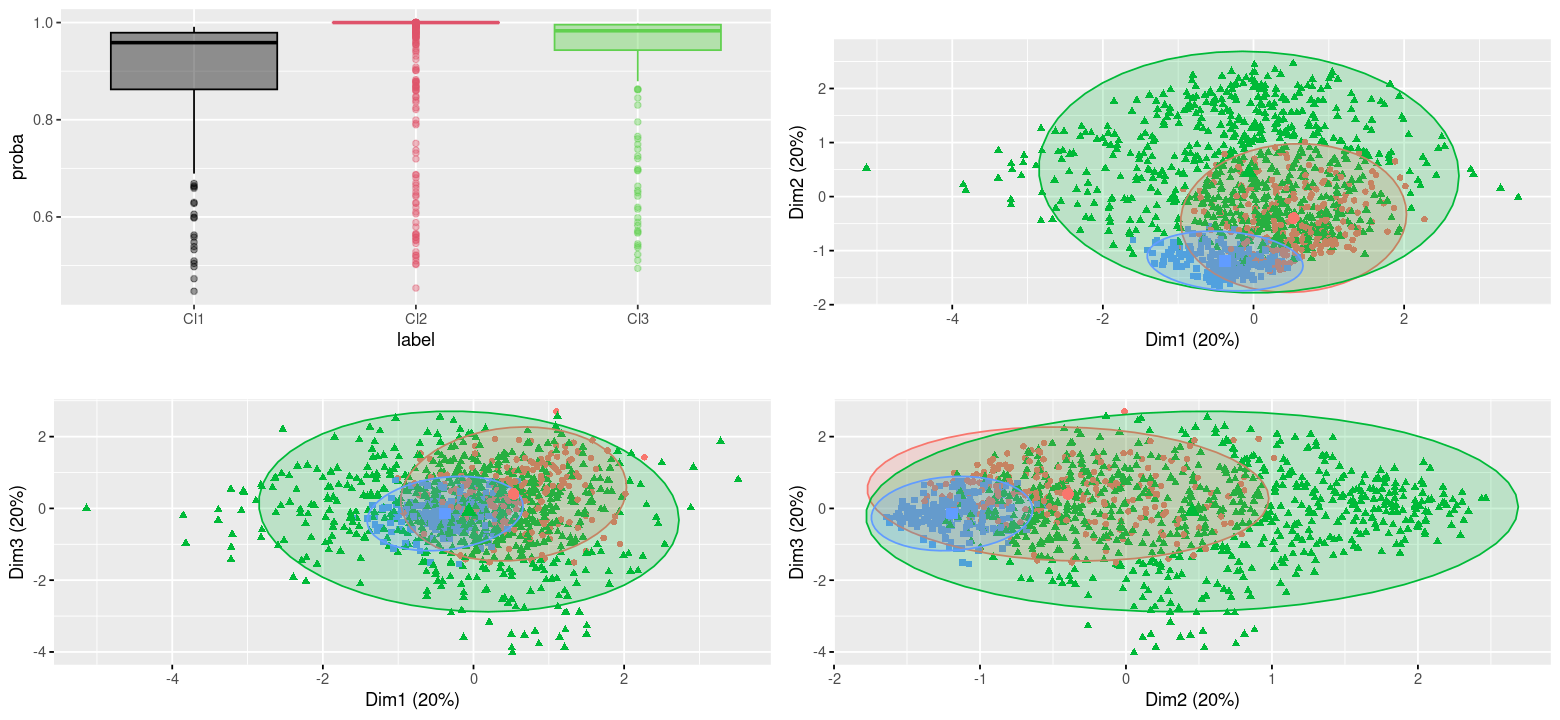

In [43]:
options(repr.plot.width = 13, repr.plot.height = 6)

resICL = Mclust(loading_reduced, G=3, modelNames="VVE")
# fviz_cluster(resICL, data=wine3, ellipse.type="norm", geom="point")

# --- #

aux = data.frame(
    label = paste("Cl", resICL$classification, sep=""), 
    proba = apply(resICL$z, 1, max))

p1 = ggplot(aux, aes(x=label, y=proba)) + geom_boxplot(colour=1:3, fill=1:3, alpha=.4)
p2 = fviz_cluster(resICL, data=loading_reduced, ellipse.type="norm", geom="point") +
    ggtitle("") + theme(legend.position = "none")
p3 = fviz_cluster(resICL,axes=c(1,3), data=loading_reduced, ellipse.type="norm", geom="point") +
    ggtitle("") + theme(legend.position = "none")
p4 = fviz_cluster(resICL,axes=c(2,3), data=loading_reduced, ellipse.type="norm", geom="point") +
    ggtitle("") + theme(legend.position = "none")

grid.arrange(p1, p2, p3, p4, ncol = 2)

#### Interprétation : 

Une fois de plus, les clusters se supperposent et sont donc peut interprétables

### Comparaison des méthodes de clustering 

In [44]:
#install.packages('cvms')
install.packages('ggimage')
#install.packages('rsvg')

Installation du package dans ‘/home/duchesne/R/libs’
(car ‘lib’ n'est pas spécifié)

installation de la dépendance ‘magick’


Warning message in install.packages("ggimage"):
“l'installation du package ‘magick’ a eu un statut de sortie non nul”
Warning message in install.packages("ggimage"):
“l'installation du package ‘ggimage’ a eu un statut de sortie non nul”


In [45]:
library(cvms)
library(ggimage)
library(rsvg)

ERROR: Error in library(ggimage): aucun package nommé ‘ggimage’ n'est trouvé


#### Sur les dimensions 1 et 2 

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6)

grid.arrange(
    fviz_pca_ind(acp, col.ind=as.factor(kmean3$cluster), label= "none") + ggtitle("Cluster avec Kmeans"),
    fviz_pca_ind(acp, col.ind=as.factor(resGMM$classification), label= "none") + ggtitle("Cluster avec GMM"),
    fviz_pca_ind(acp, col.ind=as.factor(groups4), label= "none") + ggtitle("Cluster avec Dendogramme"),
    ncol=3,
    widths = c(4, 4, 4)
)

# --- #

#### Sur la maps de Paris 

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

grid.arrange(
    ggplot(coord, aes(x=longitude, y=latitude, color=kmean3$cluster)) + geom_point(size=3) + labs(title = "Stations selon kmeans")+ scale_color_gradient(low="yellow", high="purple"),
    ggplot(coord, aes(x=longitude, y=latitude, color=loading)) + geom_point(size=3) + labs(title = "Chargement moyen des stations sur la semaine") + scale_color_gradient(low="yellow", high="purple"),
    ncol=2
)

grid.arrange(
    ggplot(coord, aes(x=longitude, y=latitude, color=resGMM$classification)) + geom_point(size=3) + labs(title = "Stations selon GMM")+ scale_color_gradient(low="purple", high="yellow"),
    ggplot(coord, aes(x=longitude, y=latitude, color=loading)) + geom_point(size=3) + labs(title = "Chargement moyen des stations sur la semaine") + scale_color_gradient(low="yellow", high="purple"),
    ncol=2
)

grid.arrange(
    ggplot(coord, aes(x=longitude, y=latitude, color=groups4)) + geom_point(size=3) + labs(title = "Stations selon dendogramme")+ scale_color_gradient(low="purple", high="yellow"),
    ggplot(coord, aes(x=longitude, y=latitude, color=loading)) + geom_point(size=3) + labs(title = "Chargement moyen des stations sur la semaine") + scale_color_gradient(low="yellow", high="purple"),
    ncol=2
)




On voit que les 3 méthodes de clustering arrivent plutôt bien à représenter les données. Grosse surprise pour le kmeans qui arrive à un résultat décent avec seulement 3 classes. Dendogramme très decevant. GMM passable mais bon 10 classes un effort

- Kmean : 3 classes separent 3 types de fréquentations : en jaune faible chargement moyen, violet moyen et beige haut chargement moyen. 
- GMM très peu interprétable 
- Dendogramme : peu précis mais deux groupes larges de fréquentation faible en violet et haute en jaune. 

In [ ]:
conf_mat_GK <- confusion_matrix(resICL$classification, kmean3$cluster)
conf_mat_KD <- confusion_matrix(kmean3$cluster, groups)
conf_mat_GD <- confusion_matrix(resICL$classification, groups)
grid.arrange(
    plot_confusion_matrix(conf_mat_GK,add_normalized = FALSE, add_col_percentages = FALSE, add_row_percentages = FALSE),
    plot_confusion_matrix(conf_mat_KD,add_normalized = FALSE, add_col_percentages = FALSE, add_row_percentages = FALSE),
    plot_confusion_matrix(conf_mat_GD,add_normalized = FALSE, add_col_percentages = FALSE, add_row_percentages = FALSE),
    ncol=3,
    widths = c(4, 4, 4)
)

### Création de nos variables qualitatives

In [80]:
loading_test = loading
Groups = ind_coord4$Group
loading_quali = cbind(loading_test, group = Groups)
loading_quali = subset(loading_quali,select="group")
head(loading_quali)
loading_quali[,"group"]=as.factor(loading_quali[,"group"])

group
 EURYALE DEHAYNIN    1    
 LEMERCIER           1    
 MEZIERES RENNES     1    
 FARMAN              2    
 QUAI DE LA RAPEE    2    
 CHOISY POINT D'IVRY 1

In [81]:
res.mca = MCA(loading_quali, graph=FALSE)
print(res.mca)

ERROR: Error in U[, num, drop = FALSE]: nombre de dimensions incorrect


In [ ]:
#Idée : faire un test d'indépendance pour montrer que la fréquentation des stations n'est pas indépendante de l'heure 
lundi_station_1 = loading[1,1:7]
chisq.test(lundi_station_1)

In [ ]:
#Idée : créer une variable qualitatitve, ex : moyenne d'une station > 0.5 => CA, MCA ?

## Conclusion